
AutoML works through the following steps:

1. Feature Engineering

Feature engineering is a critical step where raw data is transformed into features that can improve the predictive power of a model. AutoML handles this automatically:
	•	Imputation: Automatically fills missing values (e.g., mean, median, mode, or advanced techniques like k-NN).
	•	Encoding: Converts categorical variables into numeric formats (e.g., one-hot encoding, ordinal encoding, or embeddings).
	•	Scaling: Normalizes or standardizes numerical features for better model performance.
	•	Transformation: Applies logarithmic transformations, polynomial features, or feature interactions.
	•	Text Embedding: Automatically converts text data into embeddings using TF-IDF, Word2Vec, or pre-trained language models like BERT.

2. Feature Selection

AutoML tools evaluate the importance of each feature and select the most relevant ones by:
	•	Removing redundant, highly correlated, or irrelevant features.
	•	Ranking features by their contribution to model performance.
	•	Using techniques like Recursive Feature Elimination (RFE) or tree-based feature importance.

3. Automated Model Training

AutoML iteratively trains multiple models using different algorithms and hyperparameter combinations. For feature engineering:
	•	It generates new features, evaluates their utility, and includes them if they improve the model.
	•	It evaluates the performance of engineered features using cross-validation.

4. Pipeline Automation

The entire workflow, from preprocessing to feature engineering and model evaluation, is handled as a pipeline. This ensures that all steps (e.g., imputation, encoding) are consistently applied during training and inference.

How to Use AutoML for Feature Engineering

You can leverage popular AutoML tools like H2O AutoML, Google Cloud AutoML, or libraries like Auto-sklearn and PyCaret in Python. 

In [1]:
!pip install h2o

    numpy (>=1.19.*) ; python_version >= "3.7"
           ~~~~~~~^


In [2]:
 # import our data
import pickle

# Load the data from the pickle file
with open("train_test_data.pkl", "rb") as f:
    X_train_final, X_test_final, y_train_encoded, y_test_encoded = pickle.load(f)

# Check the shapes of the imported data
print("X_train_final shape:", X_train_final.shape)
print("X_test_final shape:", X_test_final.shape)
print("y_train_encoded shape:", y_train_encoded.shape)
print("y_test shape:", y_test_encoded.shape)

X_train_final shape: (73271, 68)
X_test_final shape: (18318, 68)
y_train_encoded shape: (73271,)
y_test shape: (18318,)


In [3]:
import numpy as np

# Check class distribution
unique_classes, class_counts = np.unique(y_train_encoded, return_counts=True)
class_distribution = dict(zip(unique_classes, class_counts))

print("Class Distribution in y_train_encoded:", class_distribution)

Class Distribution in y_train_encoded: {0: 8145, 1: 25621, 2: 39505}


In [15]:
import pandas as pd
import h2o
h2o.init()

# Convert X_train_final and X_test_final to DataFrames
X_train_final_df = pd.DataFrame(X_train_final)
X_test_final_df = pd.DataFrame(X_test_final)

# Convert y_train_encoded and y_test_encoded to DataFrames naming the column as 'readmitted'
y_train_encoded_df = pd.DataFrame(y_train_encoded, columns=['readmitted'])
y_test_encoded_df = pd.DataFrame(y_test_encoded, columns=['readmitted'])

# Add column names if necessary (optional)
X_train_final_df.columns = [f'feature_{i}' for i in range(X_train_final_df.shape[1])]
X_test_final_df.columns = [f'feature_{i}' for i in range(X_test_final_df.shape[1])]

# Concatenate features and target
train_df = pd.concat([X_train_final_df, y_train_encoded_df], axis=1)
test_df = pd.concat([X_test_final_df, y_test_encoded_df], axis=1)

# Convert the target column to categorical
train_df['readmitted'] = train_df['readmitted'].astype('category')
test_df['readmitted'] = test_df['readmitted'].astype('category')

# Convert Pandas DataFrames to H2OFrames
train_h2o = h2o.H2OFrame(train_df)
test_h2o = h2o.H2OFrame(test_df)

# After converting to H2OFrame
train_h2o['readmitted'] = train_h2o['readmitted'].asfactor()
test_h2o['readmitted'] = test_h2o['readmitted'].asfactor()

# Verify the column types
print(train_h2o.types)


# Print to verify
print(train_h2o.head())
print(test_h2o.head())

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------
H2O_cluster_uptime:         5 mins 42 secs
H2O_cluster_timezone:       Europe/Paris
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.6
H2O_cluster_version_age:    2 months and 6 days
H2O_cluster_name:           H2O_from_python_hindy_oirmqu
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    8.19 Gb
H2O_cluster_total_cores:    14
H2O_cluster_allowed_cores:  14
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.11.5 final
--------------------------  -----------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
{'feature_0': 'real', 'feature_1': 'real', 'feature_2': 'real', 'feature_3': 'real', 'feature_4': 'real', 'feature_5': 'real', 'feature_6': 'real', 'feature_7': 'real', 'feature_8': 'real', 'feature_9': 'real', 'feature_10': 'real', 'feature_11': 'real', 'feature_12': 'real', 'feature_13': 'real', 'feature_14': 'real', 'feature_15': 'real', 'feature_16': 'real', 'feature_17': 'real', 'feature_18': 'real', 'feature_19': 'real', 'feature_20': 'real', 'feature_21': 'real', 'feature_22': 'real', 'feature_23': 'real', 'feature_24': 'real', 'feature_25': 'real', 'feature_26': 'real', 'feature_27': 'real', 'feature_28': 'real', 'feature_29': 'real', 'feature_30': 'real', 'feature_31': 'real', 'feature_32': 'real', 'feature_33': 'real', 'feature_34': 'real', 'feature_35': 'real', 'feature_36': 'real', 'feat

Because H2O needs a DataFrame object, and that our data is given as ndarray, we have to assign arbitrary column names to the categorical data. We will call these F10, F11, F12, ... to avoid any confusion with our 0,1,2 classes which correspond to our target variable. This is because converting ndarray to DataFrame sets default values for categorical column names to 0,1,2,3,... which clashes!

We will try to run AutoML for only 10 minutes, but longer times could yield much better resulsts. You can adjust this with max_runtime_secs (in seconds of course). Also, we have set nfolds to 5 only to performed cross-validation (using 10 or more will definitely lead to better results, be careful with overfitting). AutoML also offers the possibility to balance the data before training, which we did not use since we had done it in Data_Cleaning_and_Transformation.ipynb already. AutoML has many more possibilities... 

In [32]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML

# Specify the target and feature columns
target = 'readmitted'
features = [col for col in train_h2o.columns if col != target]

# Run H2O AutoML
aml = H2OAutoML(max_runtime_secs=600, seed=1, balance_classes=True, sort_metric="mean_per_class_error", nfolds=5) 
aml.train(x=features, y=target, training_frame=train_h2o)

# View the leaderboard
lb = aml.leaderboard
print(lb)


AutoML progress: |
15:18:16.926: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                   mean_per_class_error    logloss      rmse       mse
DeepLearning_grid_1_AutoML_7_20250108_151816_model_1                   0.584363   0.919348  0.569578  0.324419
DeepLearning_grid_3_AutoML_7_20250108_151816_model_1                   0.586143   0.892269  0.567117  0.321621
DeepLearning_grid_2_AutoML_7_20250108_151816_model_1                   0.586984   0.903479  0.570001  0.324901
StackedEnsemble_AllModels_3_AutoML_7_20250108_151816                   0.590204   0.874692  0.564006  0.318103
StackedEnsemble_AllModels_4_AutoML_7_20250108_151816                   0.590261   0.874571  0.563927  0.318014
StackedEnsemble_AllModels_2_AutoML_7_20250108_151816                   0.591595   0.875177  0.56422   0.318344
StackedEnsemble_BestOfFamily_3_AutoML_7_20250108_151816          

In [34]:
# dislays the best model's architecture
best_model = aml.leader
best_model

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_7_20250108_151816_model_1


Status of Neuron Layers: predicting readmitted, 3-class classification, multinomial distribution, CrossEntropy loss, 7,203 weights/biases, 96.8 KB, 2,500,404 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms              momentum    mean_weight           weight_rms          mean_bias             bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  --------------------  ----------  --------------------  ------------------  --------------------  -------------------
    1        68       Input             15.0
    2        100      RectifierDropout  10.0       0.0   0.0   0.008242669234509642   0.015249382704496384  0.0         -0.00855644621009774  0.4625129699707031  0.012264597505457765  1.2491869926452637
    3        3        Softmax                      0.0   0.0   0.0015415522334842535  0.002104942686855793  0.0         -4.884085978118237    3.5270614624023438  -8.070599064122698    0.08085134625434875

ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.41688349159644417
RMSE: 0.645665154392309
LogLoss: 1.1822086890658918
Mean Per-Class Error: 0.5592380185563869
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1     2     Error     Rate
---  ----  ----  --------  -------------
343  1418  1544  0.896218  2,962 / 3,305
86   1586  1665  0.524723  1,751 / 3,337
49   785   2414  0.256773  834 / 3,248
478  3789  5623  0.56087   5,547 / 9,890

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.43913
2    0.733468
3    1

ModelMetricsMultinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.324419286013539
RMSE: 0.5695781649725865
LogLoss: 0.9193479257035244
Mean Per-Class Error: 0.5843634029838177
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0     1      2      Error     Rate
----  -----  -----  --------  ---------------
780   2817   4548   0.904236  7,365 / 8,145
1010  8616   15995  0.663713  17,005 / 25,621
994   6320   32191  0.185141  7,314 / 39,505
2784  17753  52734  0.432422  31,684 / 73,271

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.567578
2    0.886927
3    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.567087  0.00340579  0.568953      0.570697      0.567149      0.567012      0.561621
aic                      nan       0           nan           nan           nan           nan           nan
auc                      nan       0           nan           nan           nan           nan           nan
err                      0.432913  0.00340579  0.431047      0.429303      0.432851      0.432988      0.438379
err_count                6344      49.8498     6317          6291          6343          6345          6424
loglikelihood            nan       0           nan           nan           nan           nan           nan
logloss                  0.9229

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_grid_1_AutoML_7_20250108_151816_model_1

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0     1      2      Error     Rate
----  -----  -----  --------  ---------------
547   2777   4821   0.932842  7,598 / 8,145
365   8694   16562  0.660669  16,927 / 25,621
263   5595   33647  0.148285  5,858 / 39,505
1175  17066  55030  0.414666  30,383 / 73,271

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

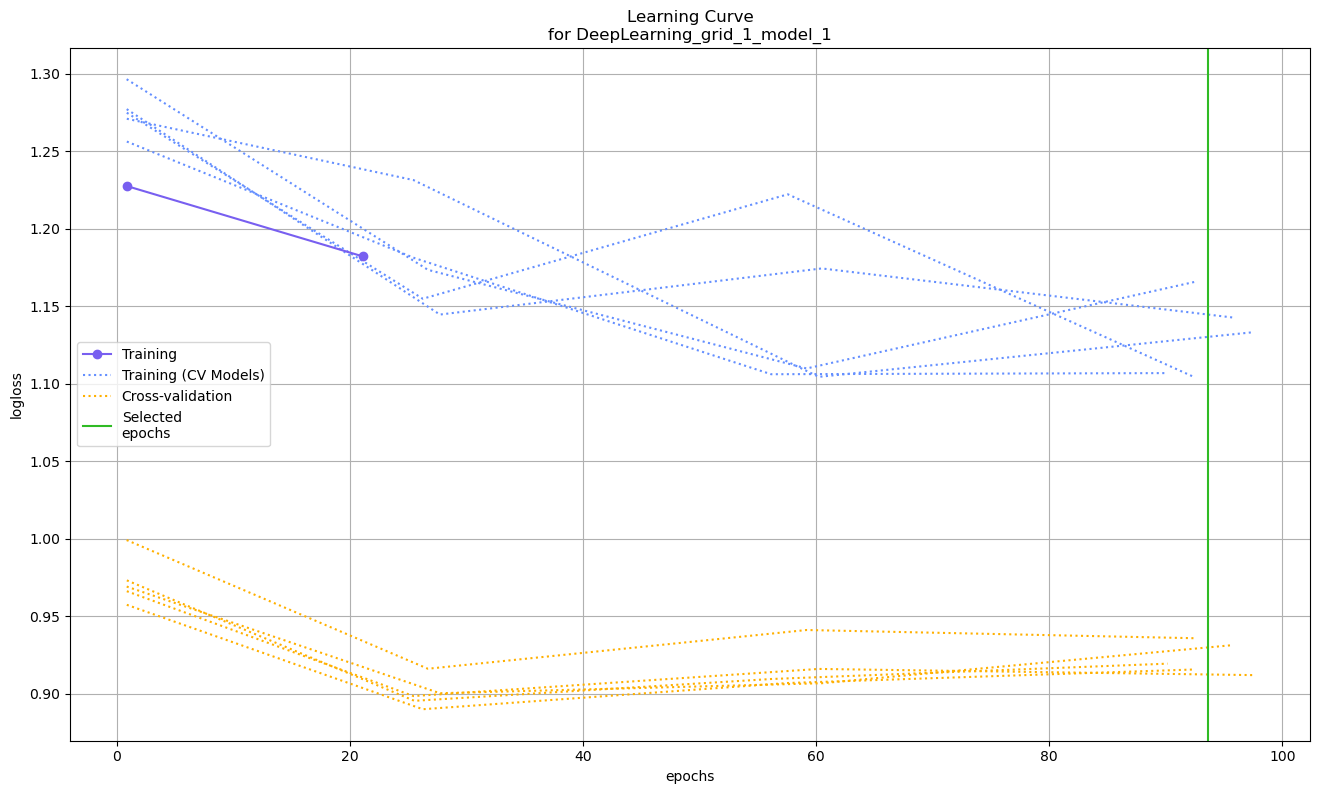

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

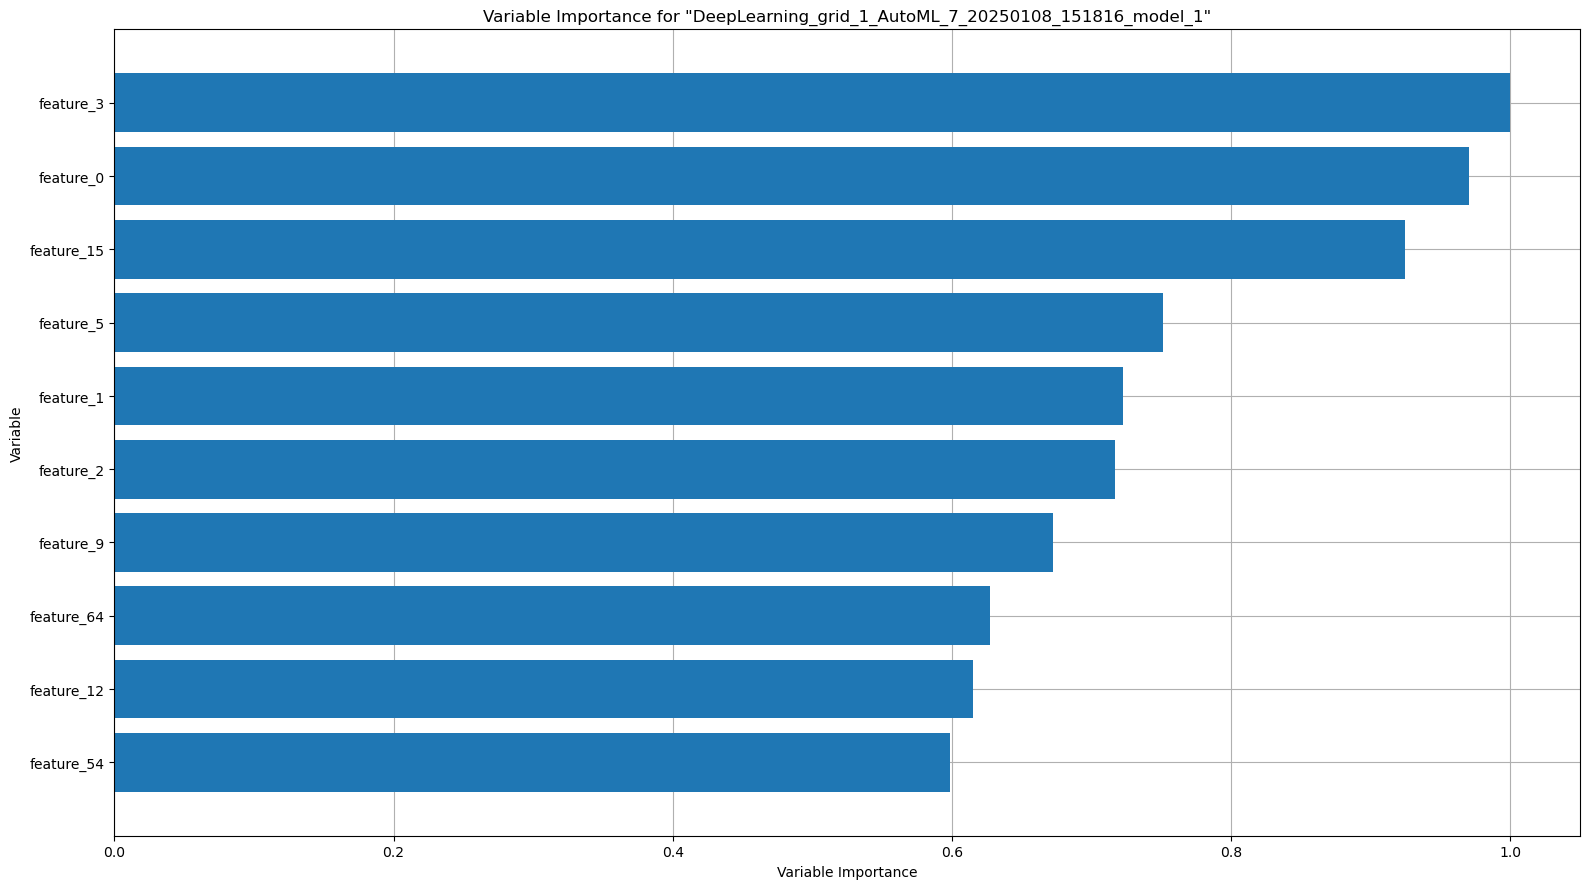

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

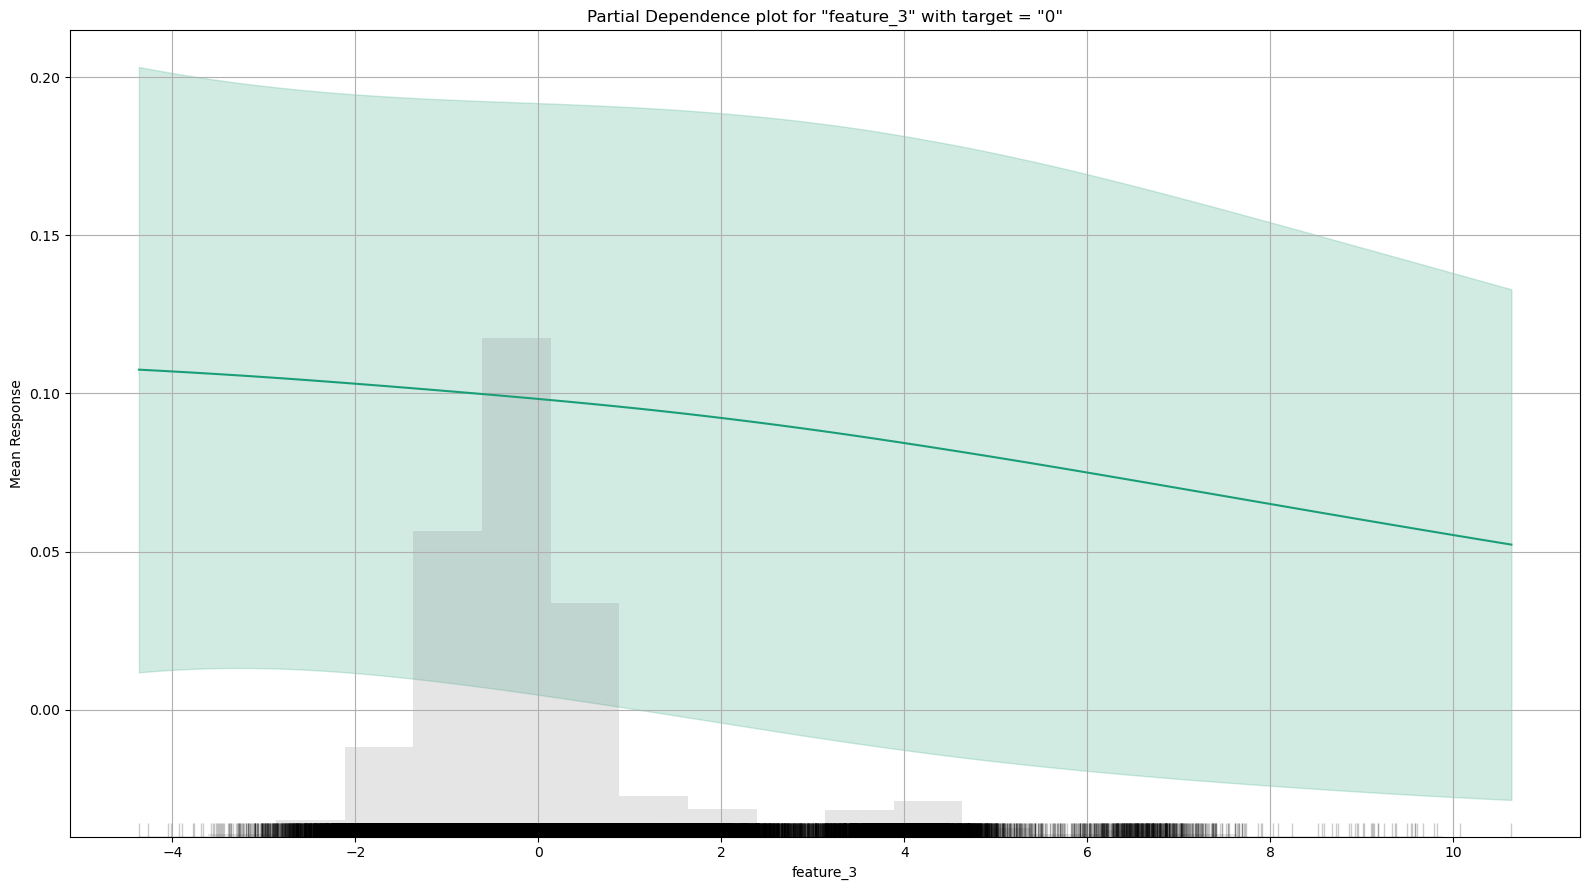

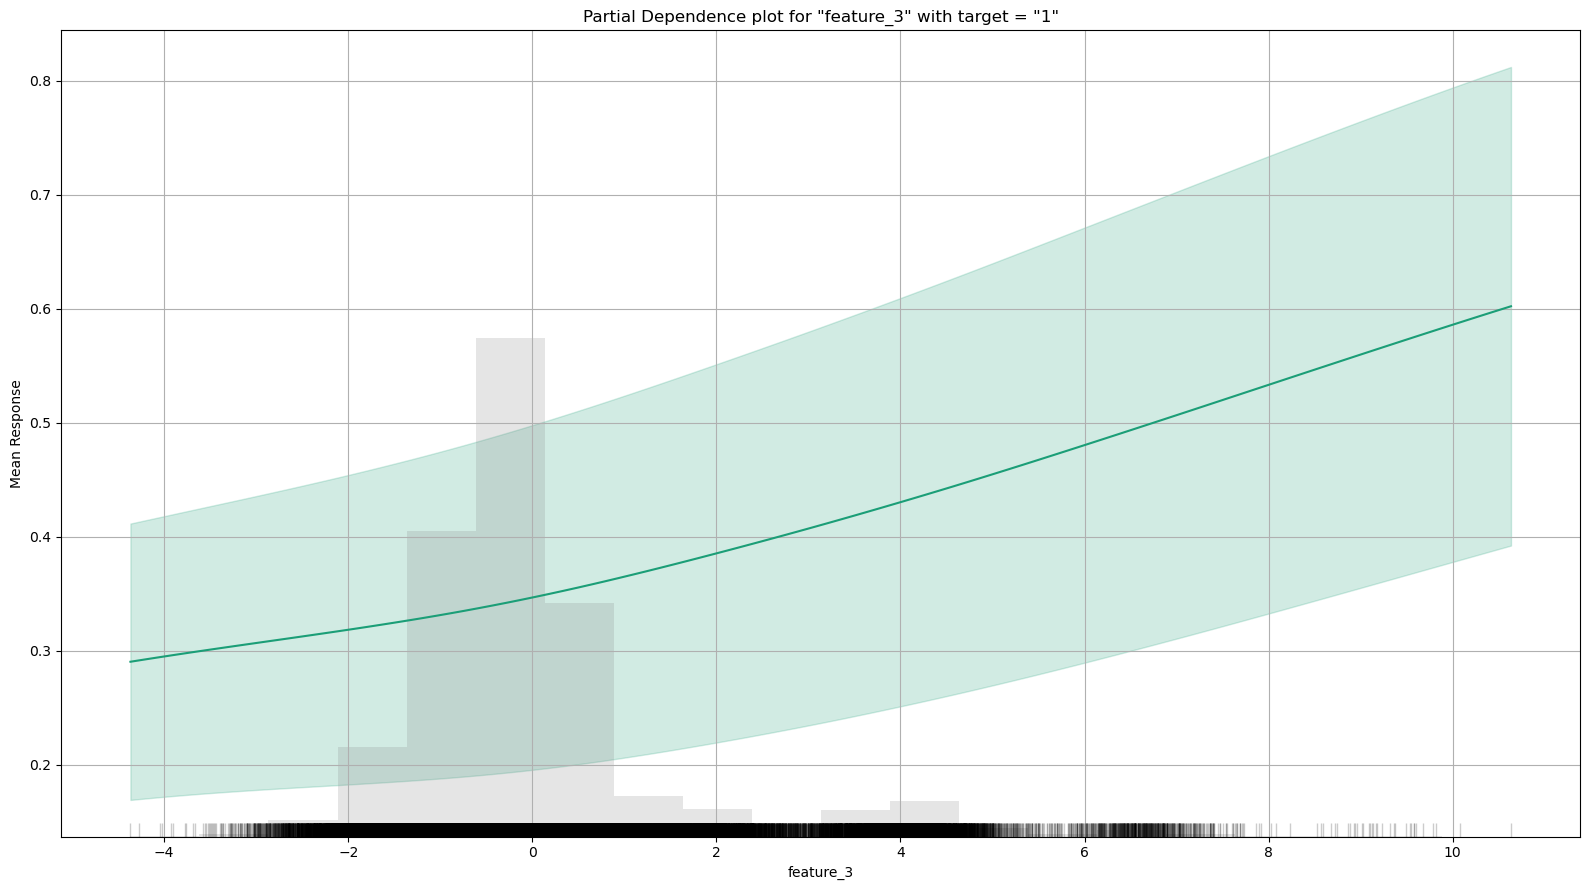

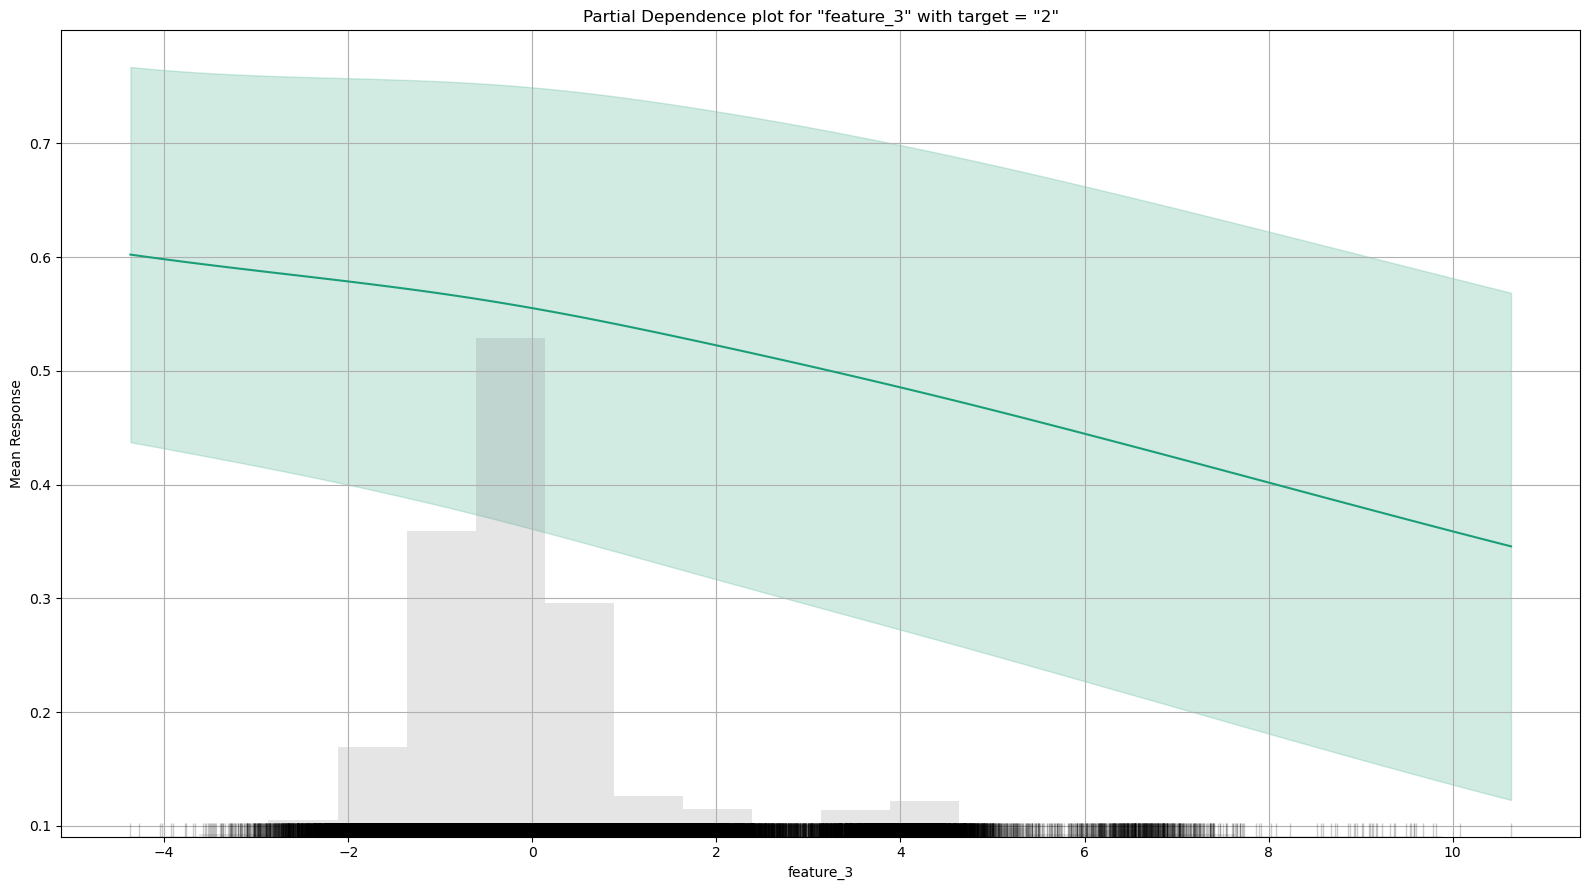

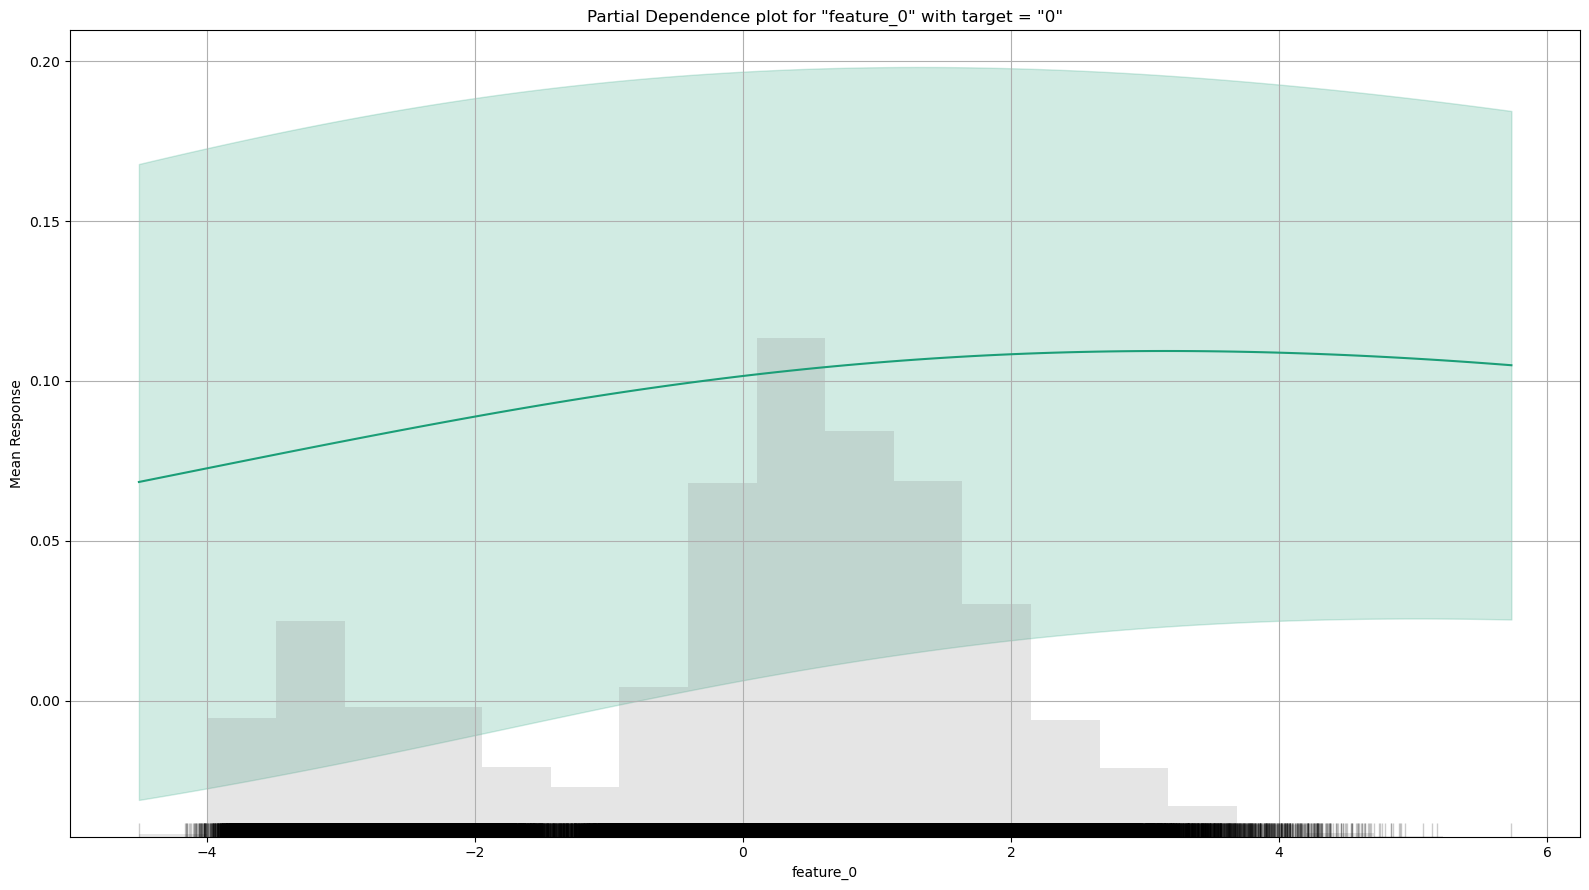

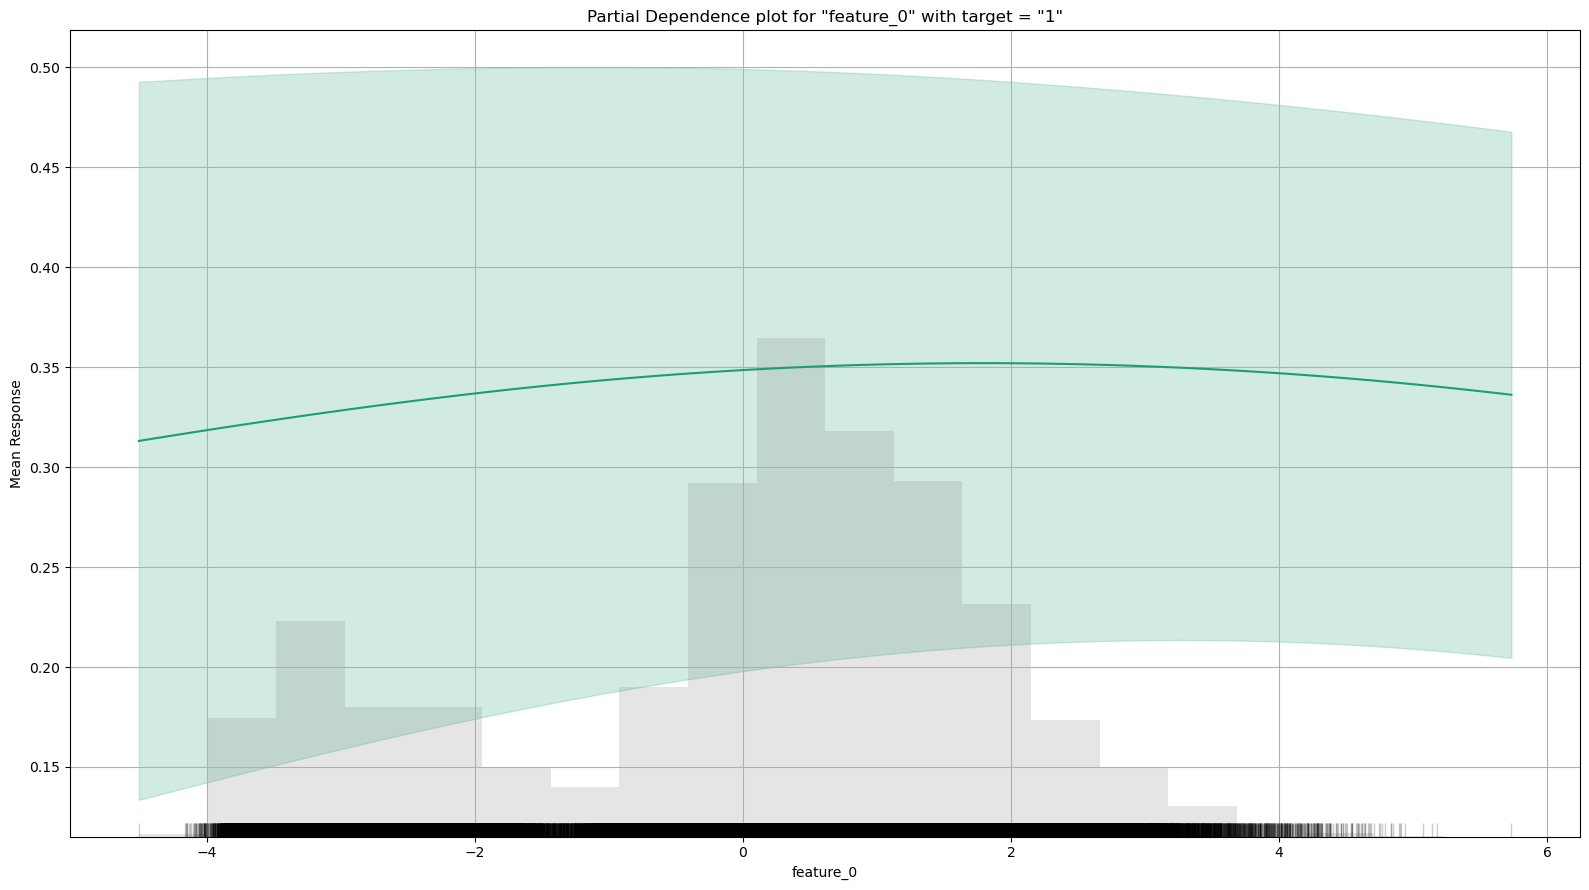

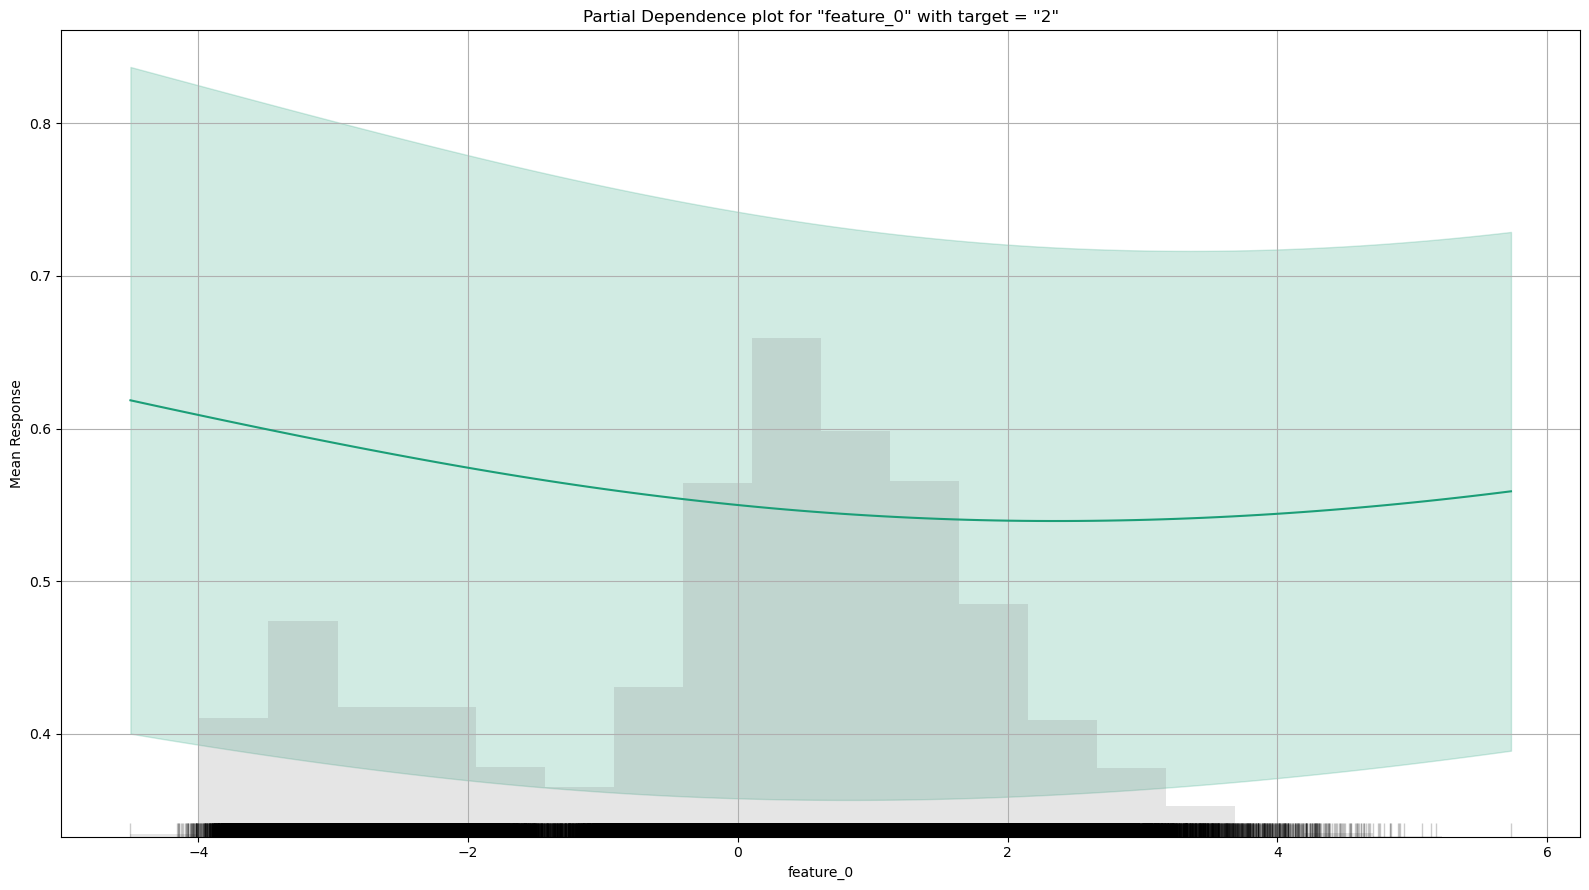

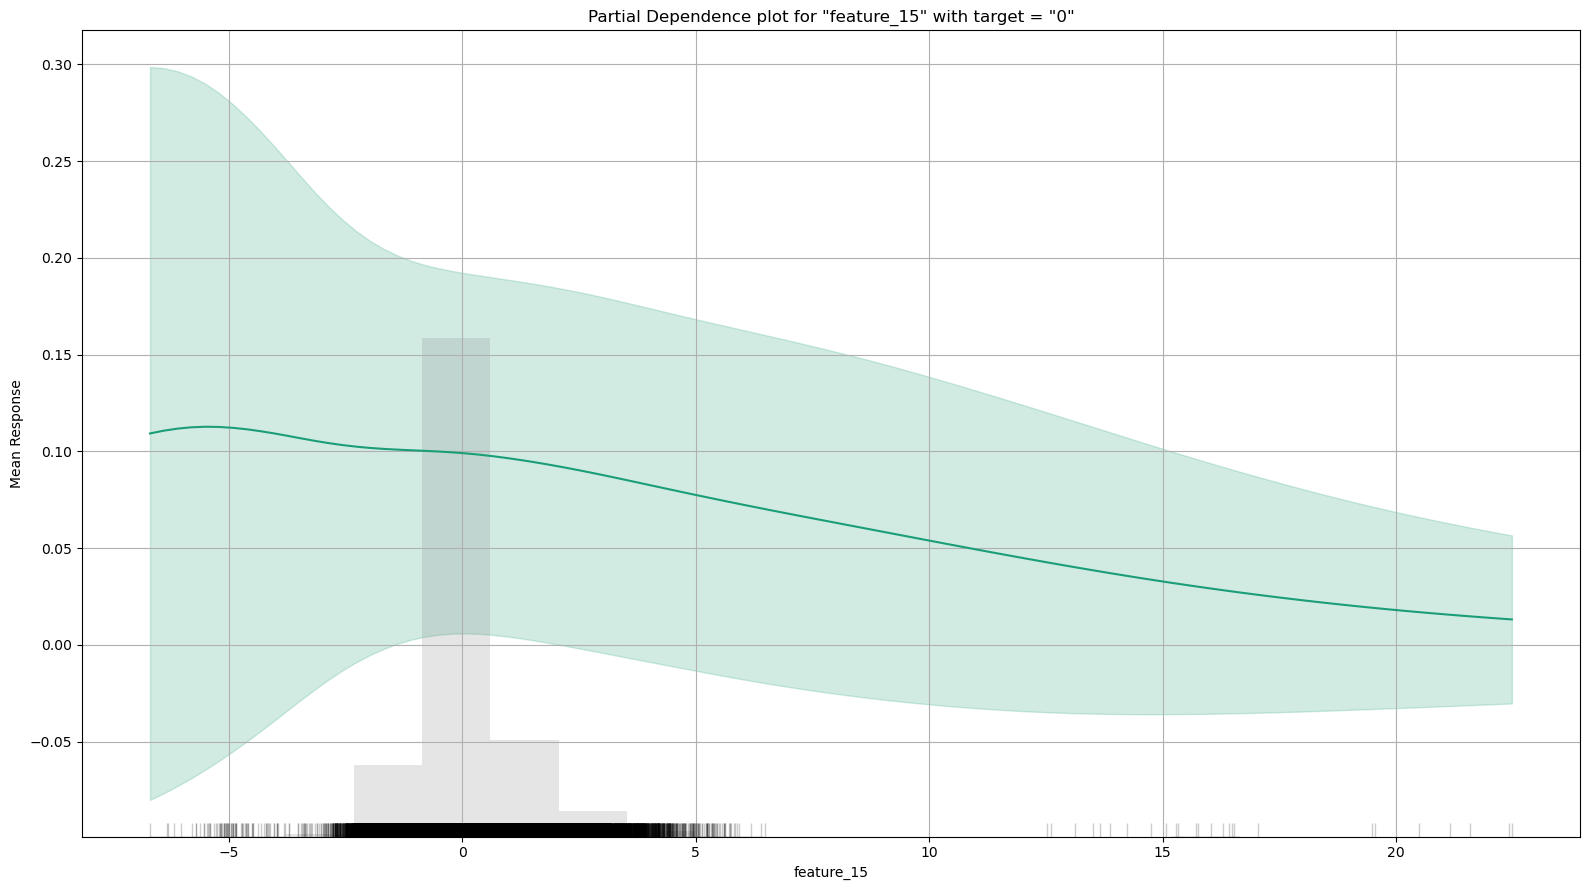

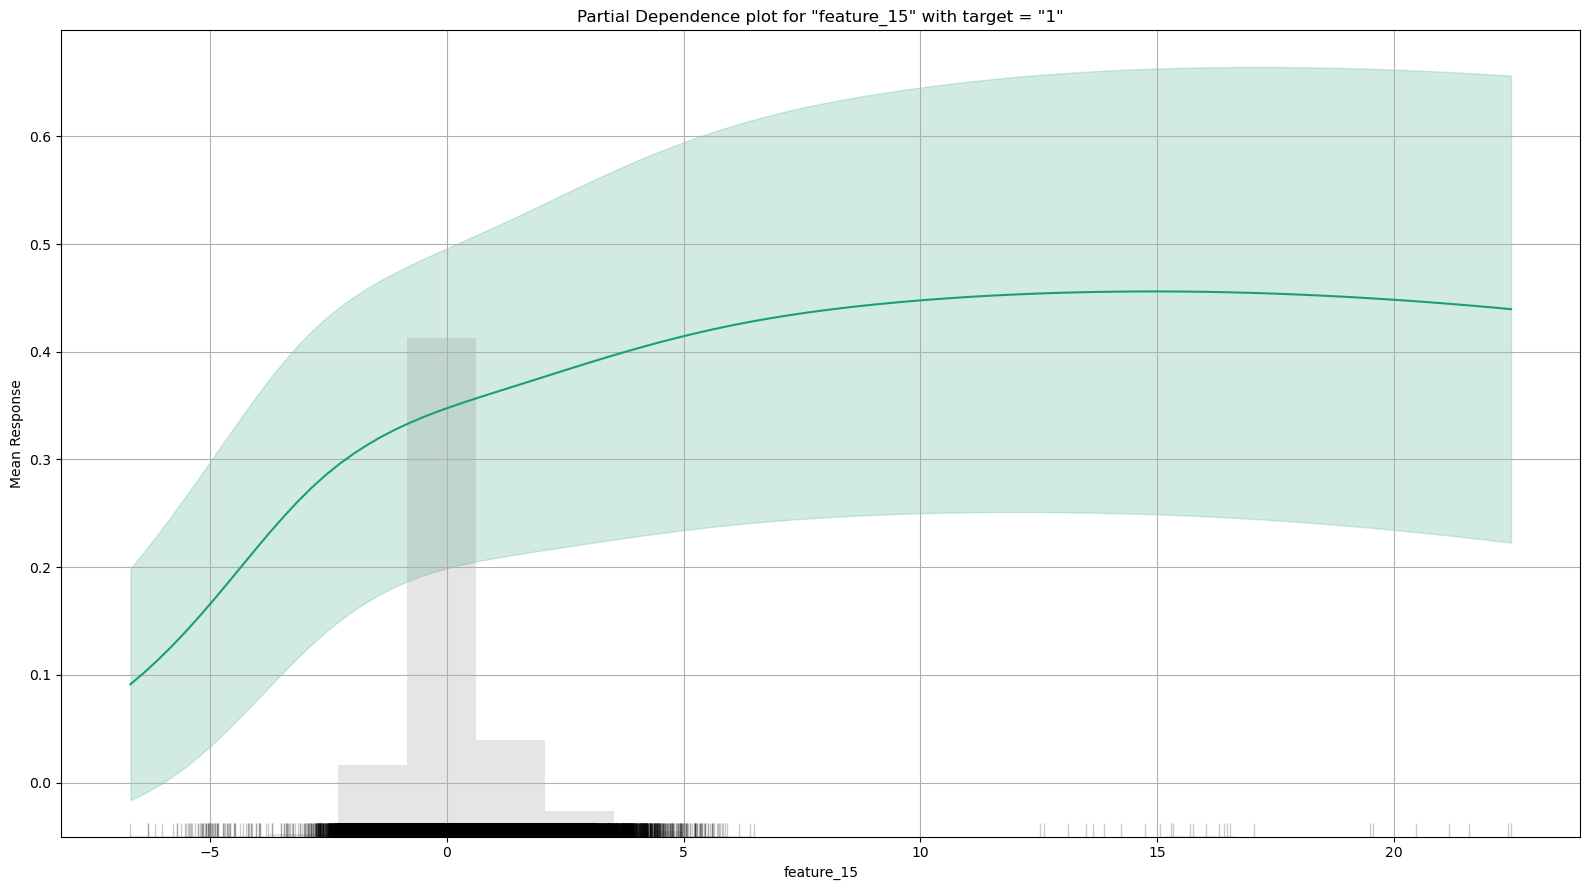

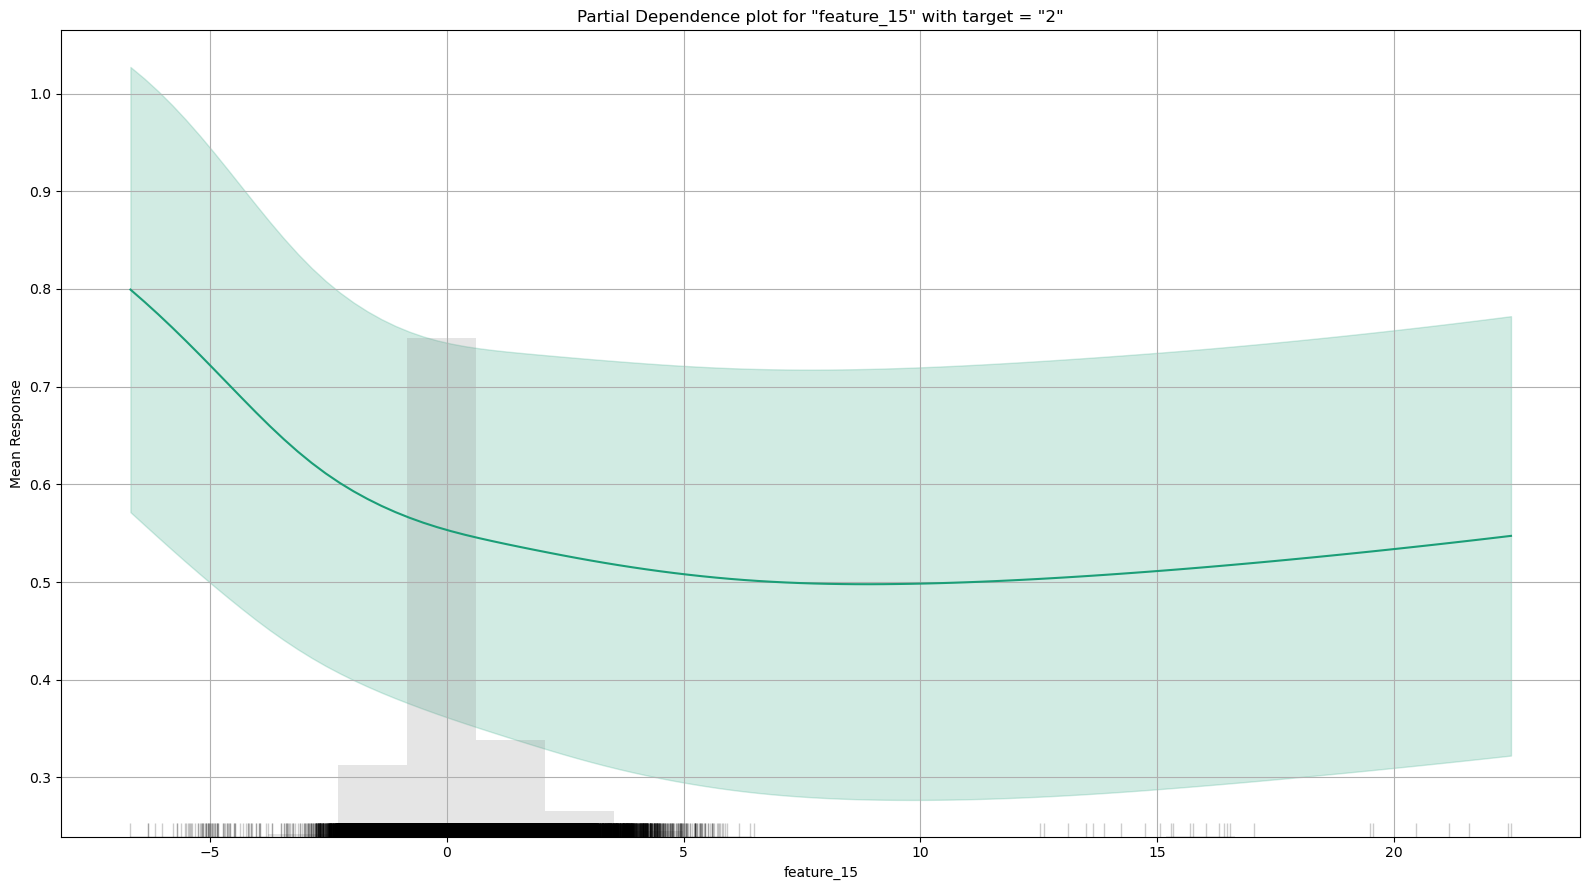

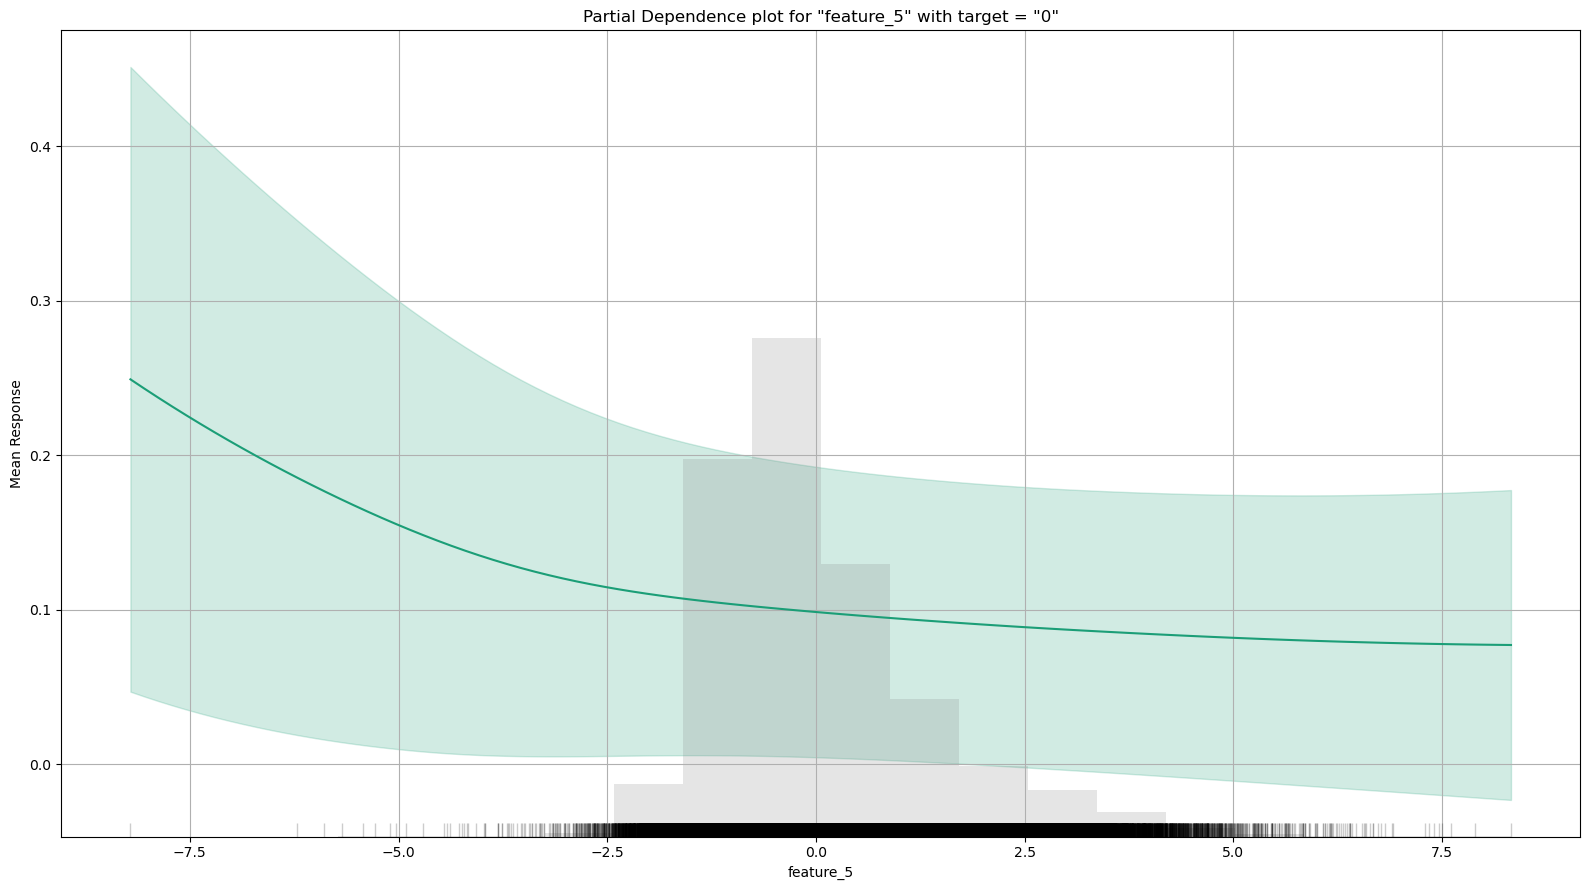

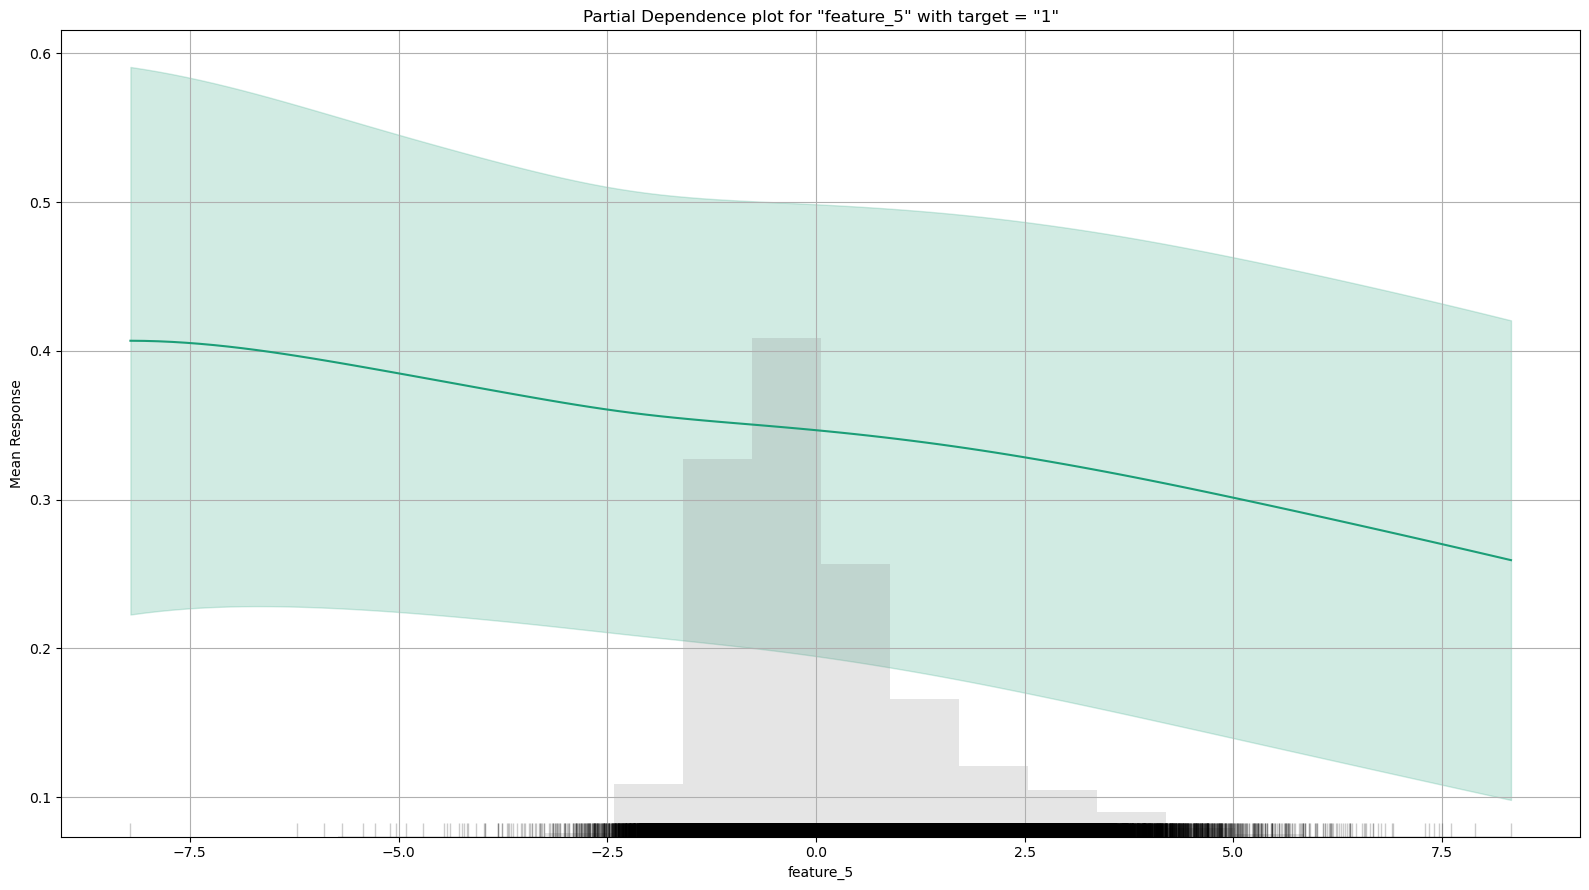

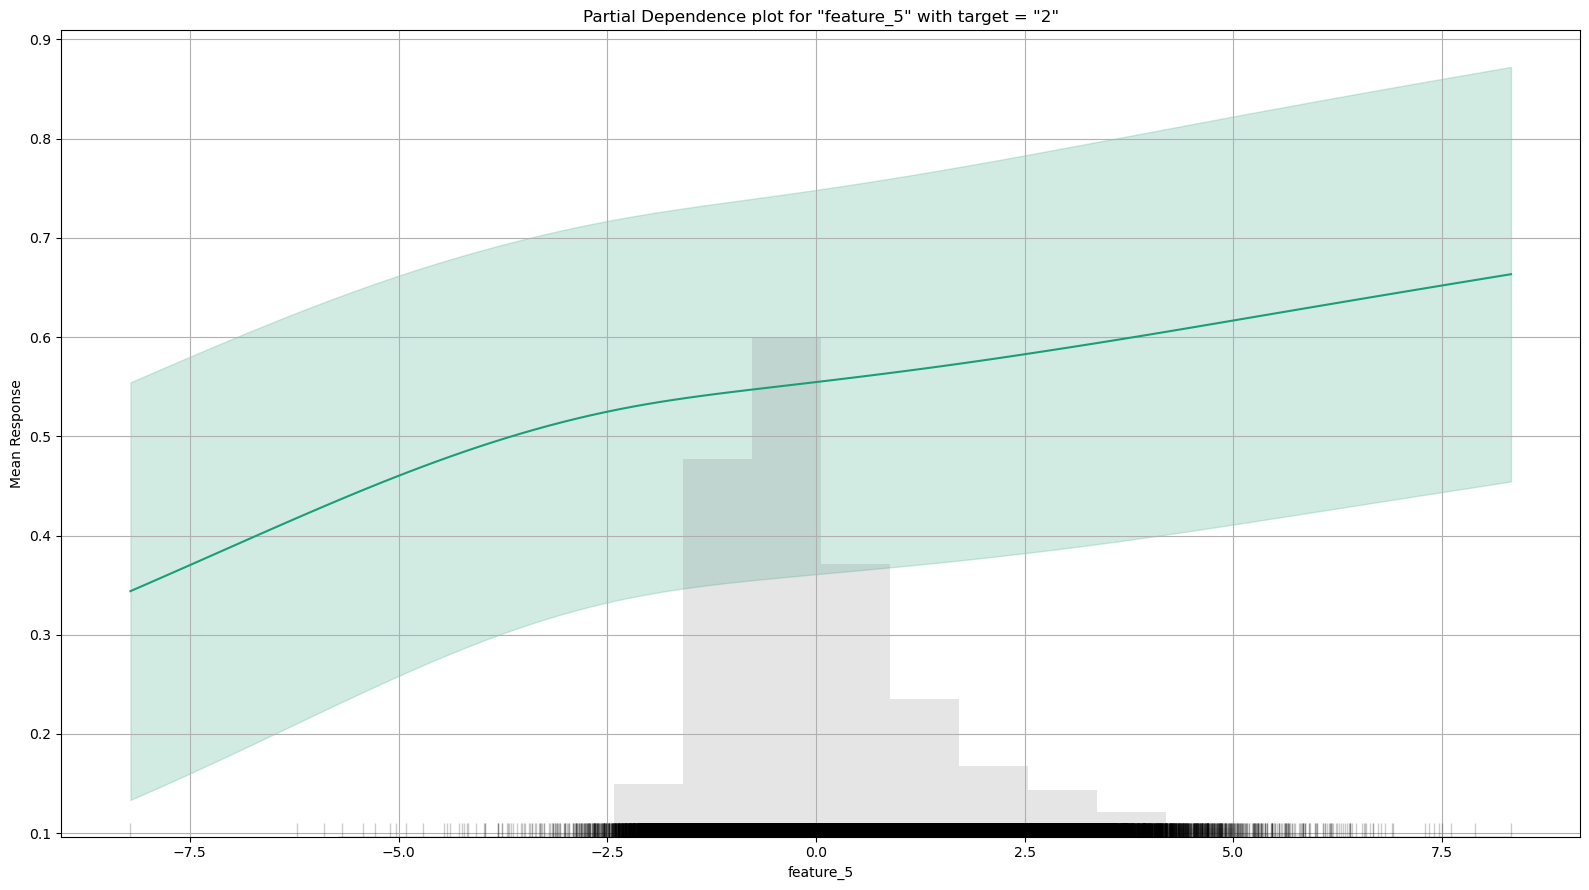

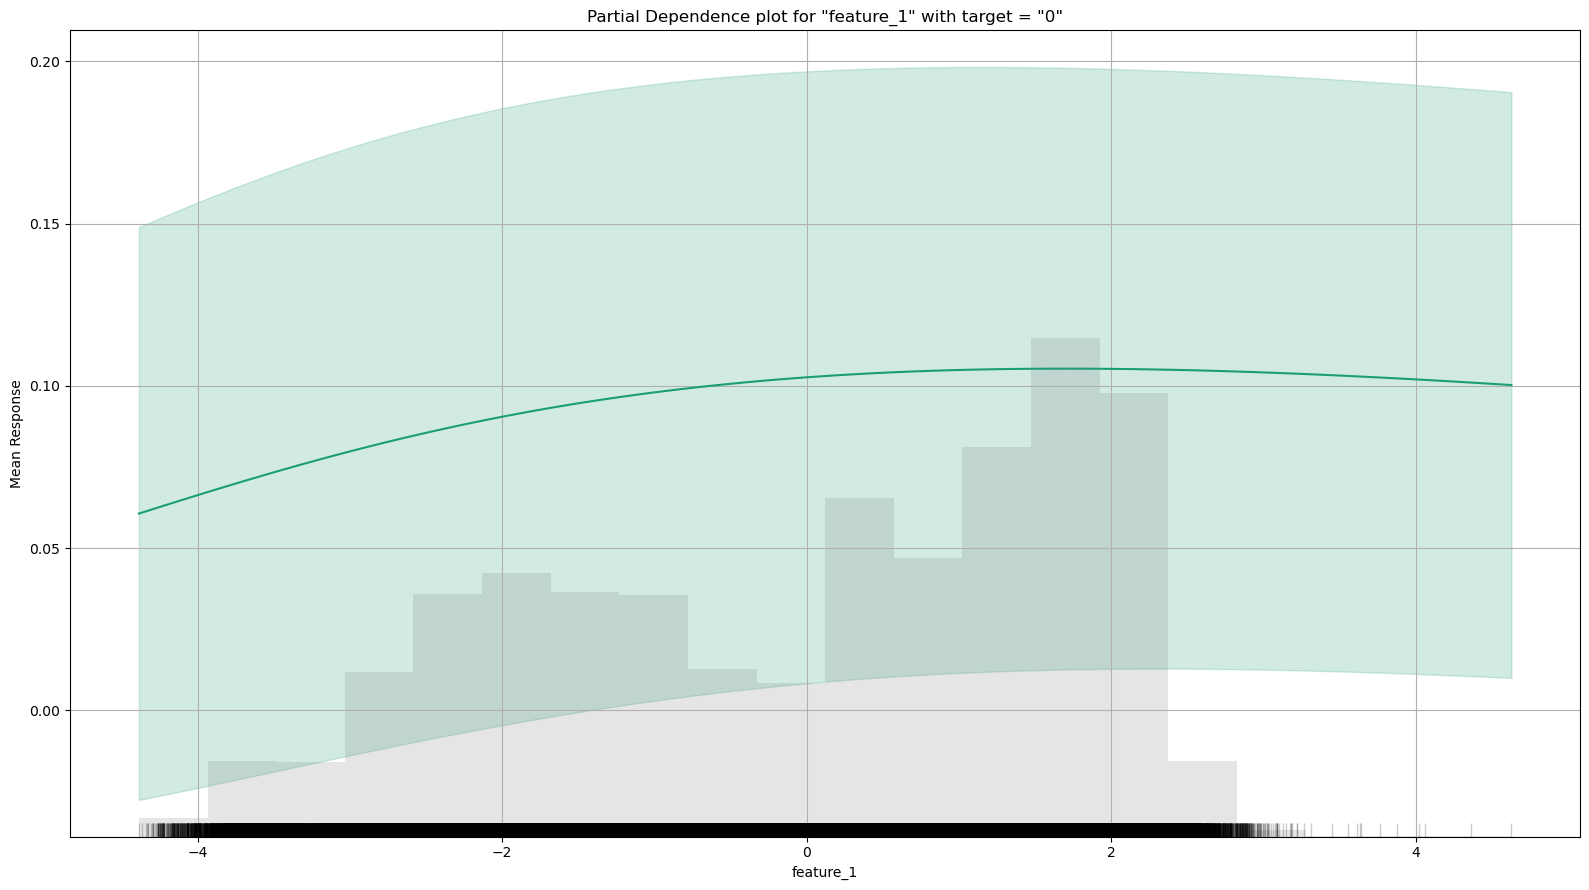

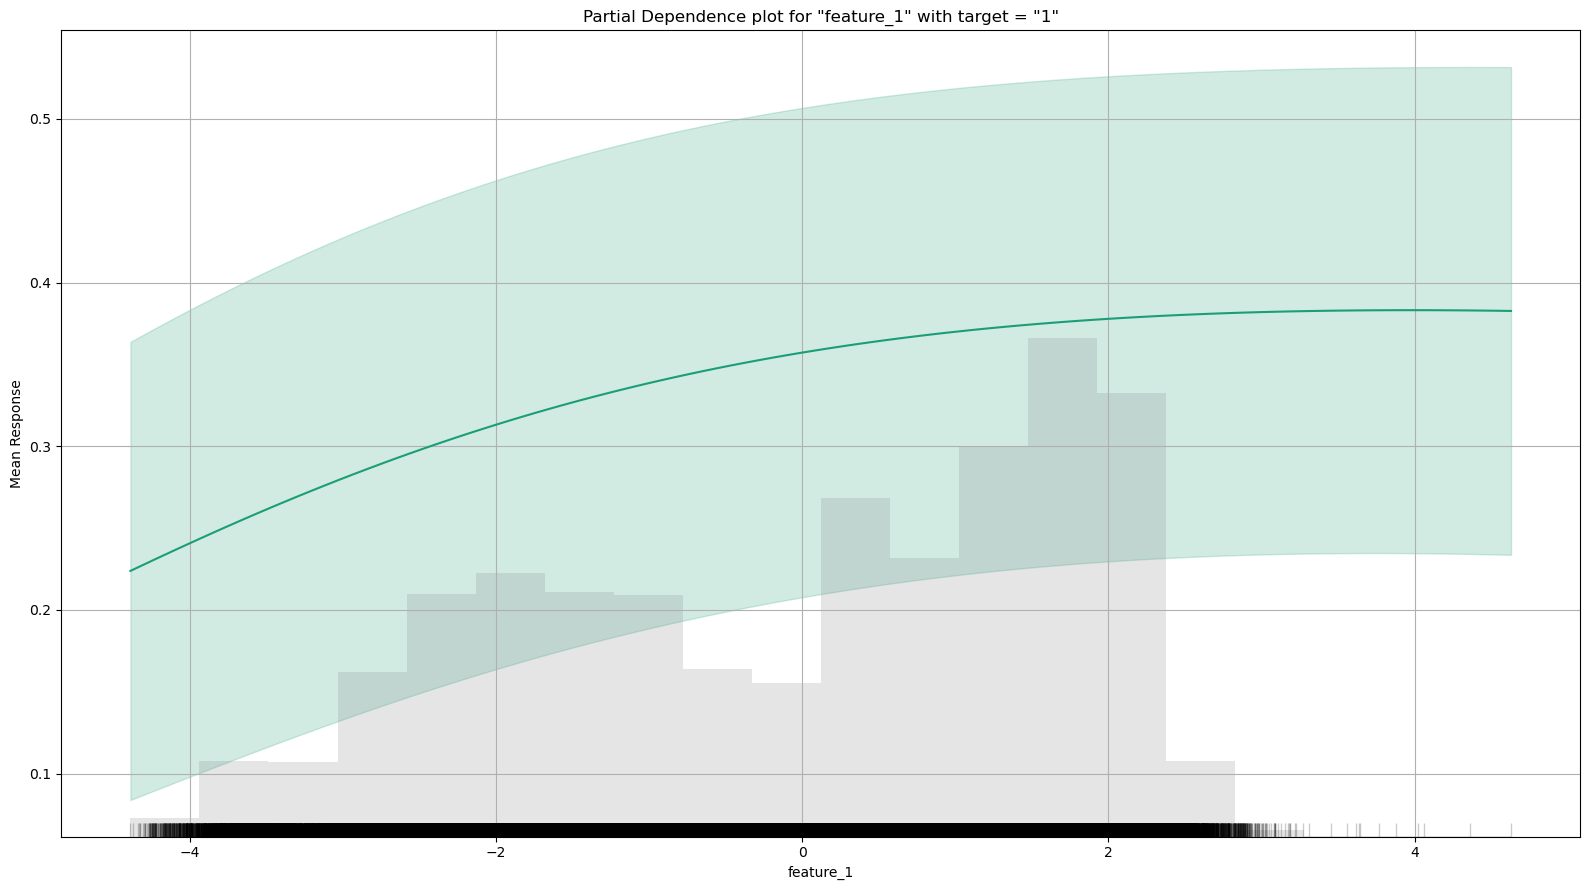

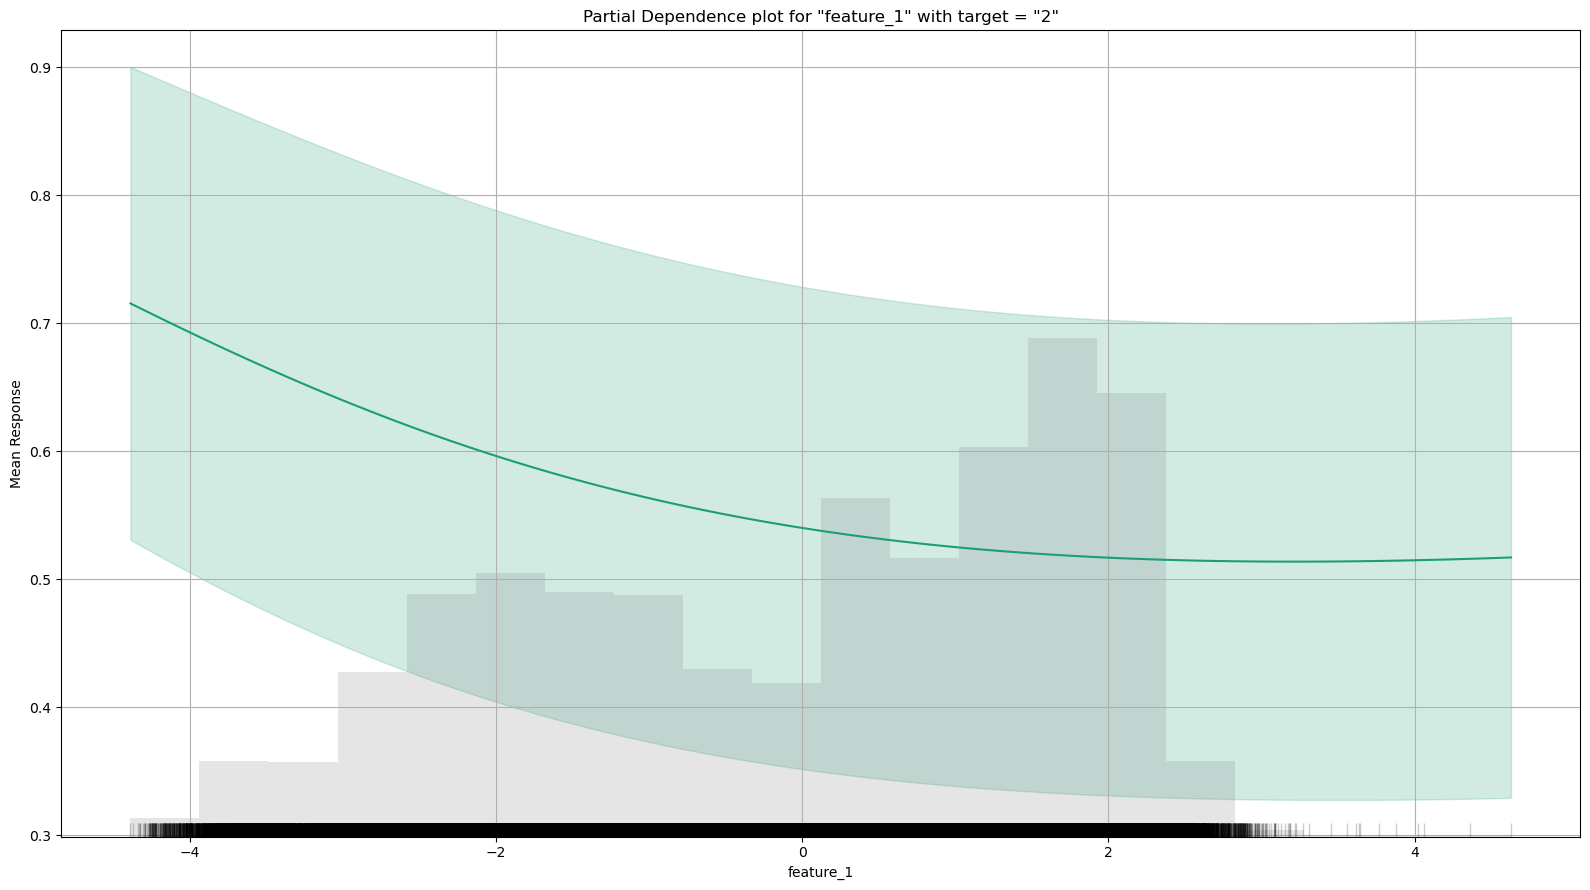

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_grid_1_AutoML_7_20250108_151816_model_1

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1     2      Error     Rate
---  ----  -----  --------  --------------
129  718   1253   0.938571  1,971 / 2,100
81   2146  4141   0.663003  4,222 / 6,368
70   1413  8367   0.150558  1,483 / 9,850
280  4277  13761  0.419041  7,676 / 18,318

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

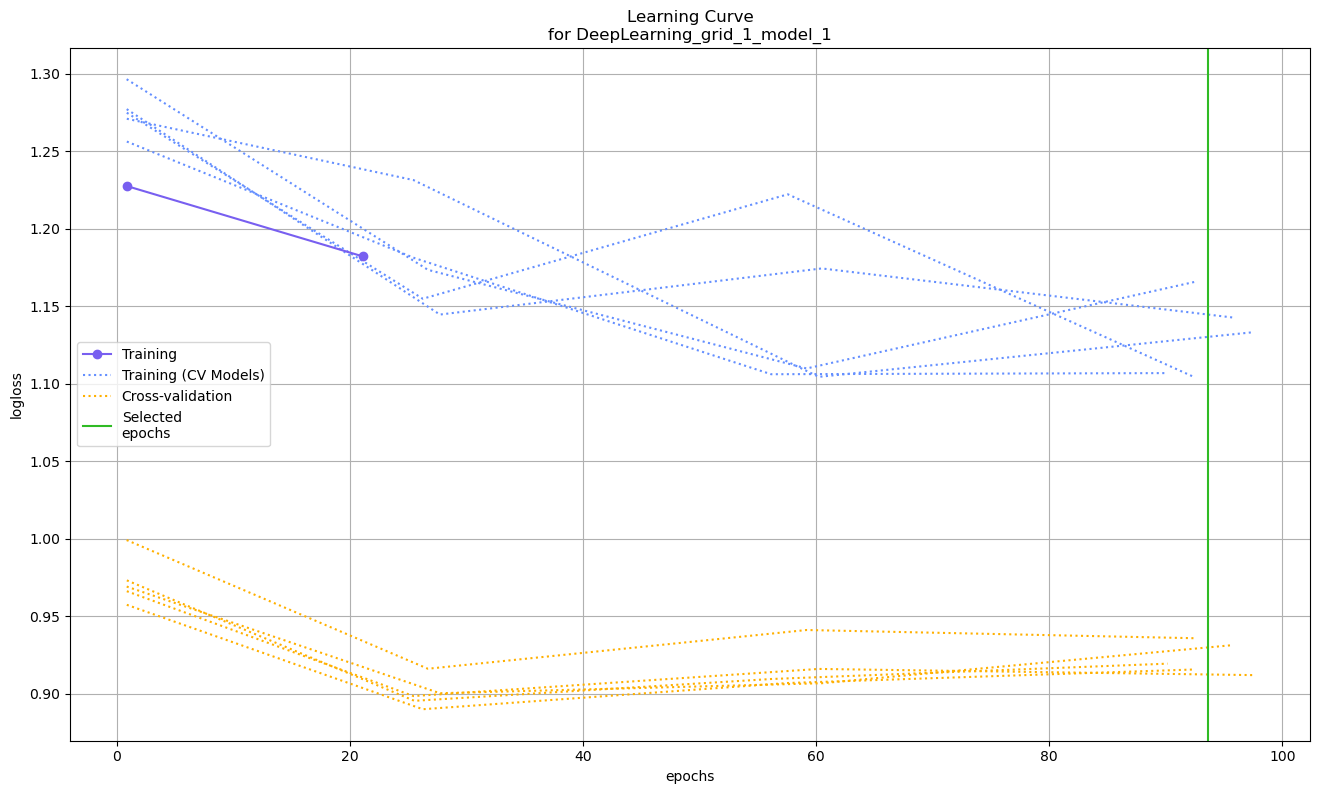

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

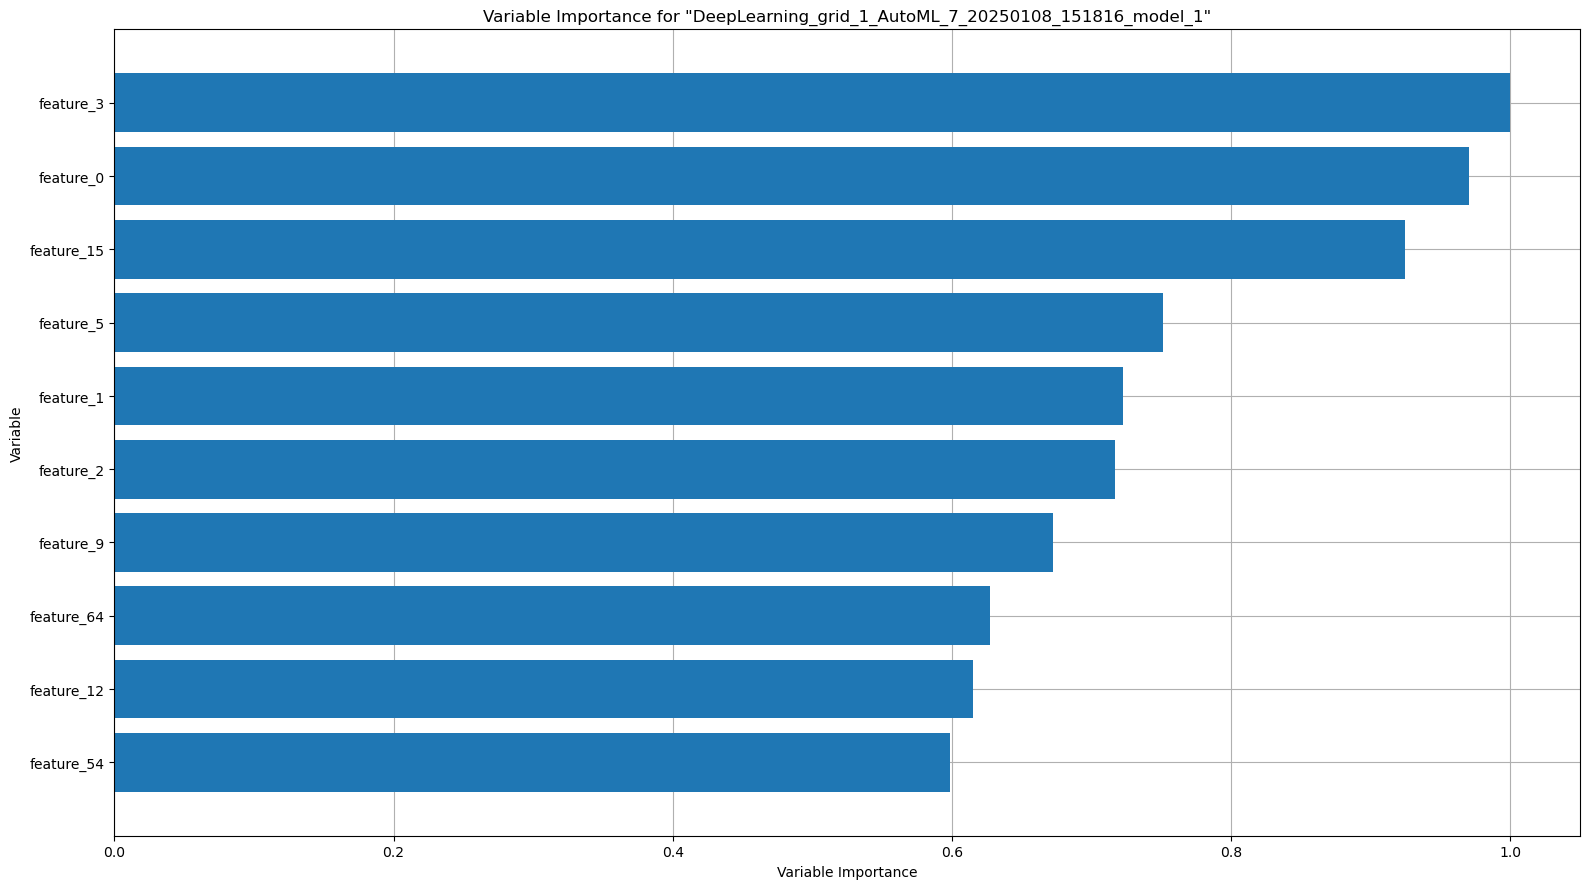

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

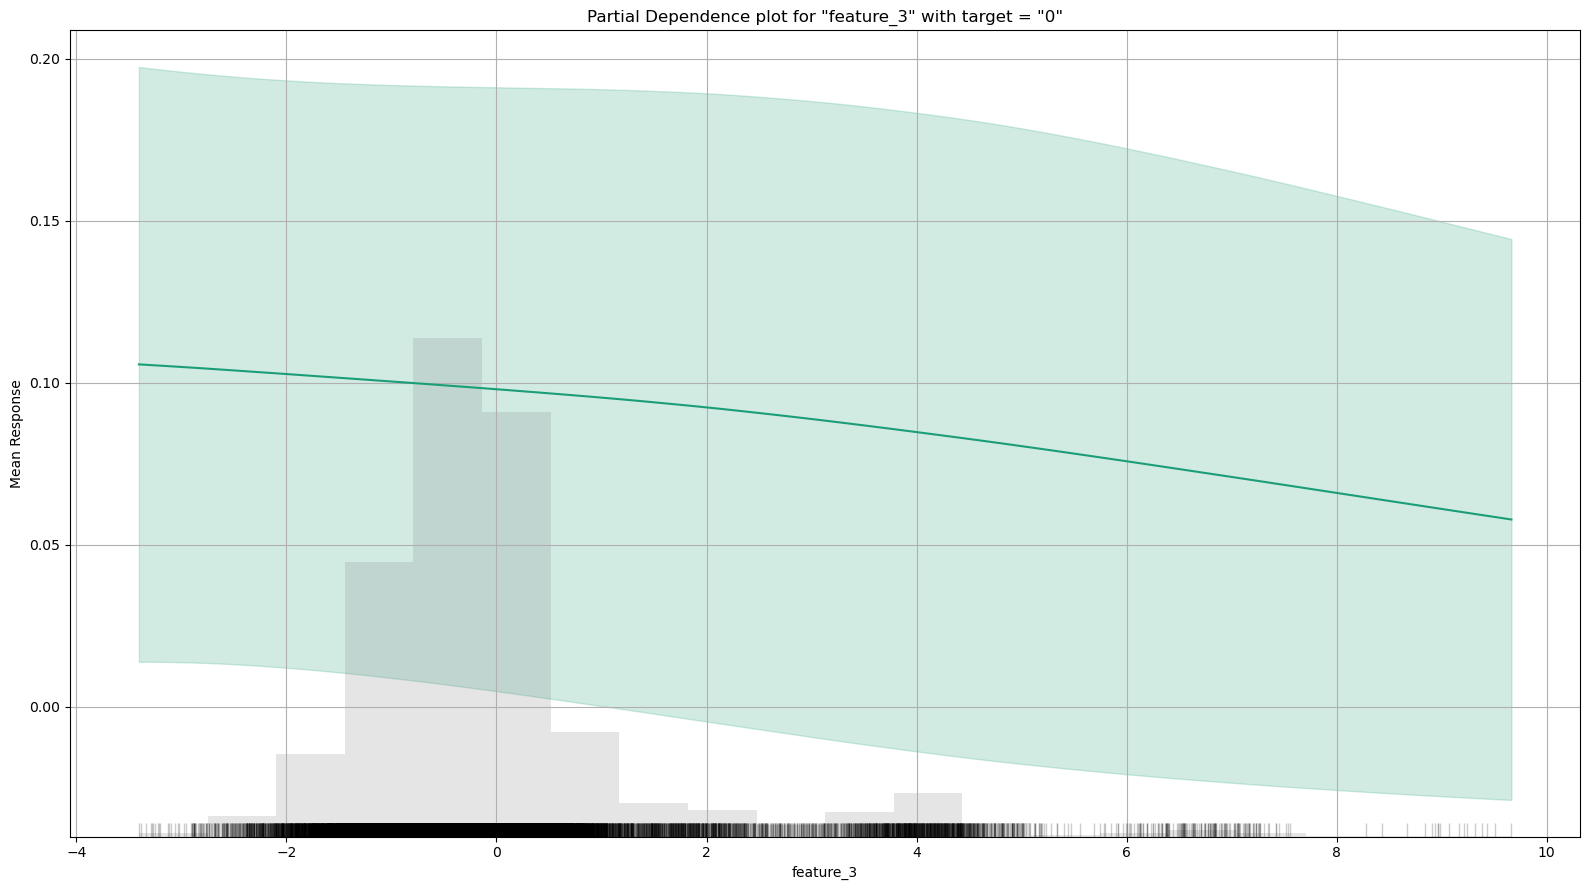

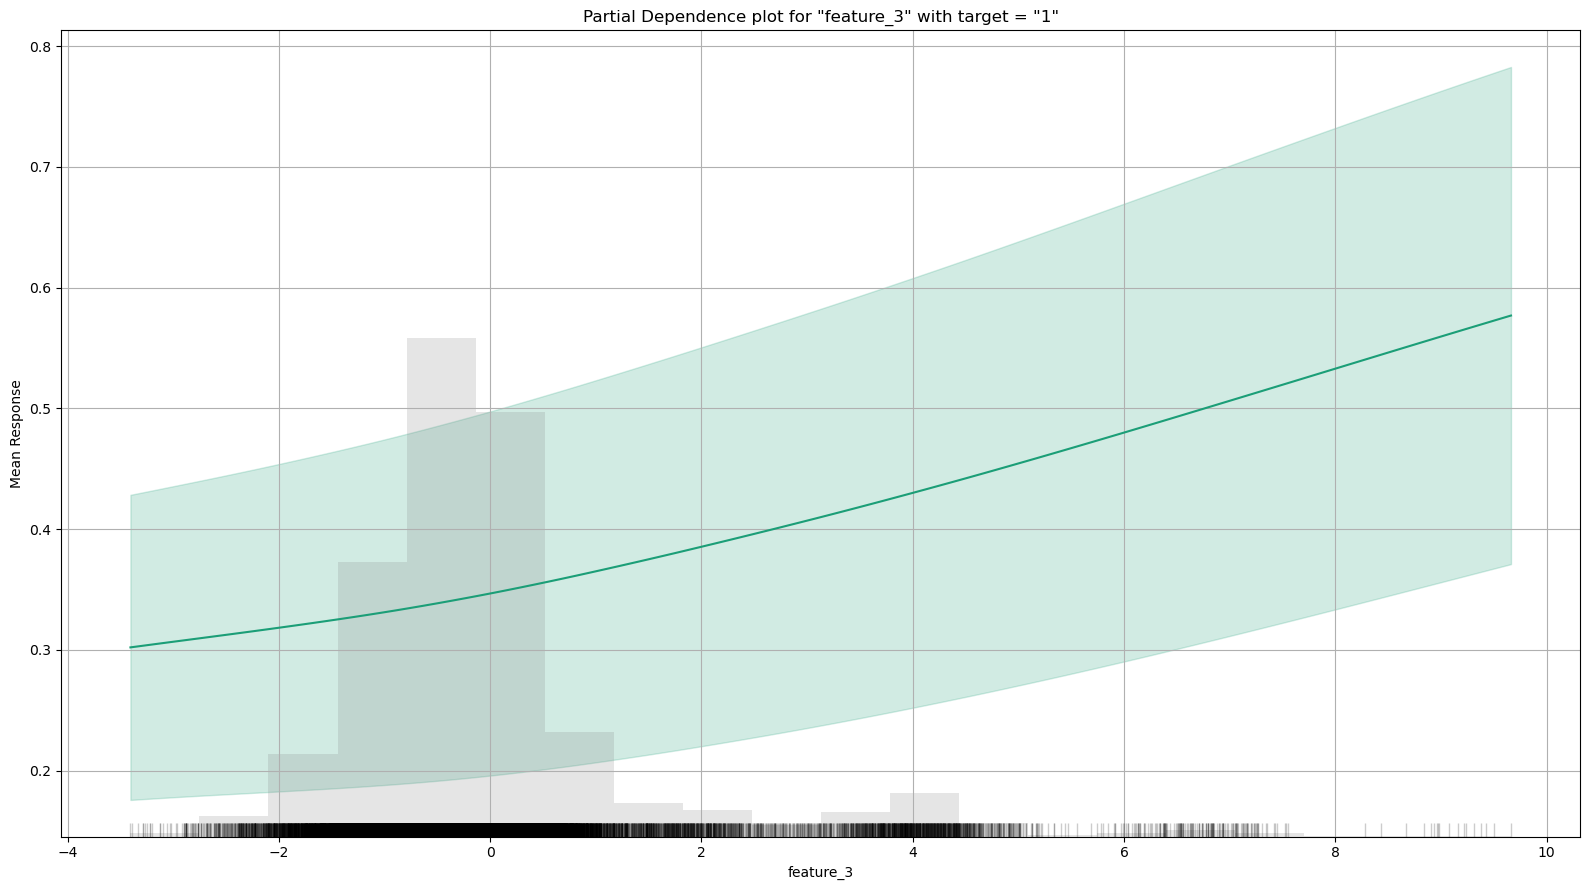

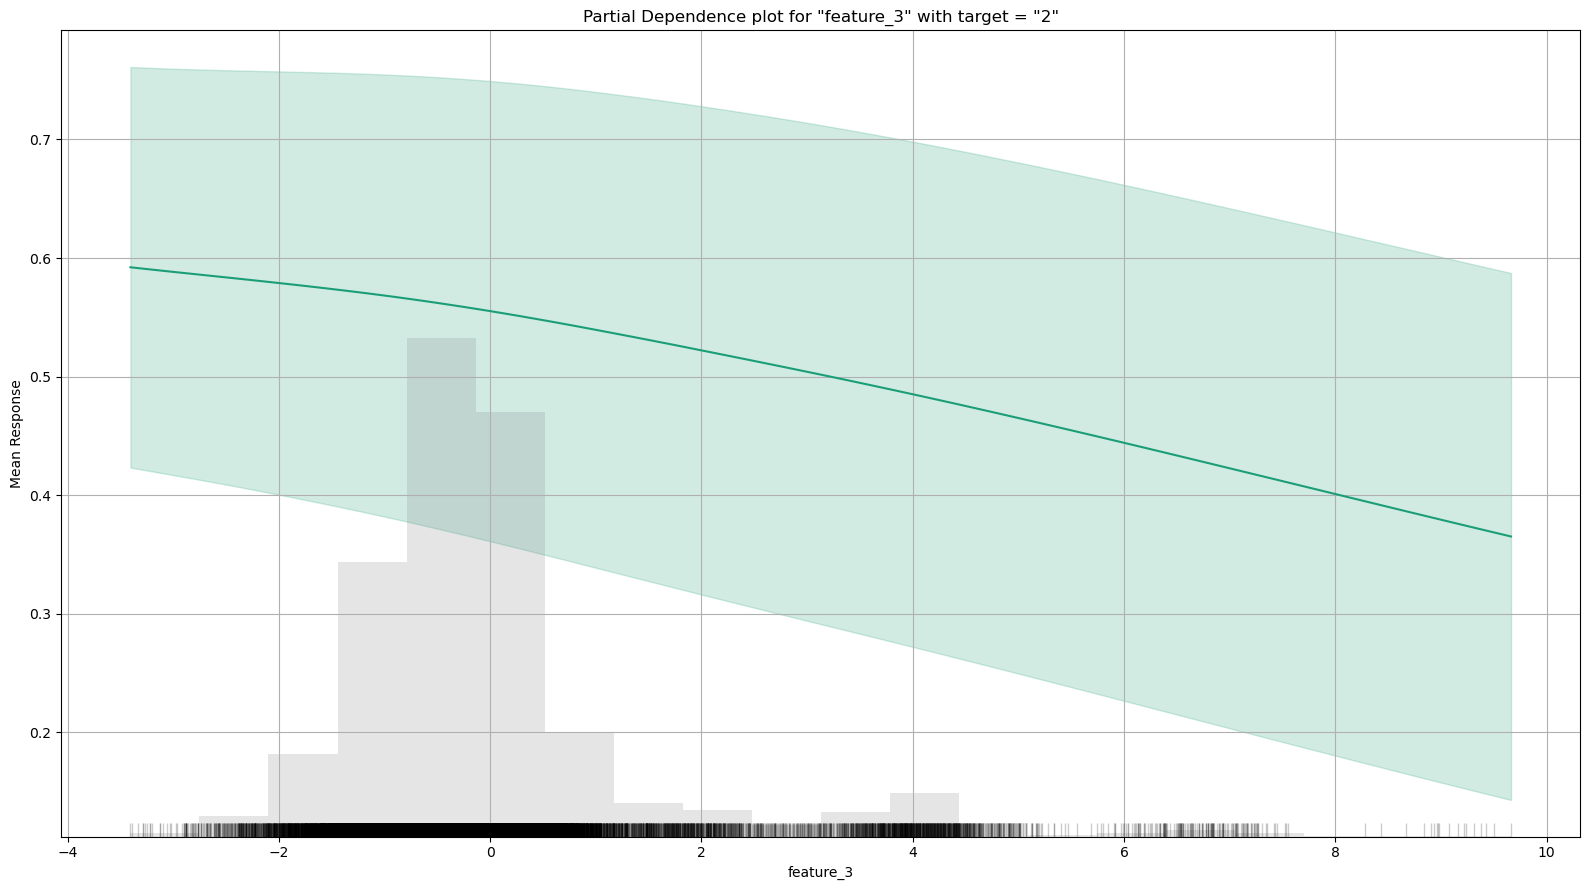

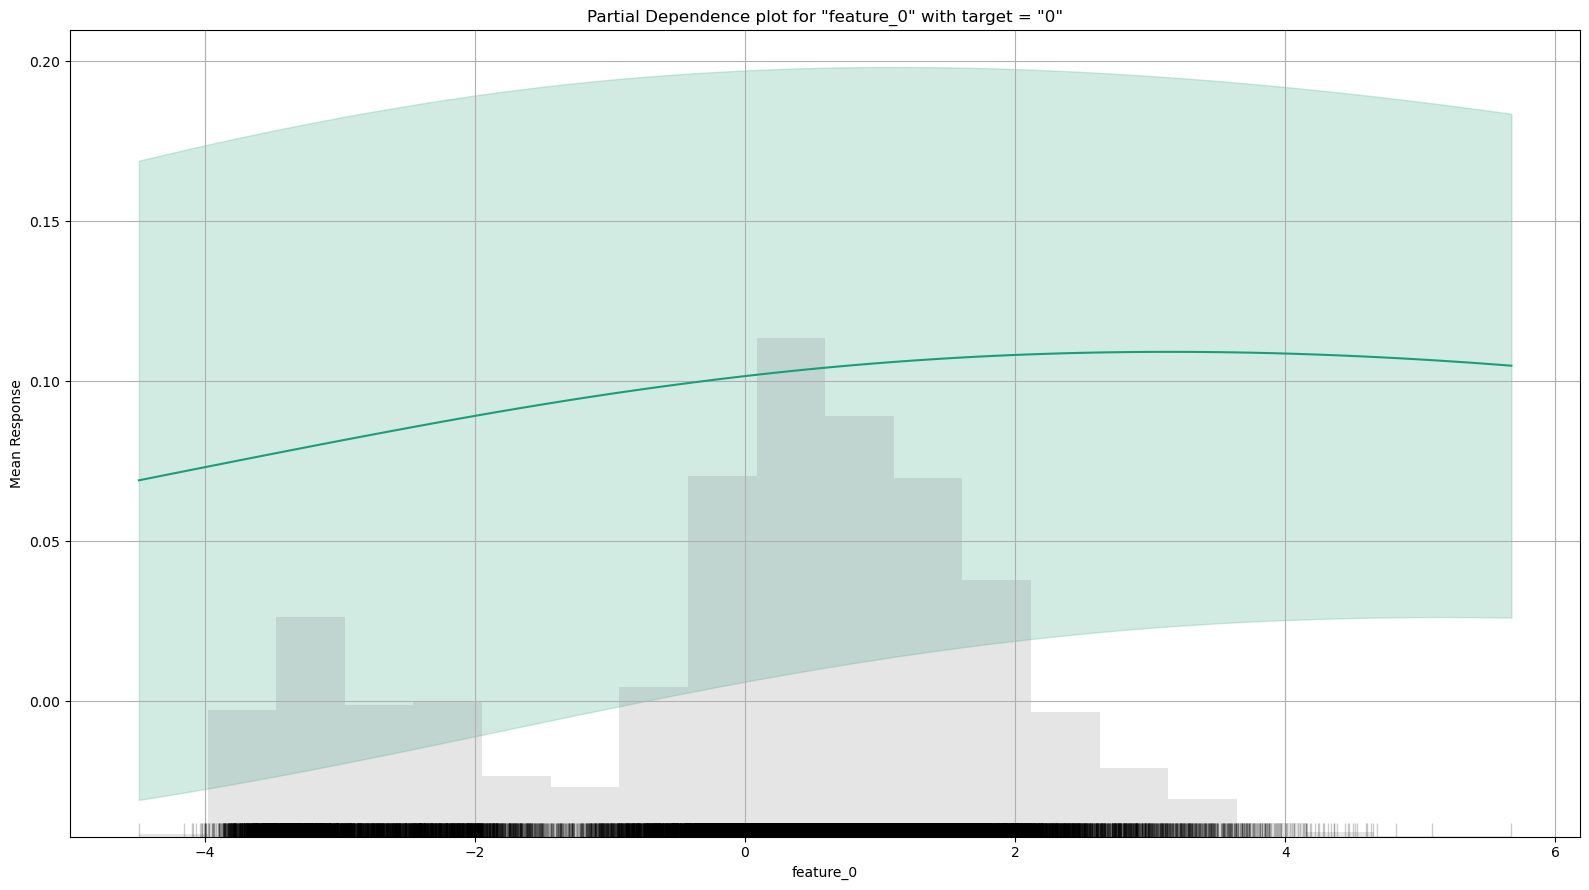

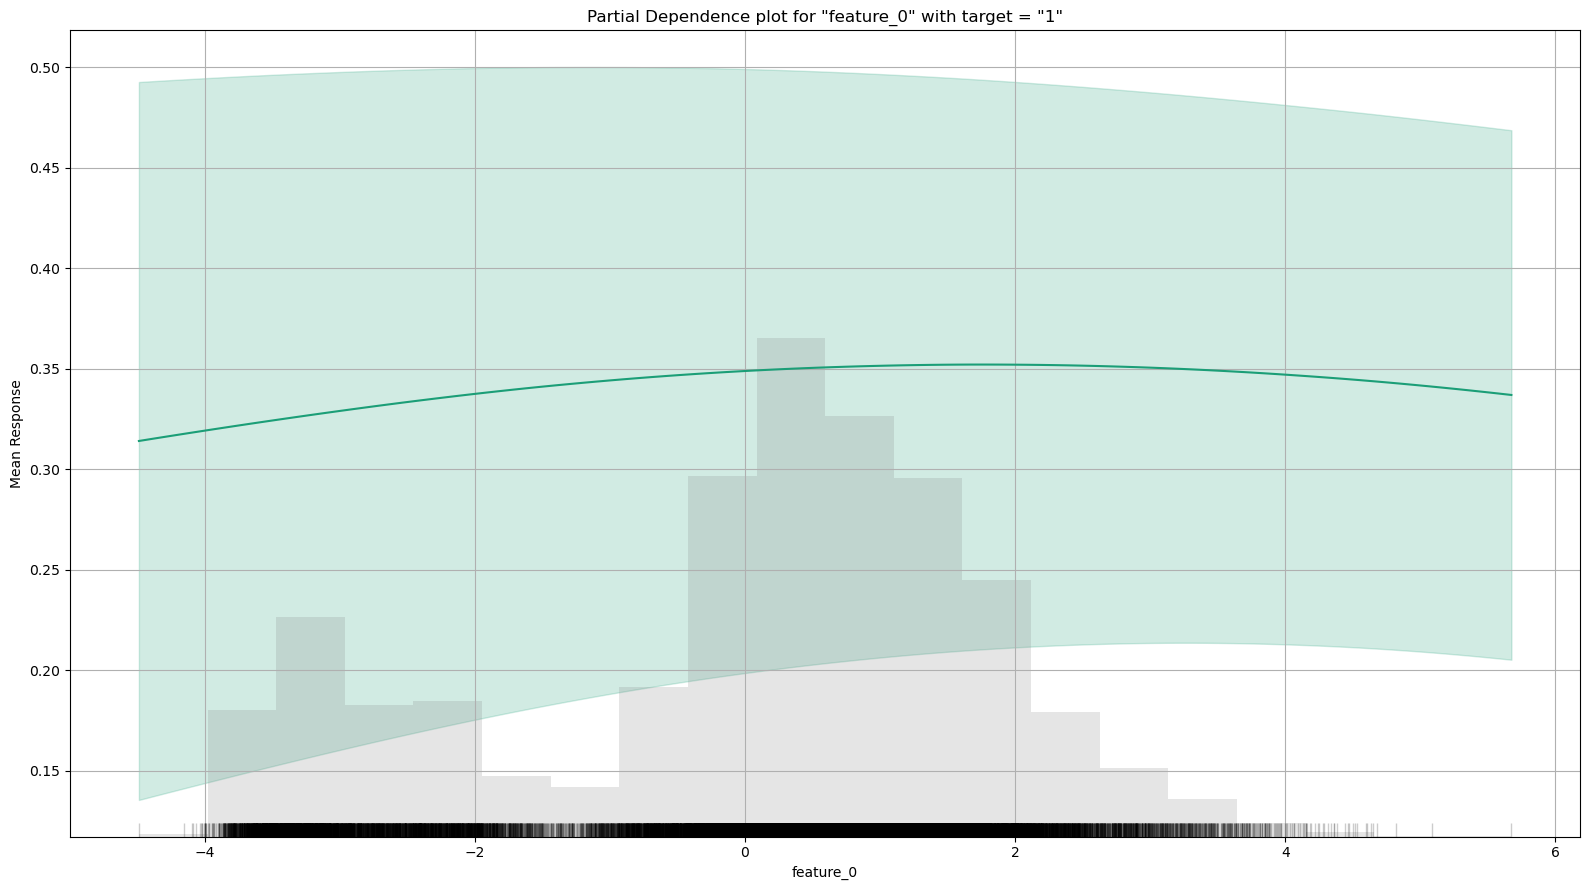

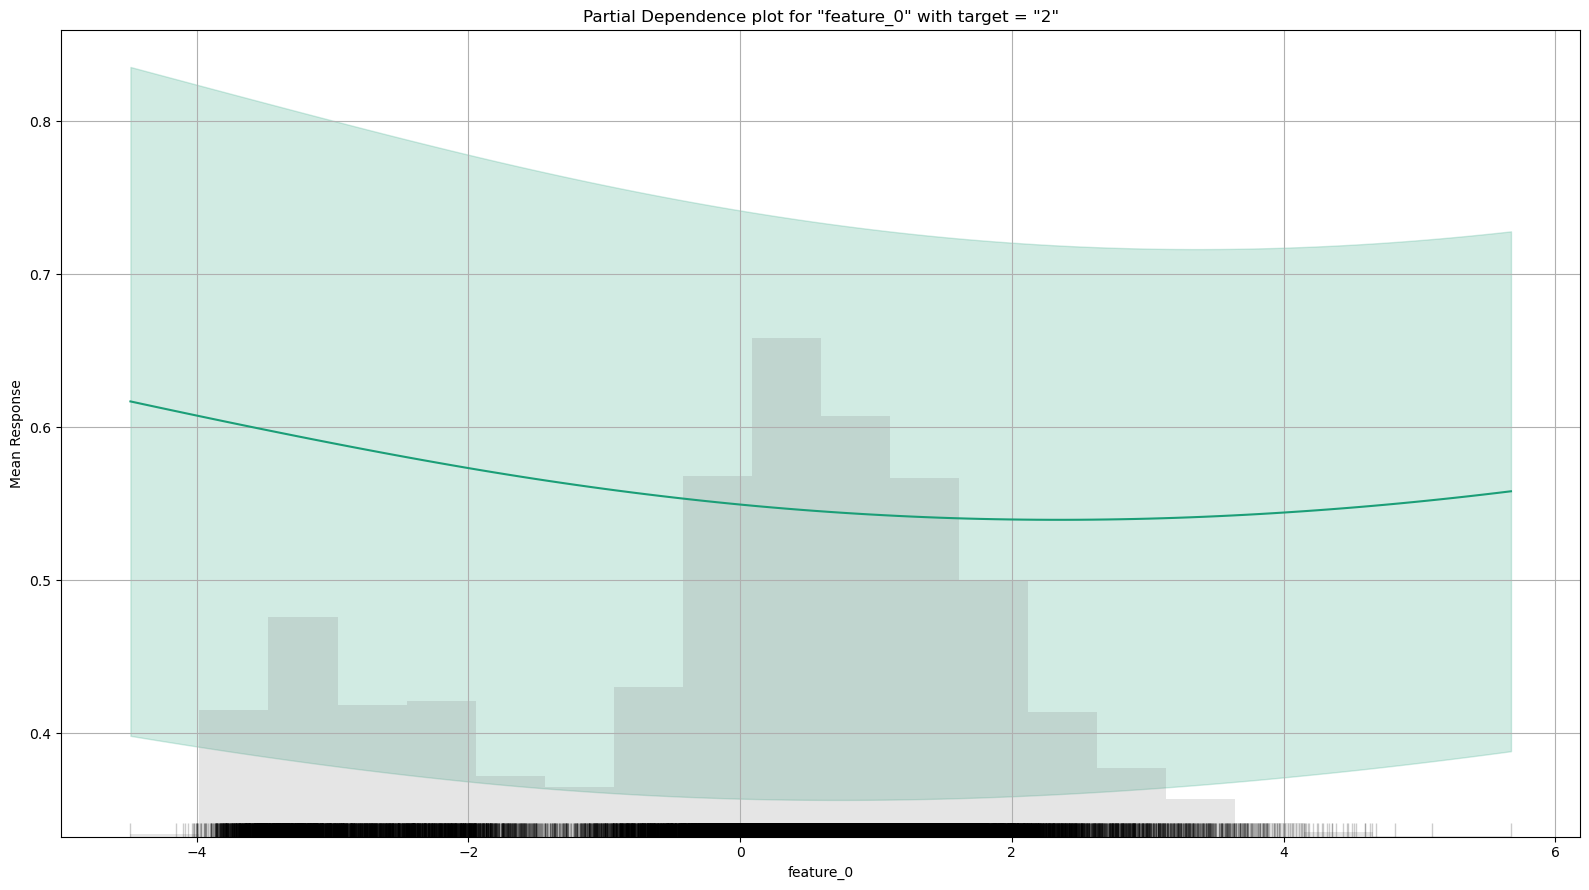

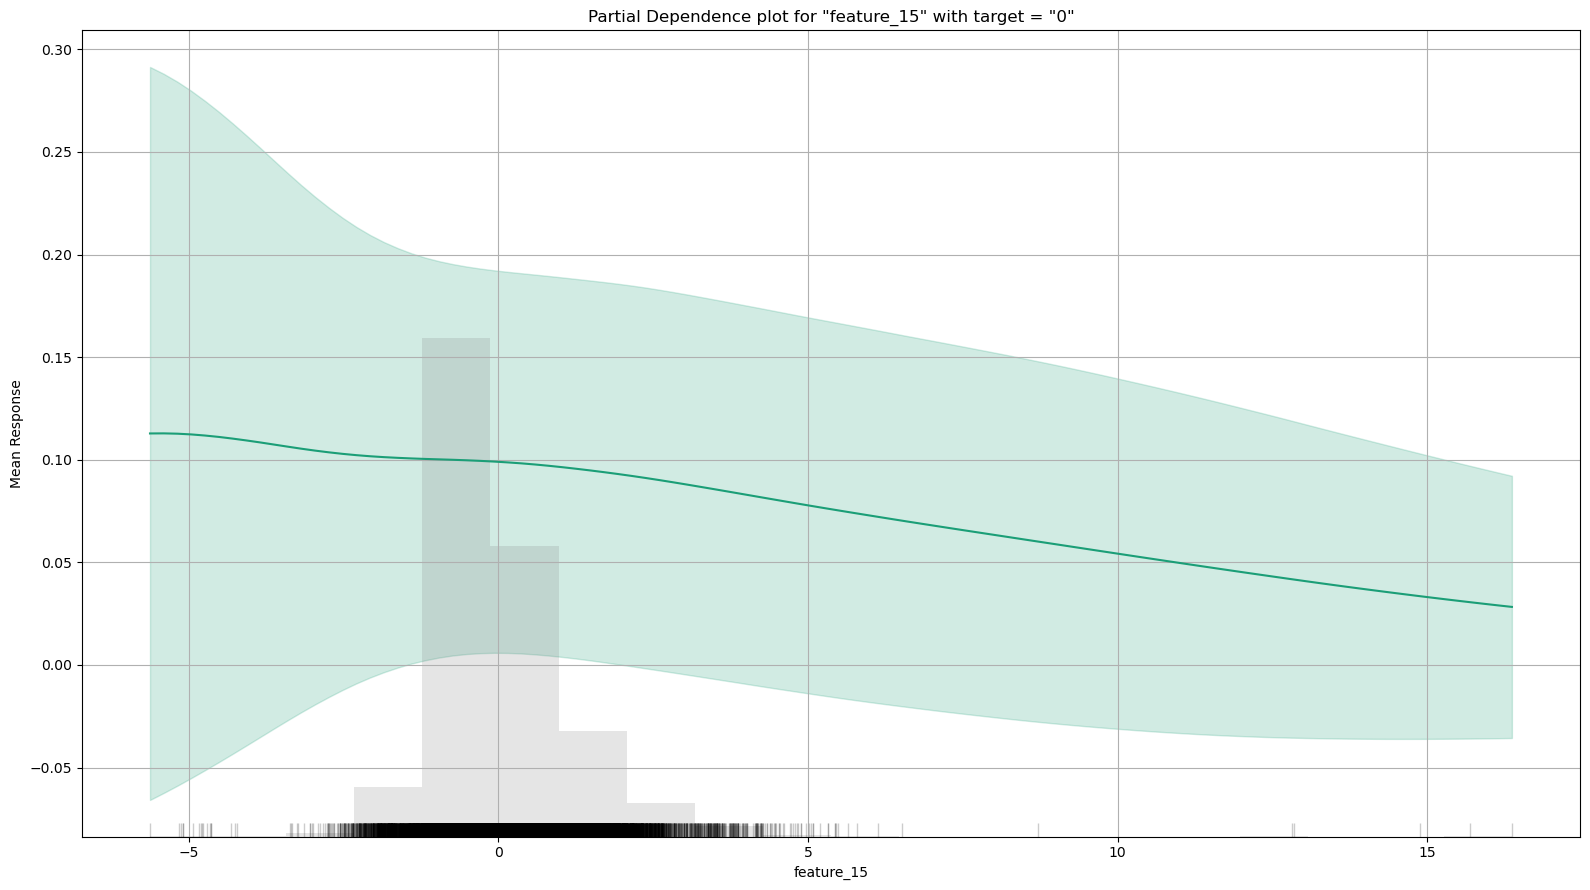

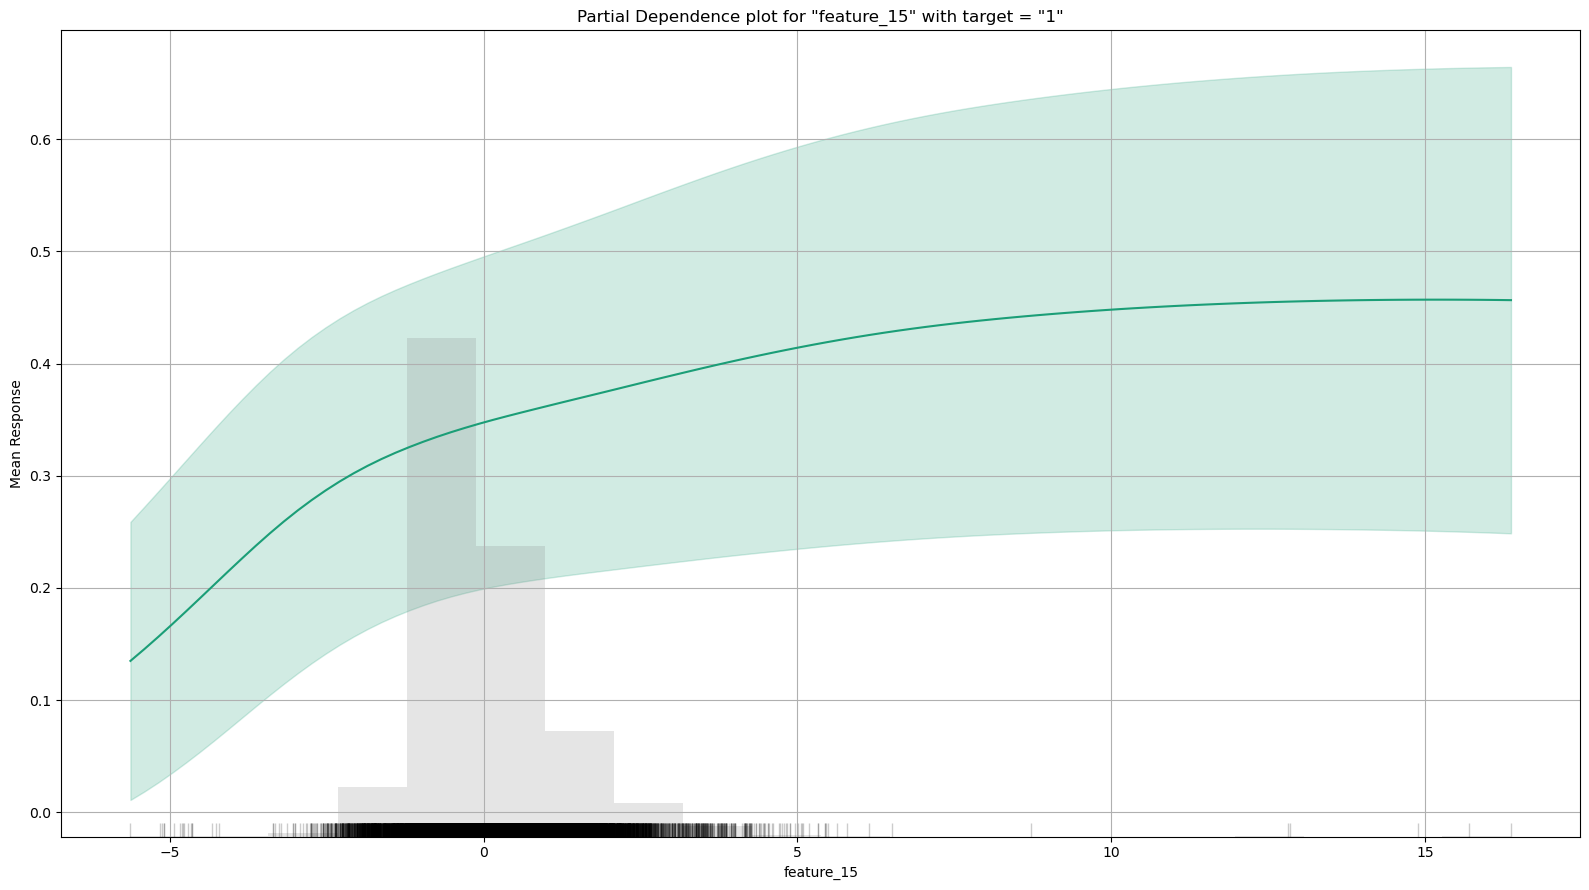

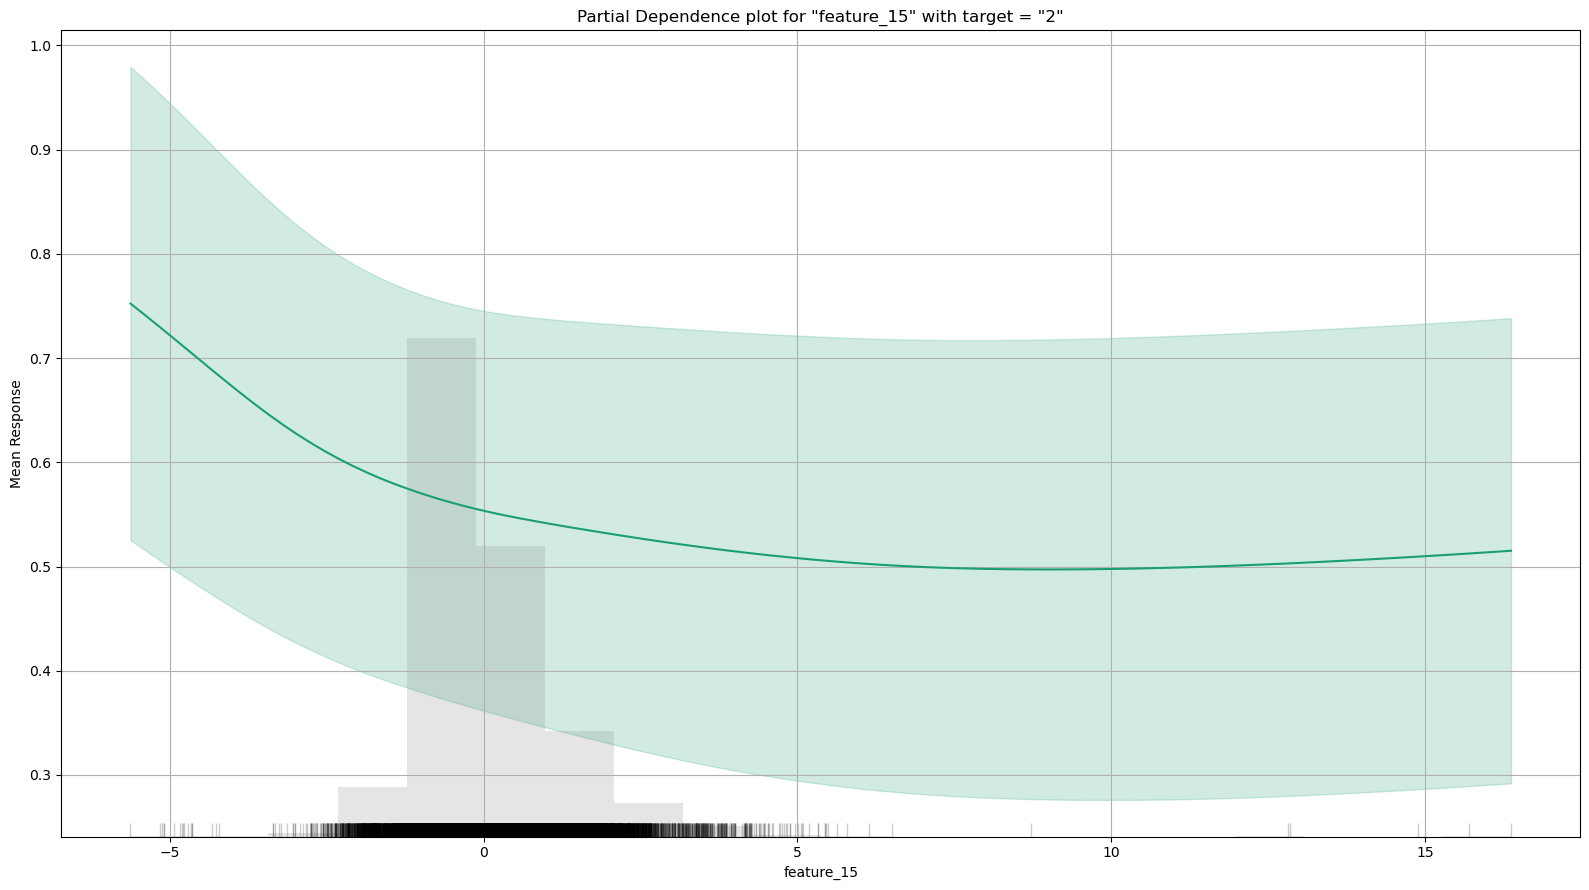

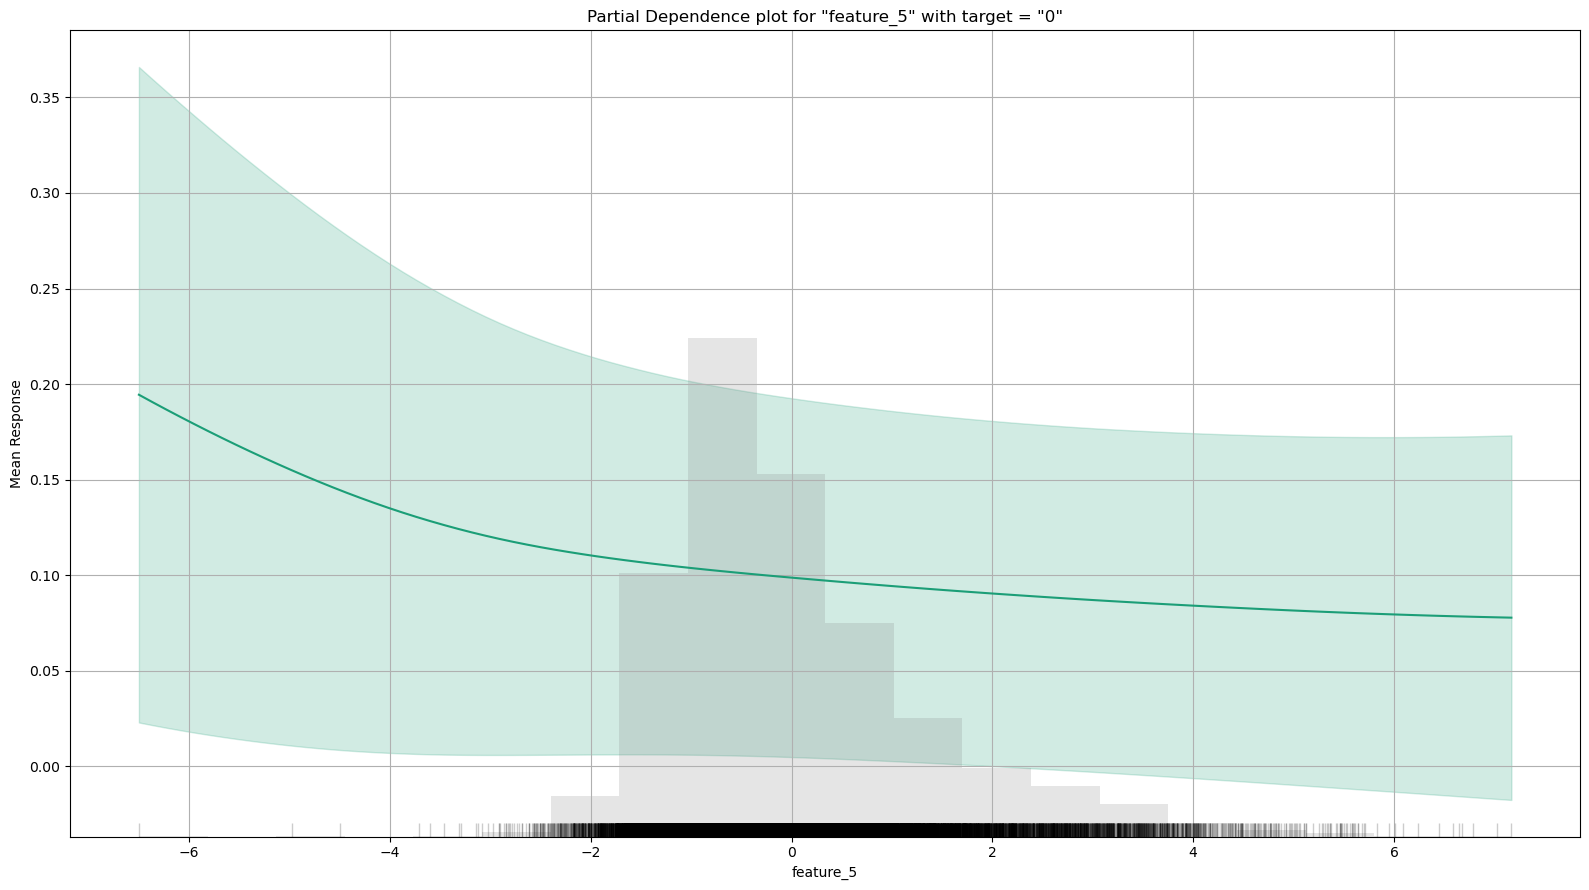

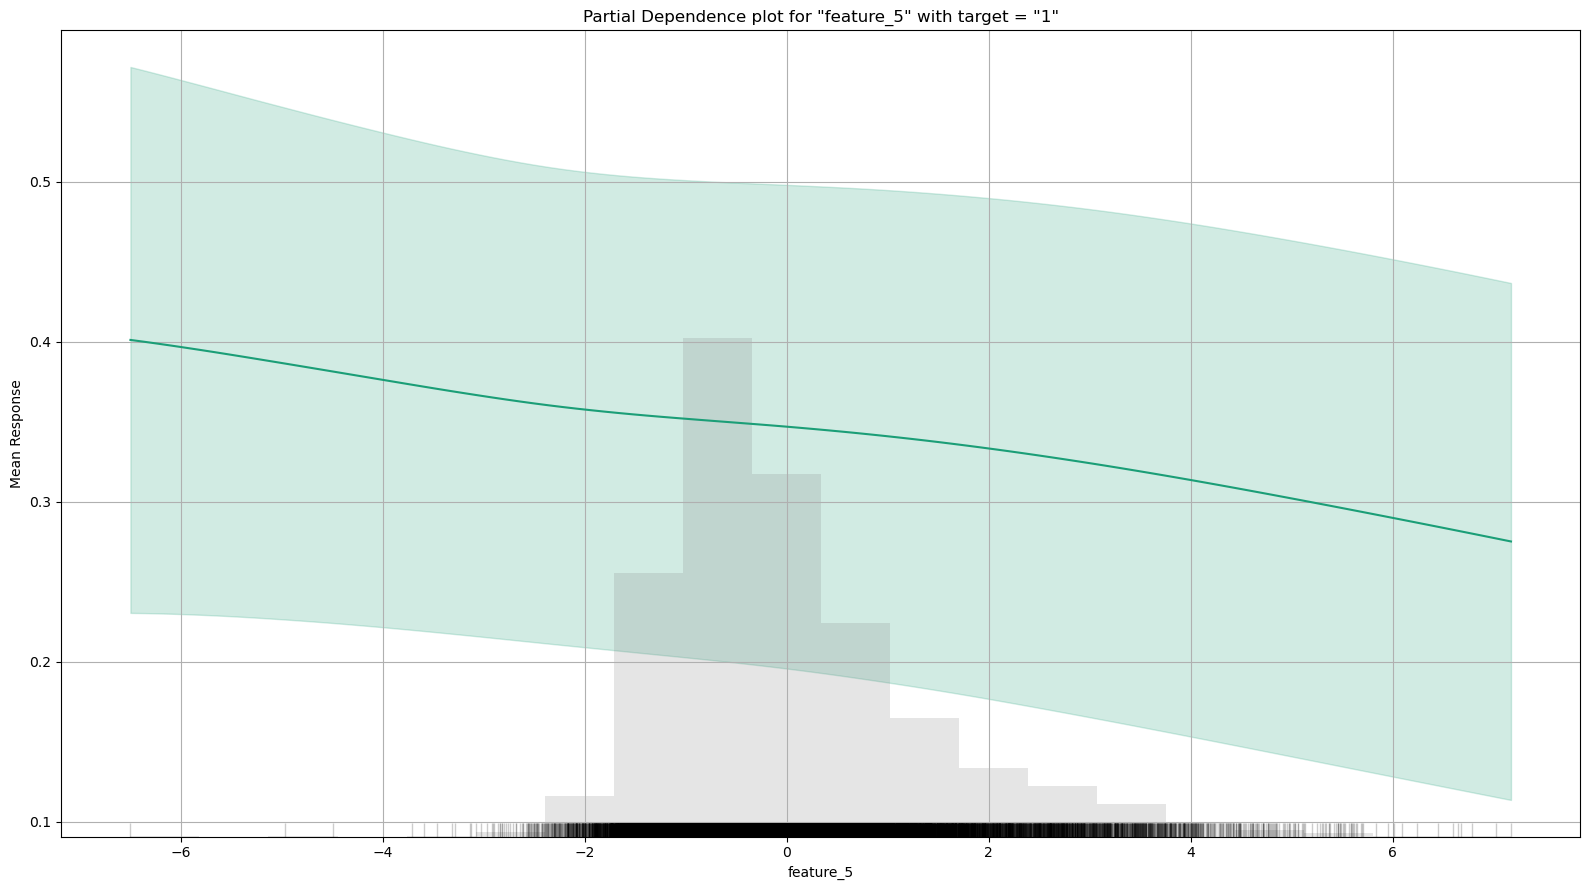

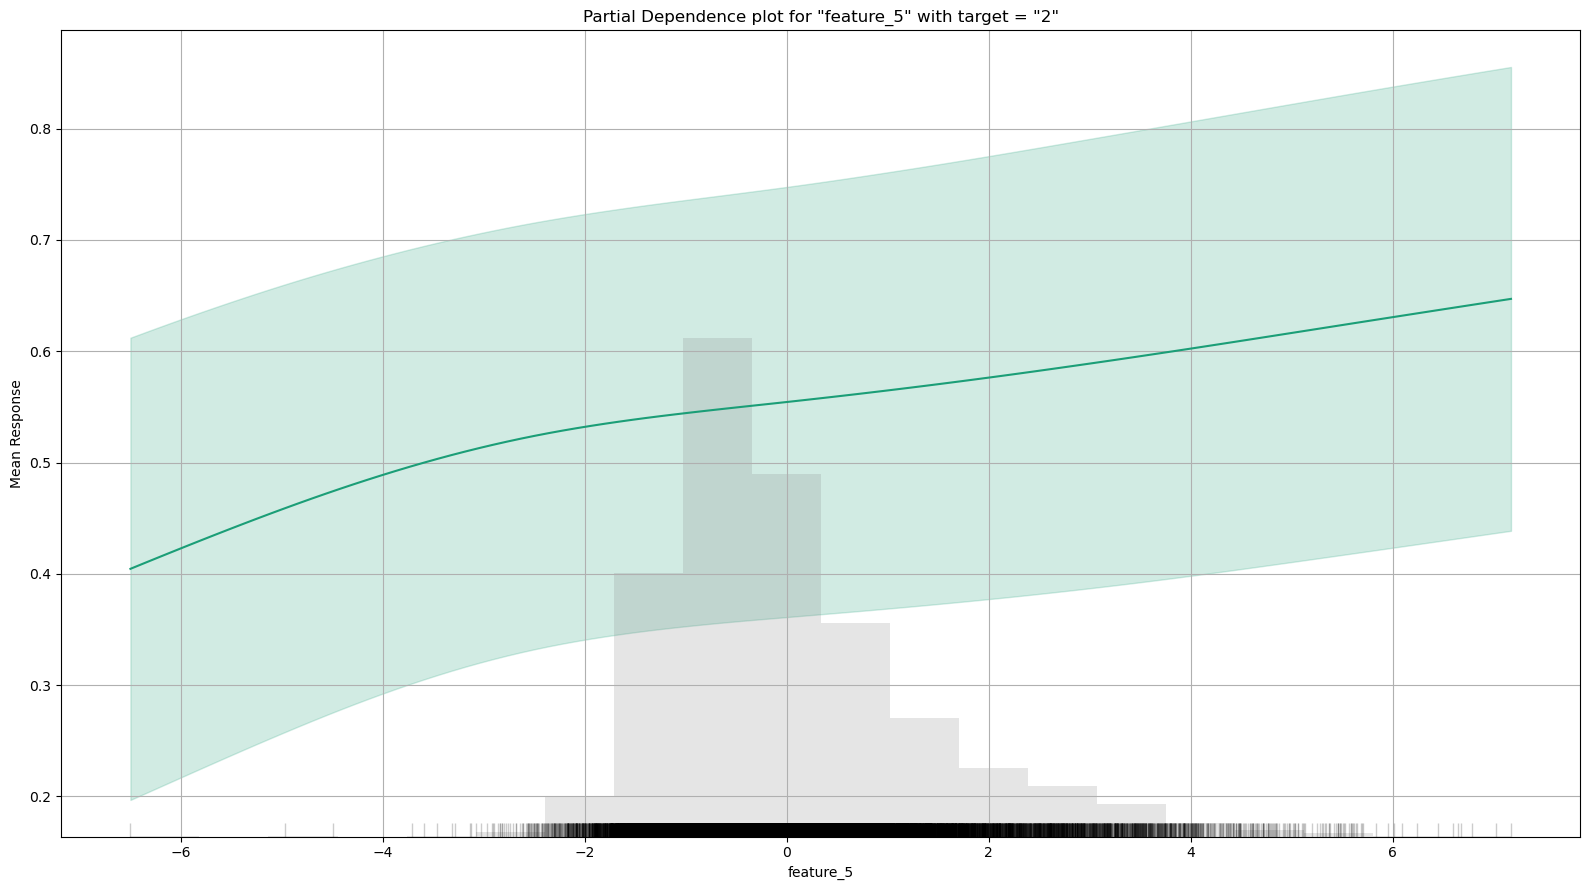

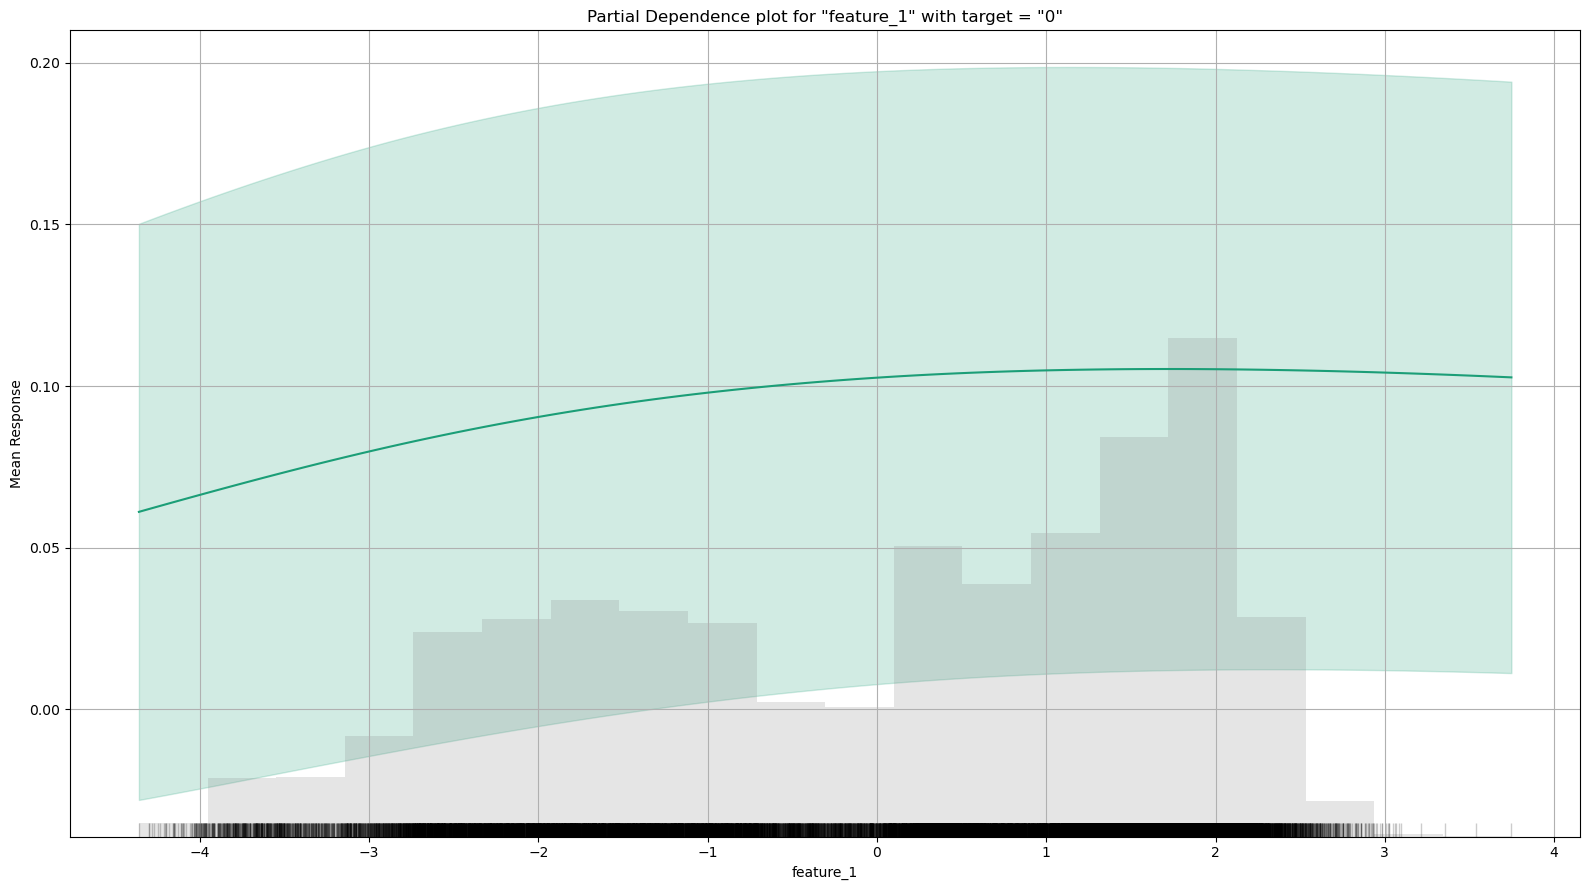

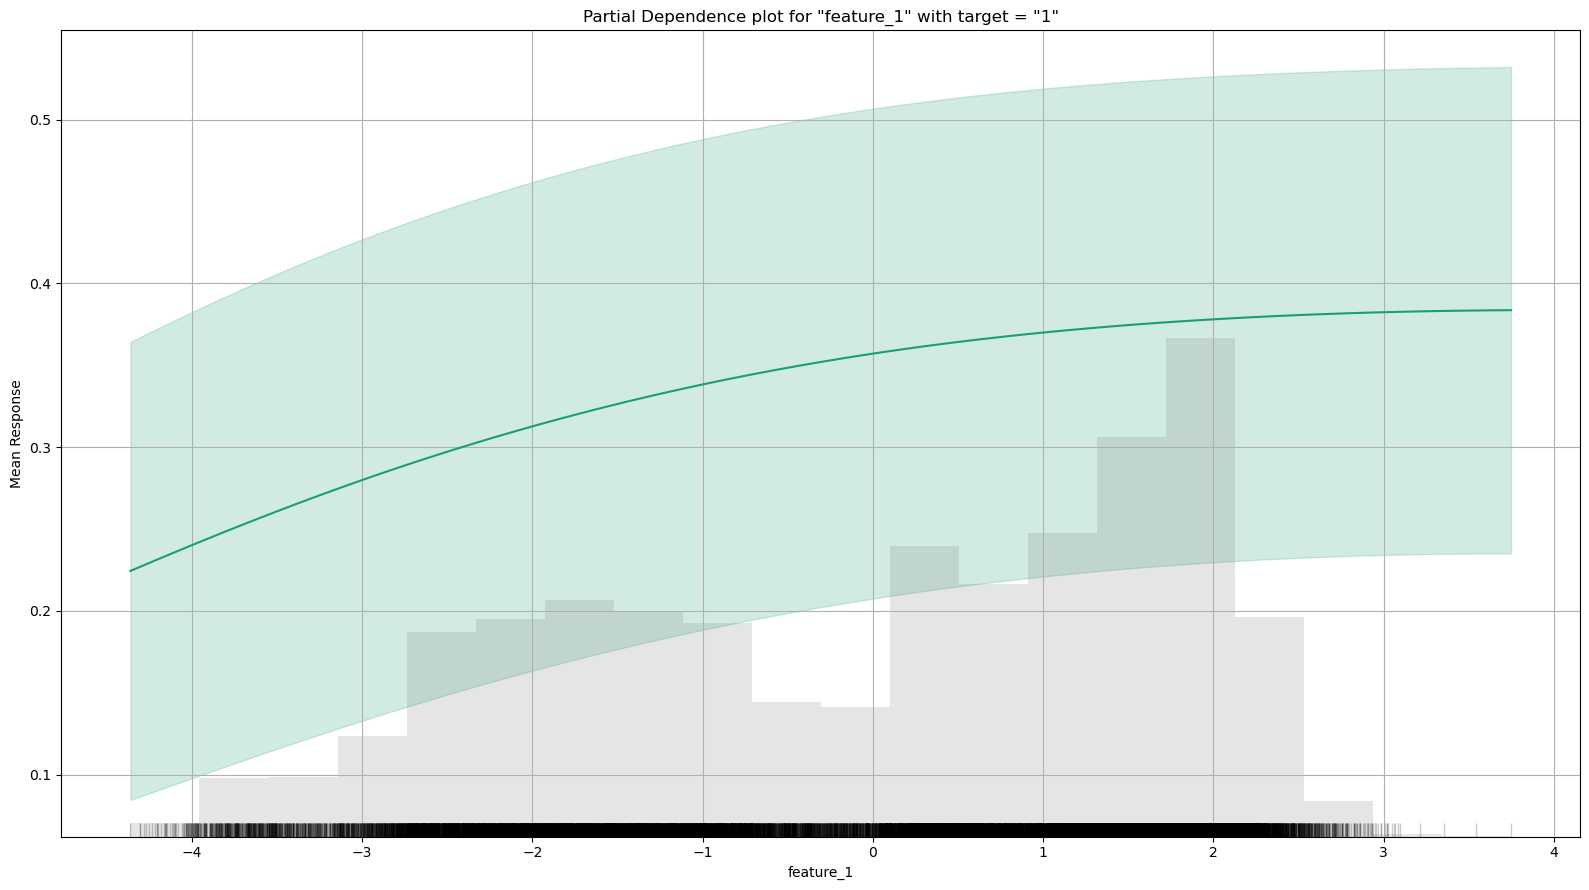

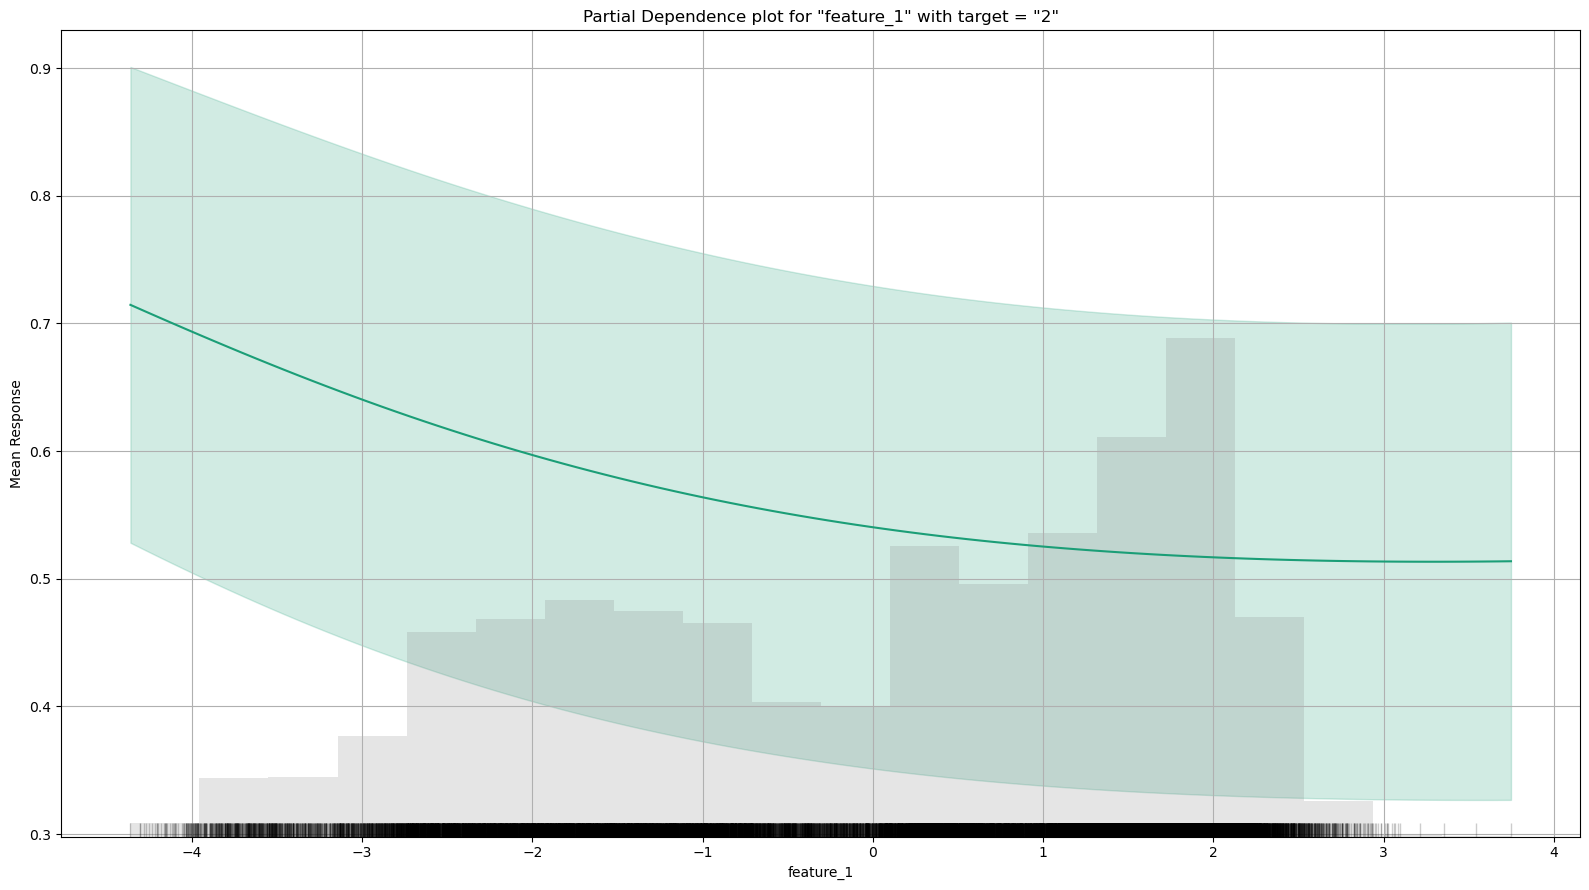

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_grid_1_AutoML_7_20250108_151816_model_1

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1     2      Error     Rate
---  ----  -----  --------  --------------
129  718   1253   0.938571  1,971 / 2,100
81   2146  4141   0.663003  4,222 / 6,368
70   1413  8367   0.150558  1,483 / 9,850
280  4277  13761  0.419041  7,676 / 18,318

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

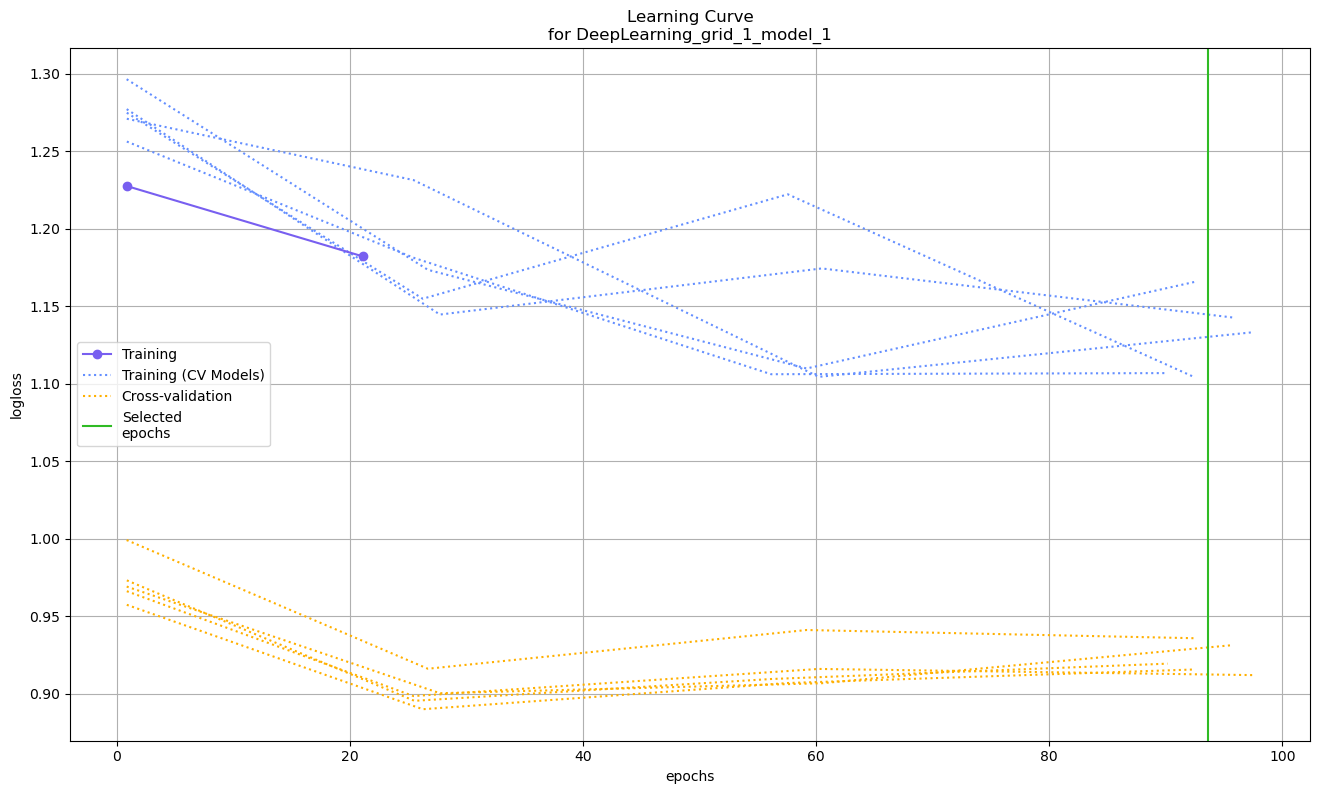

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

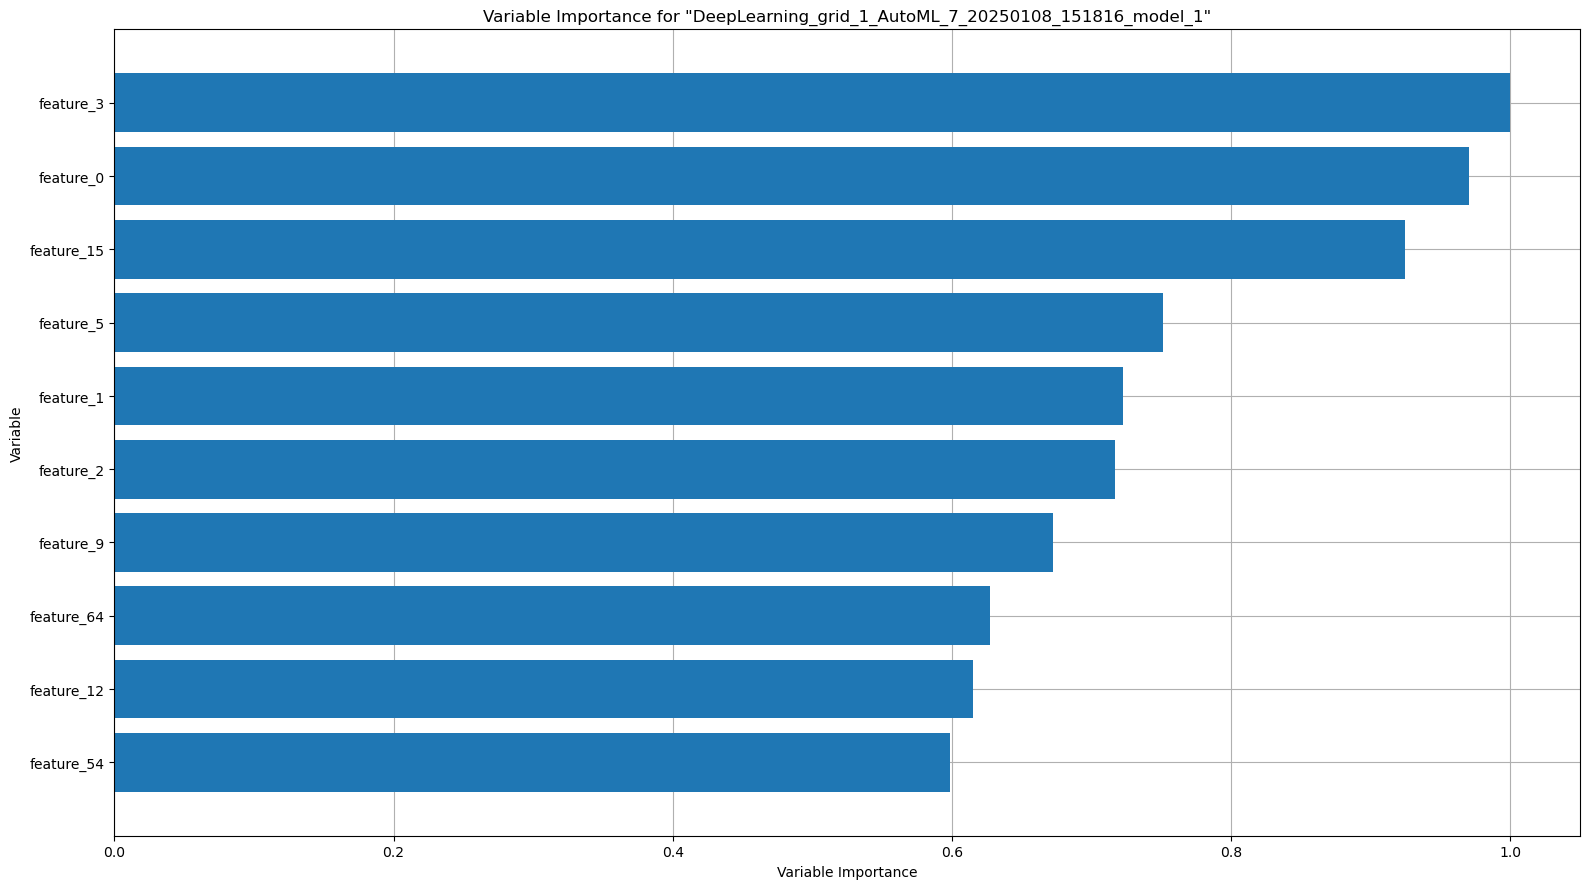

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

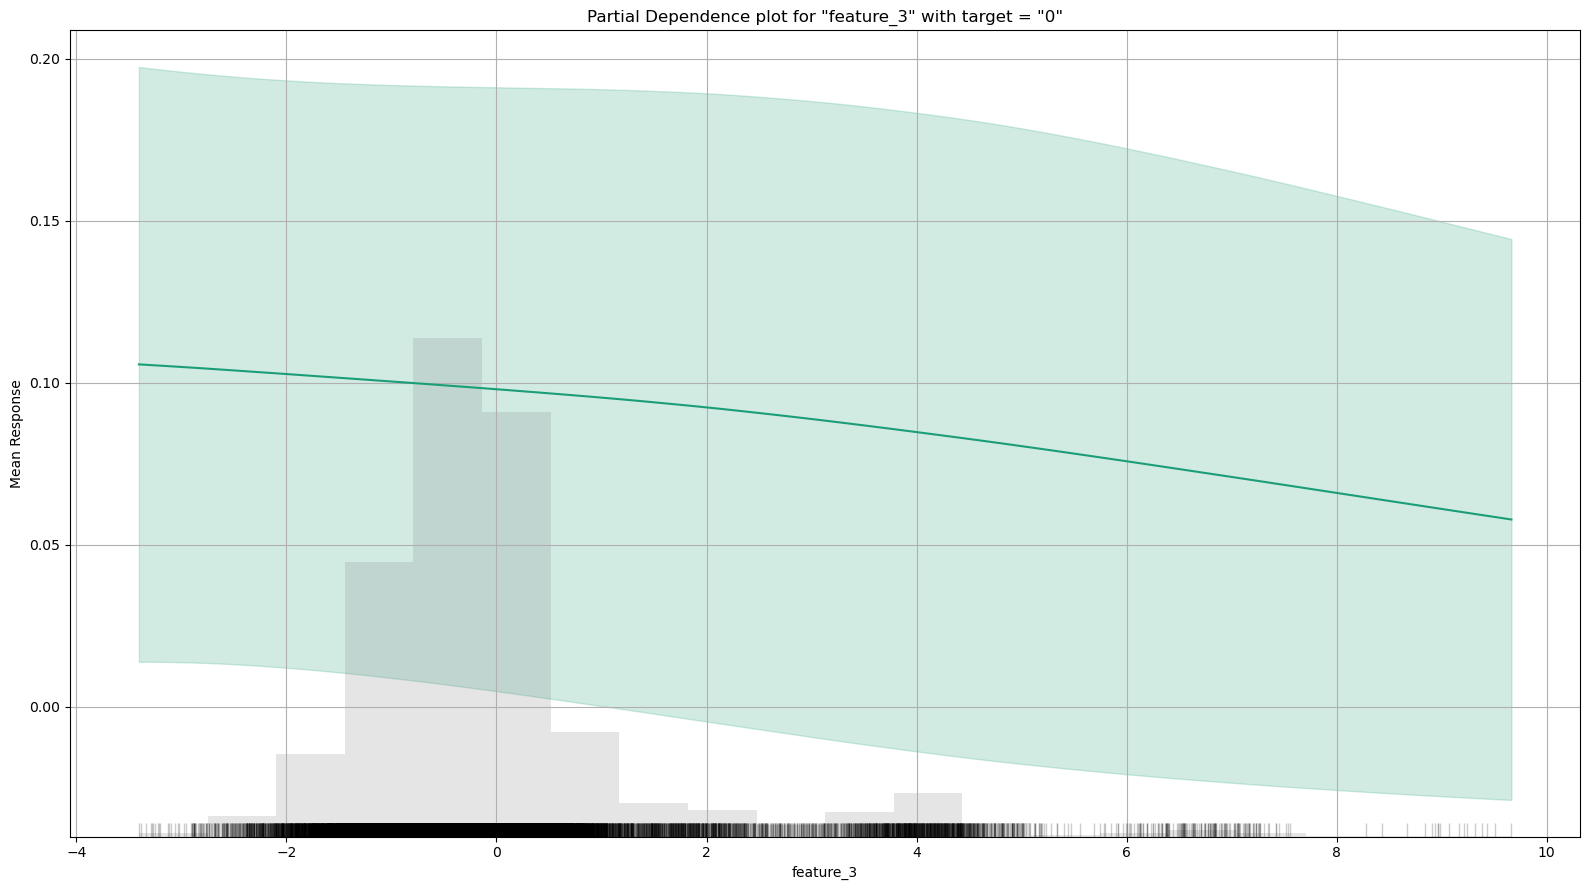

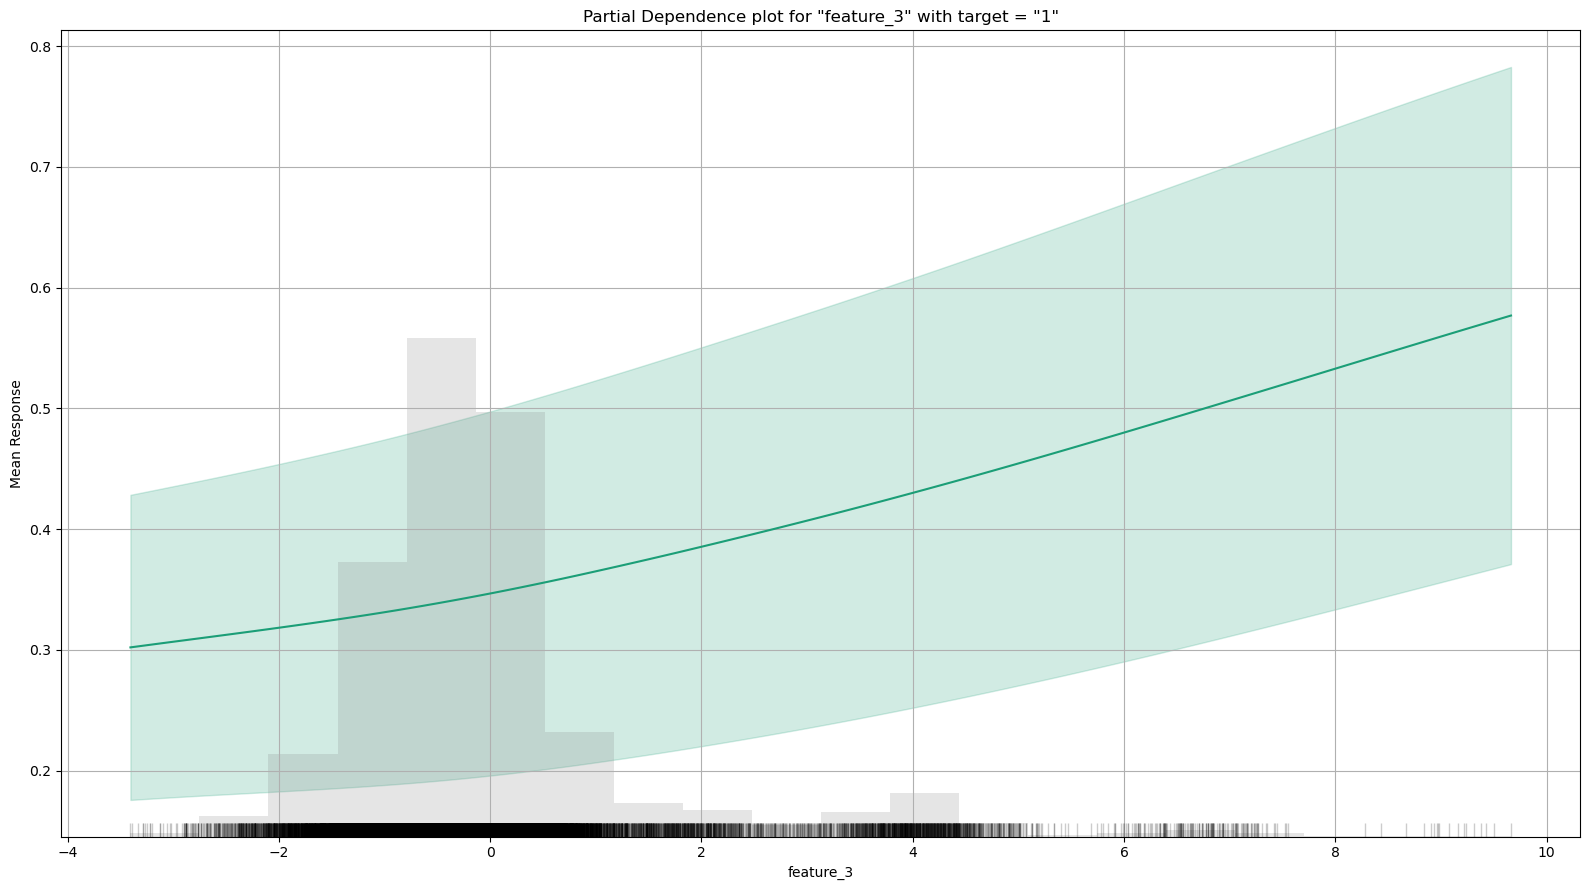

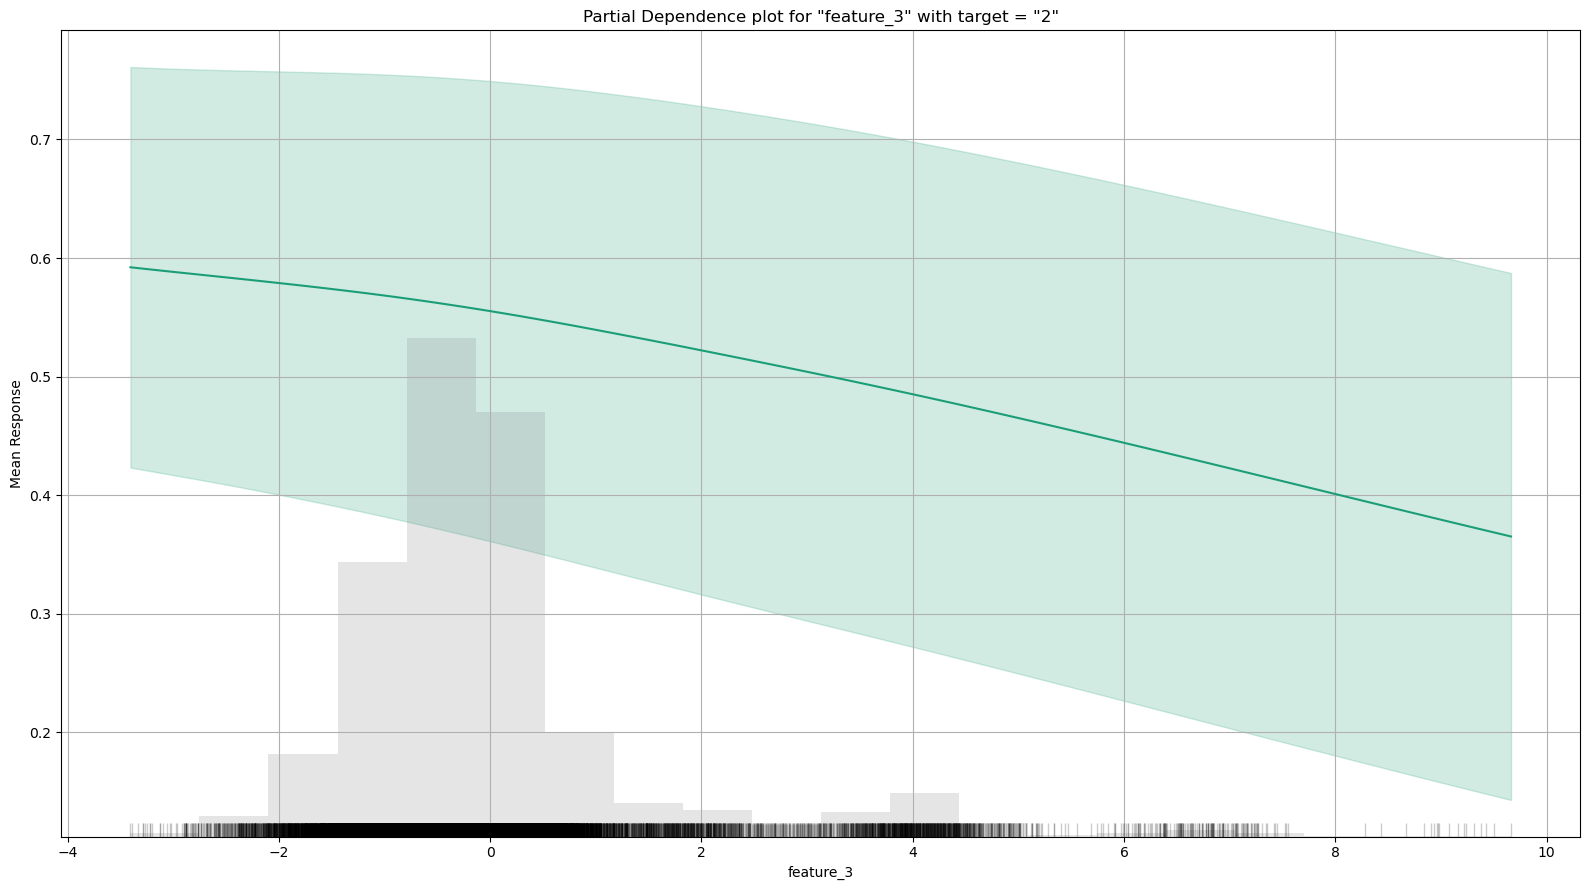

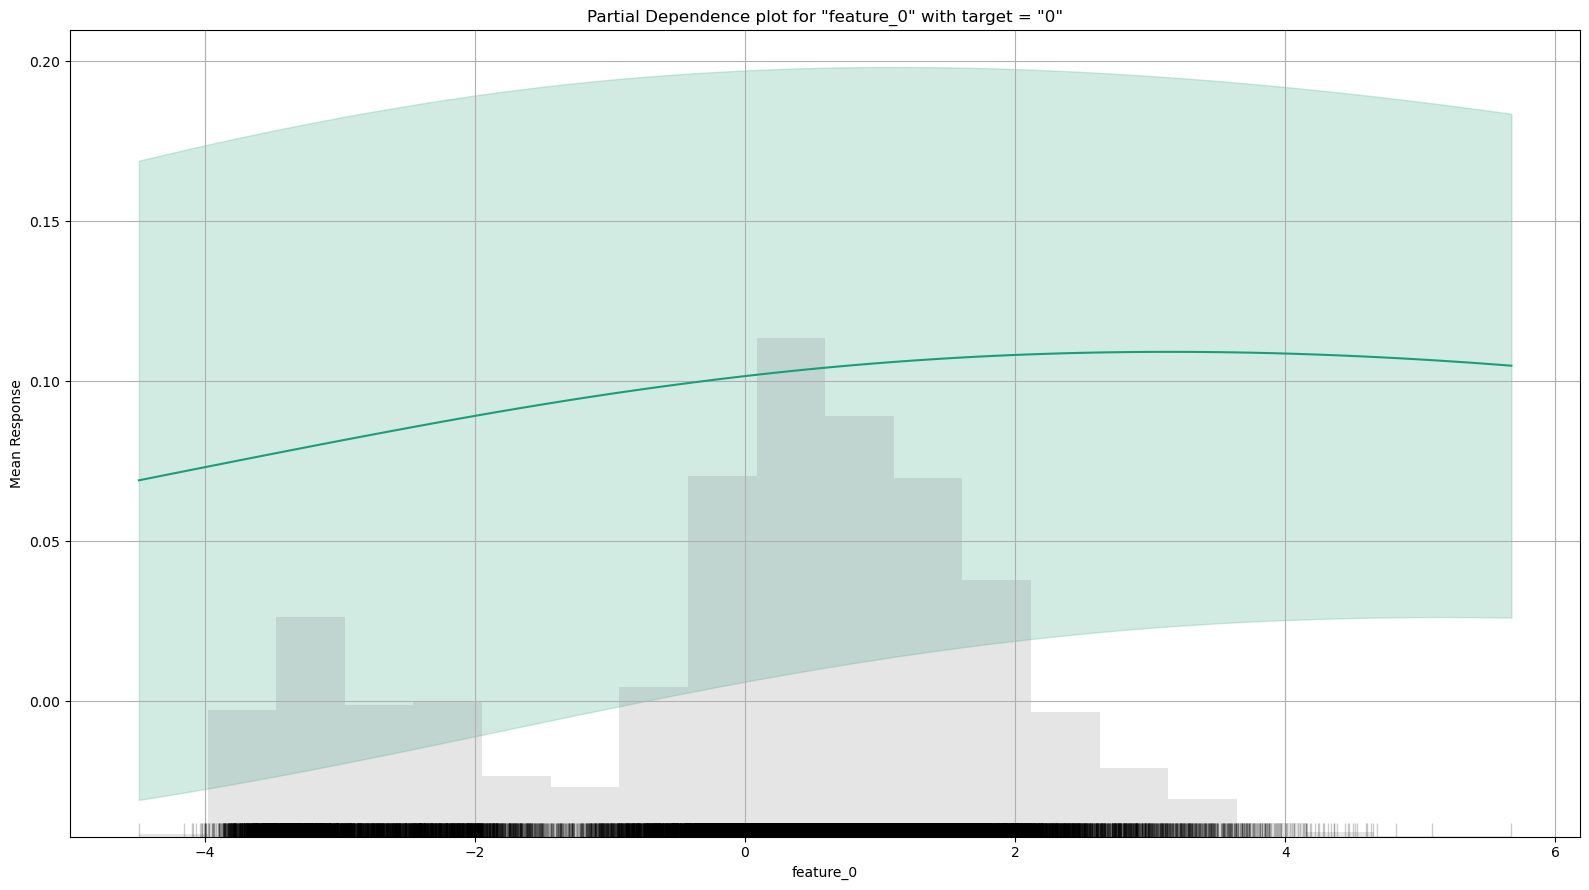

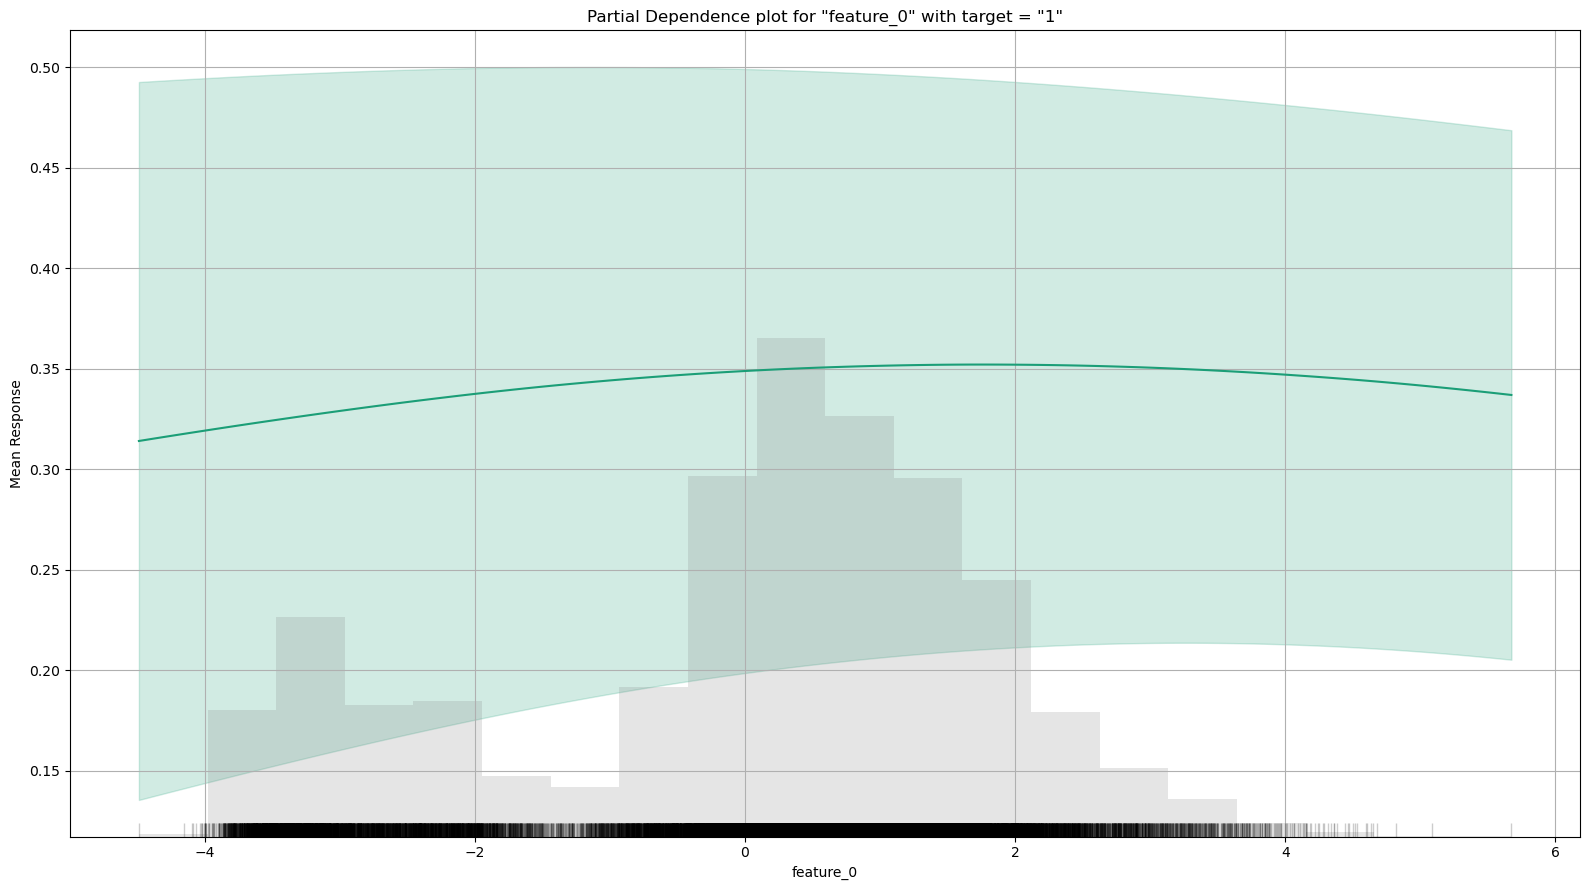

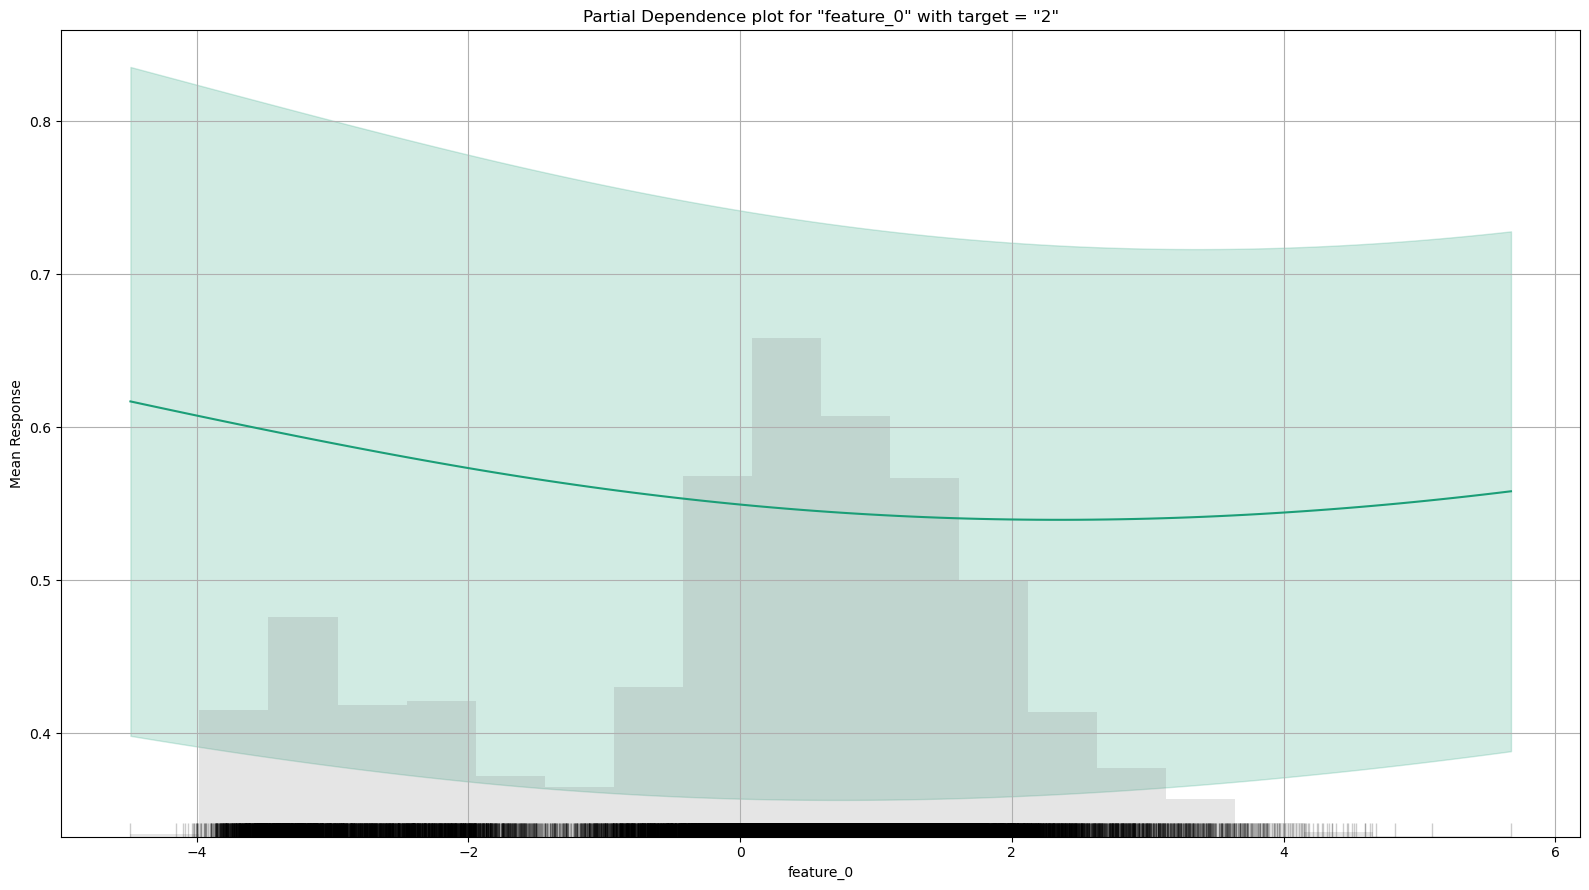

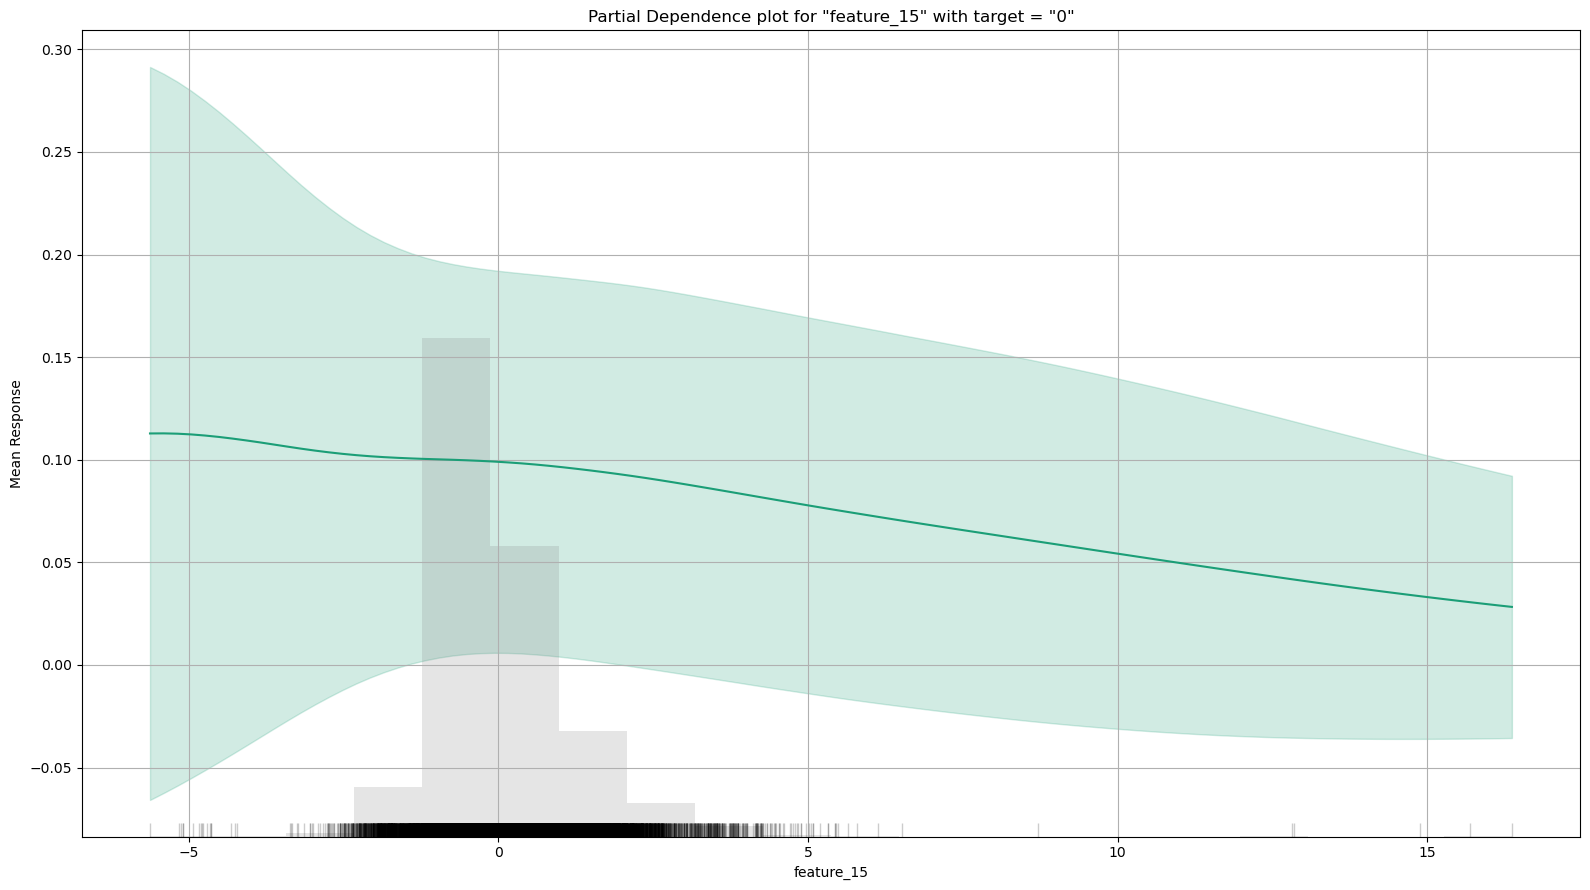

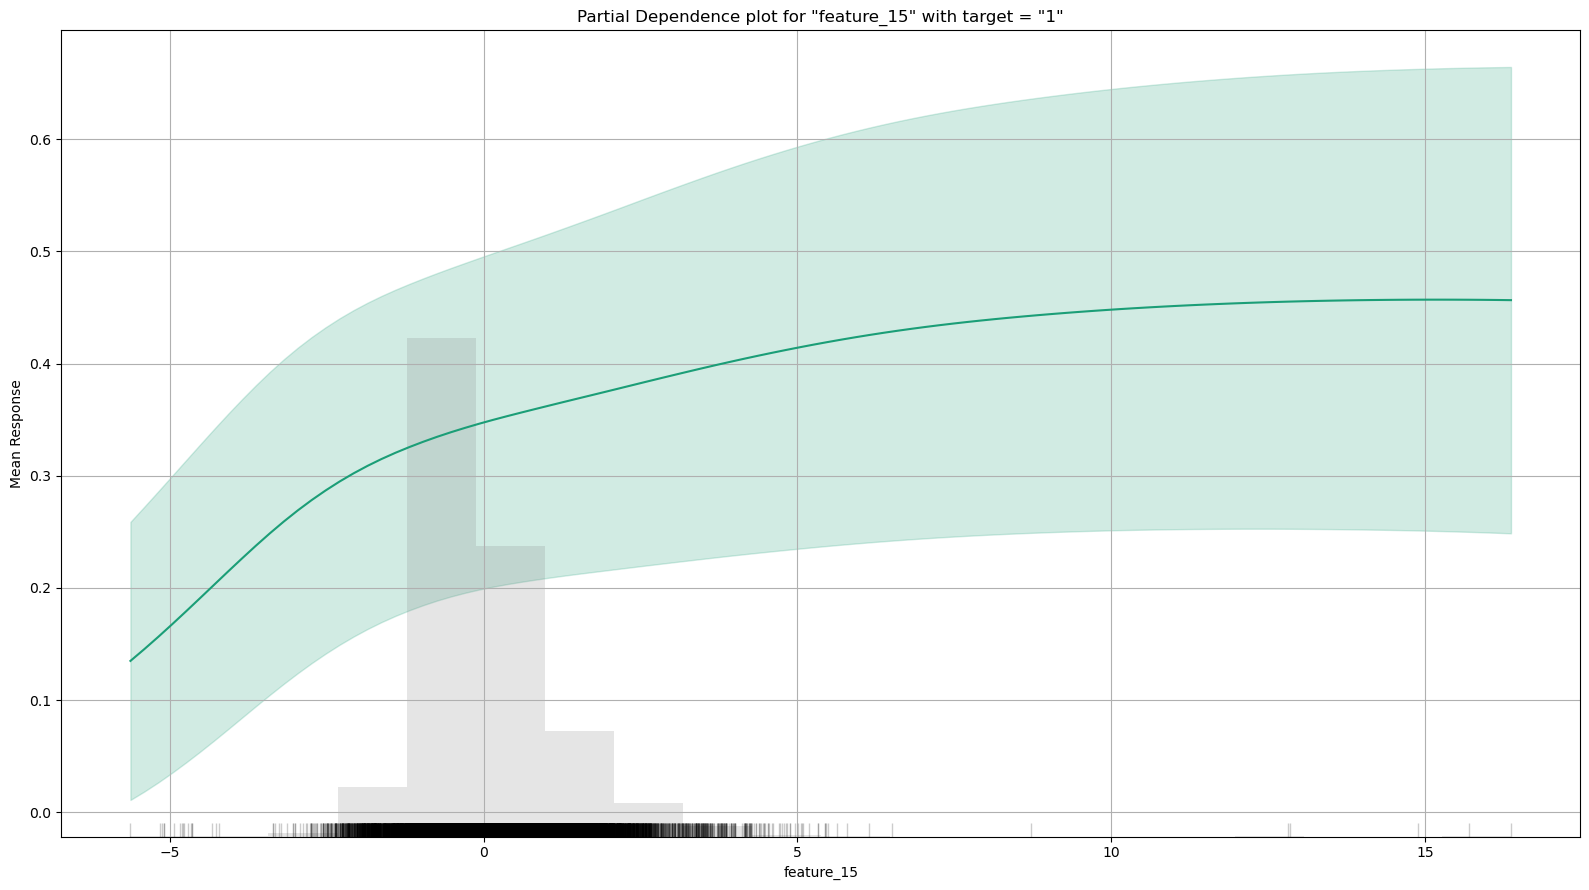

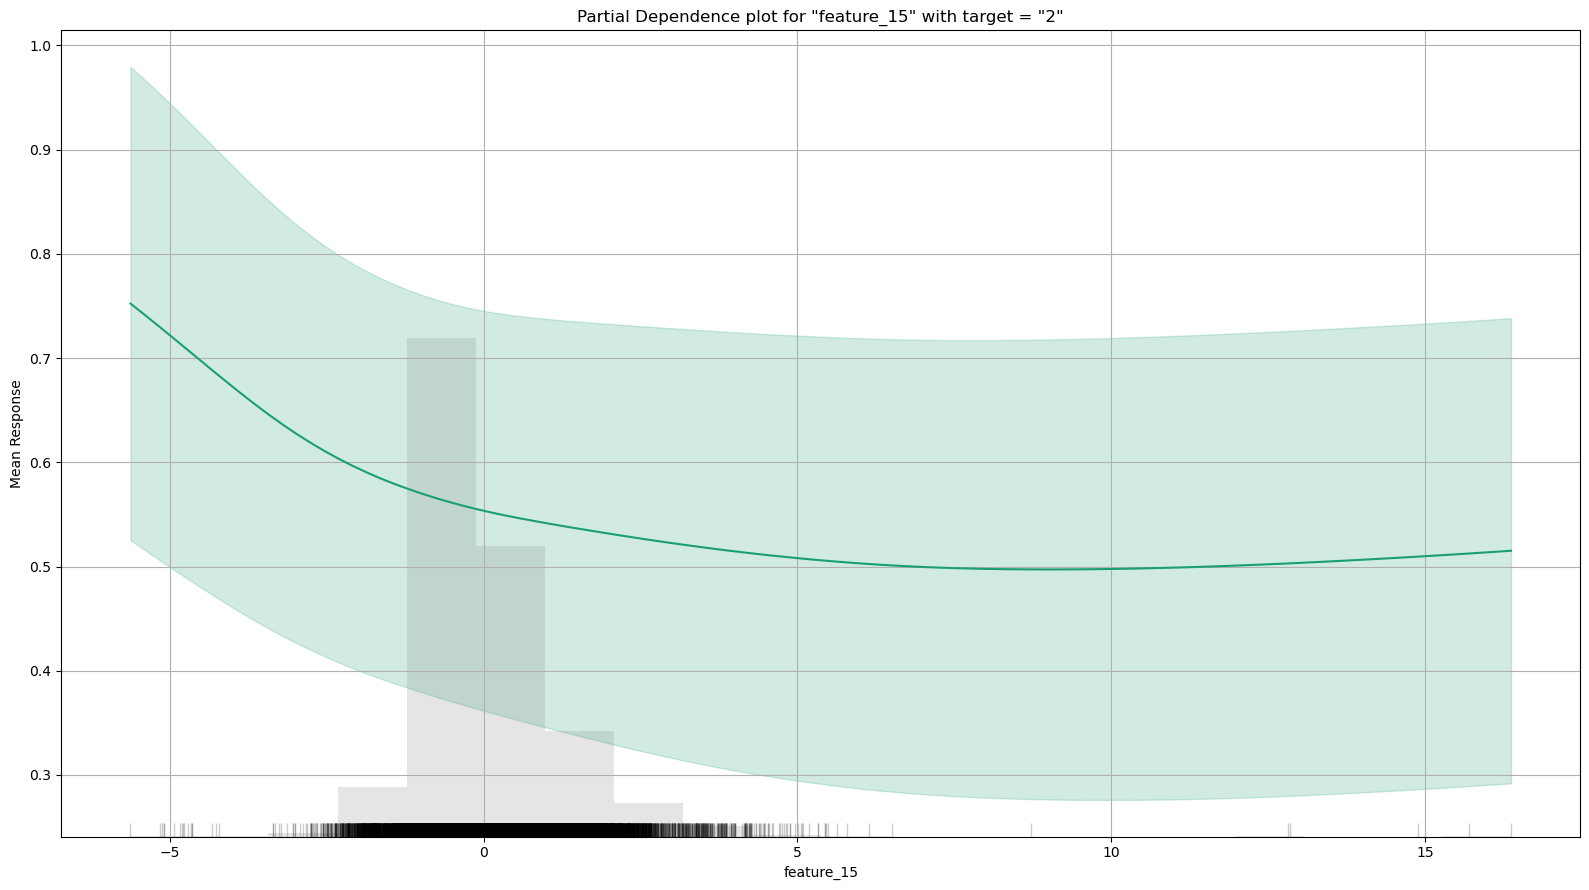

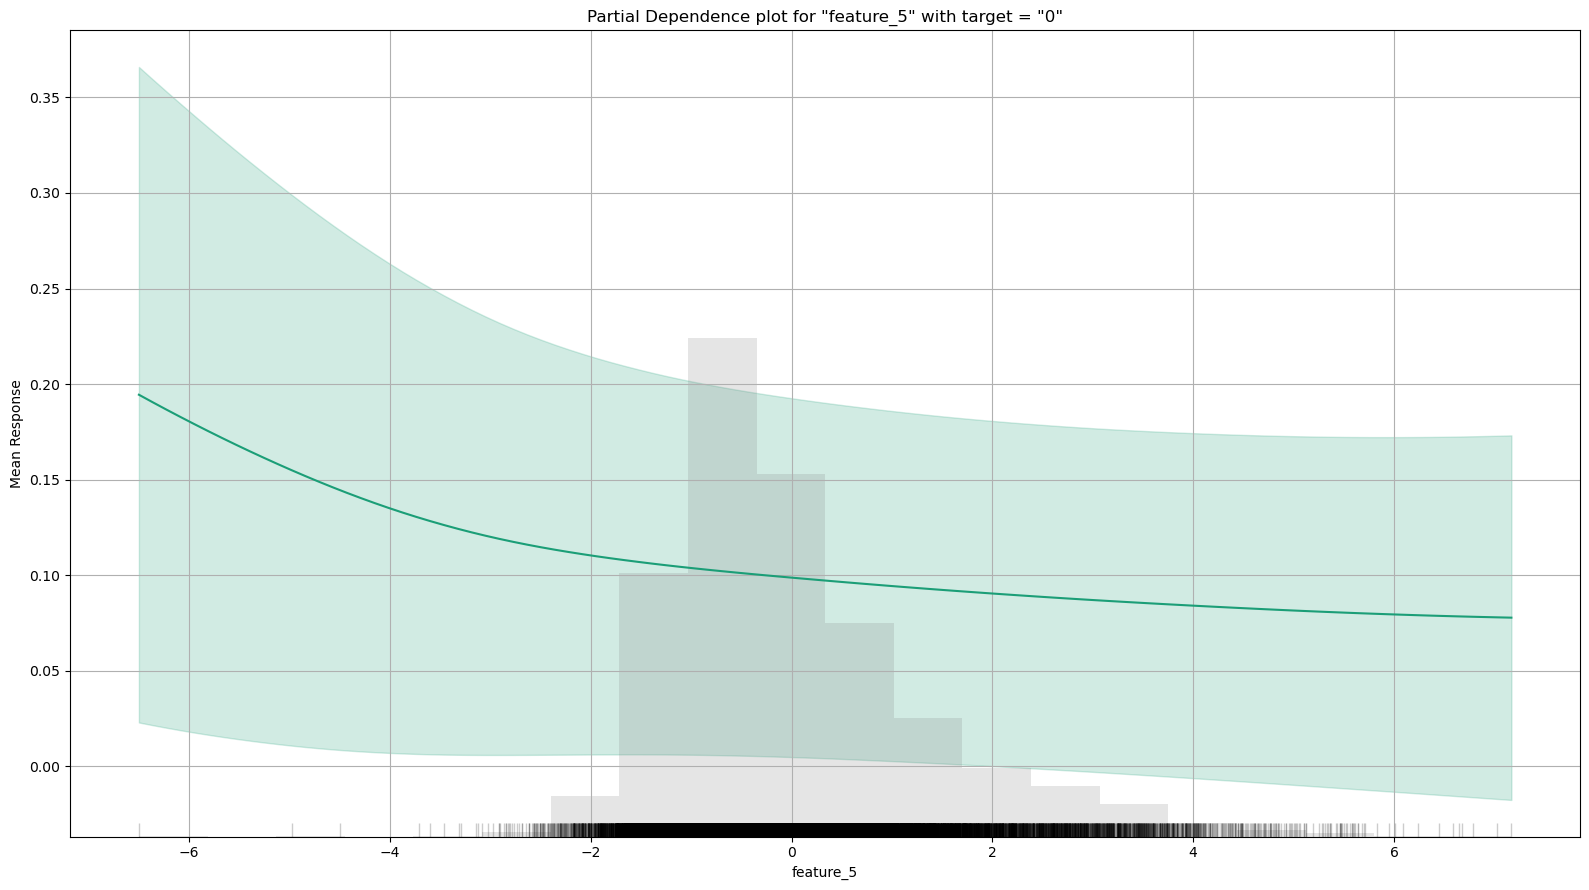

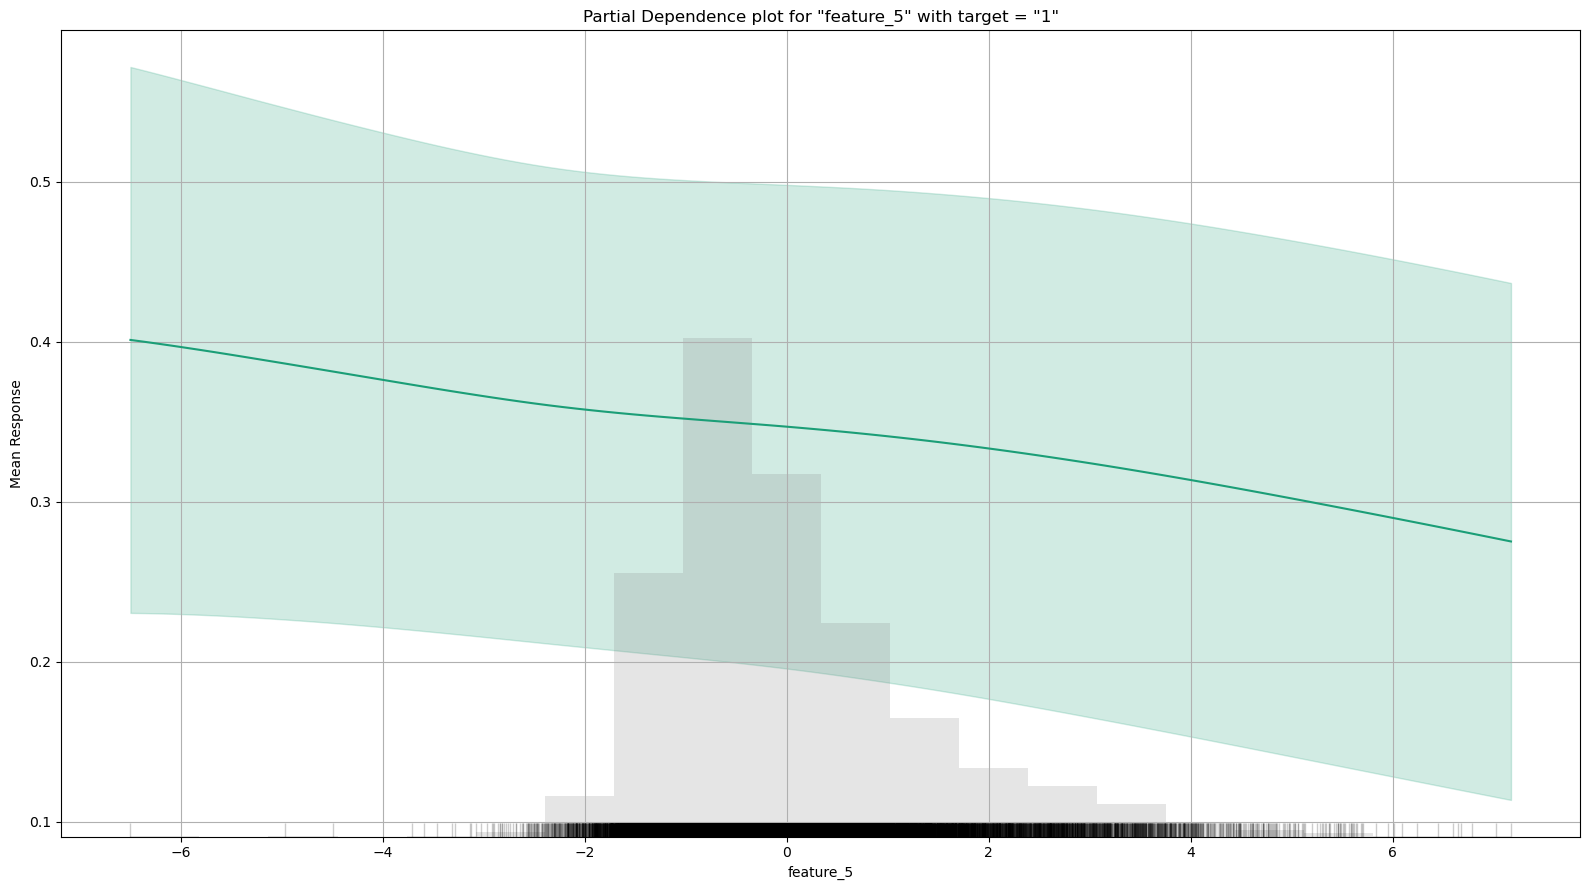

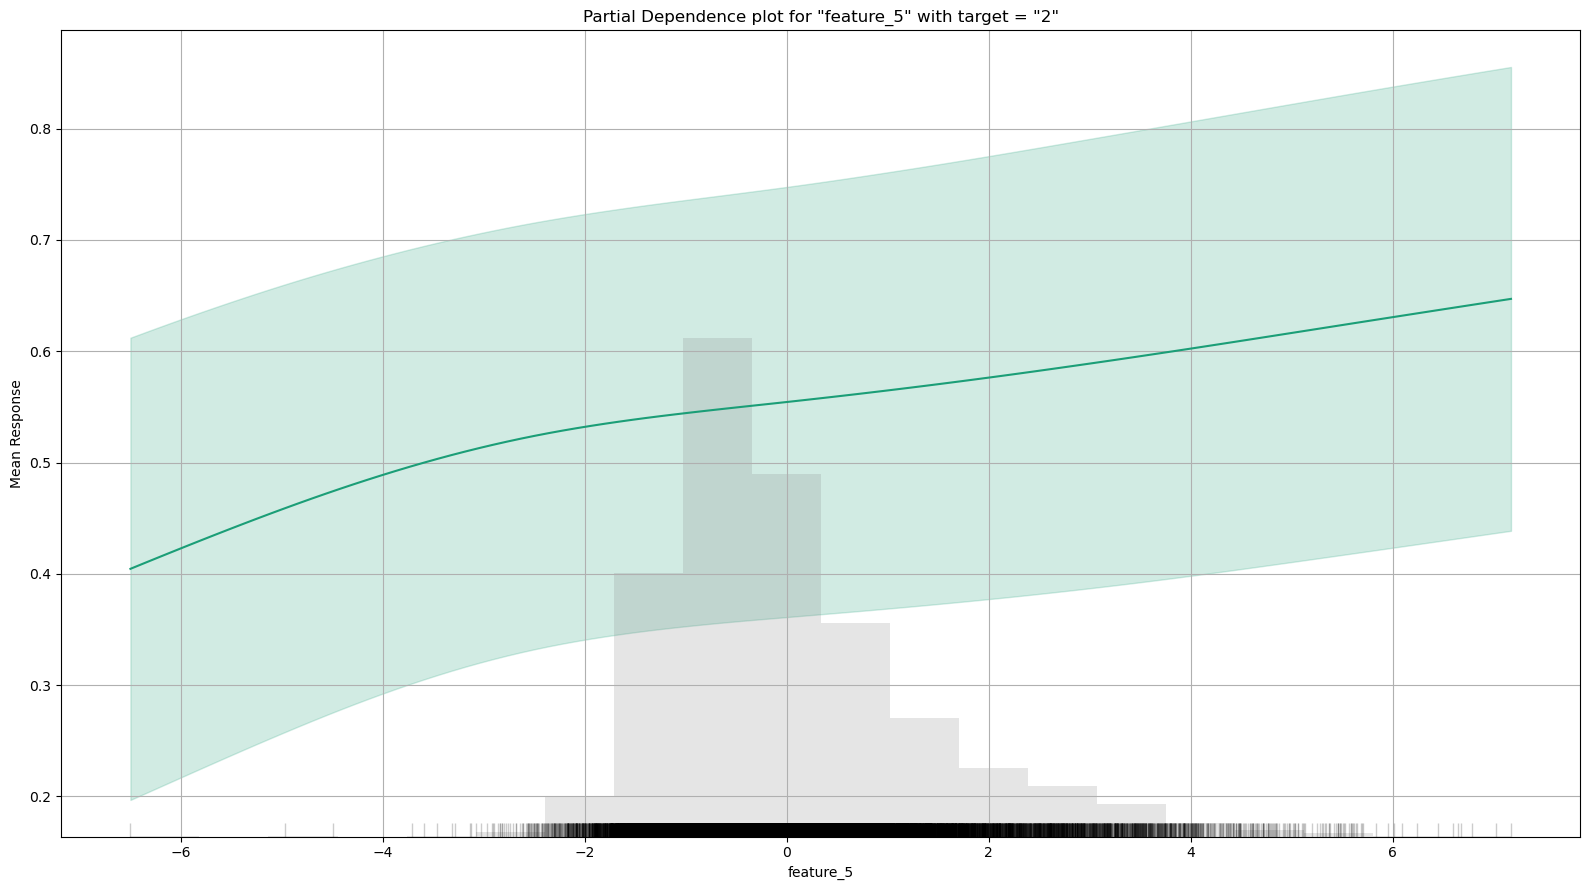

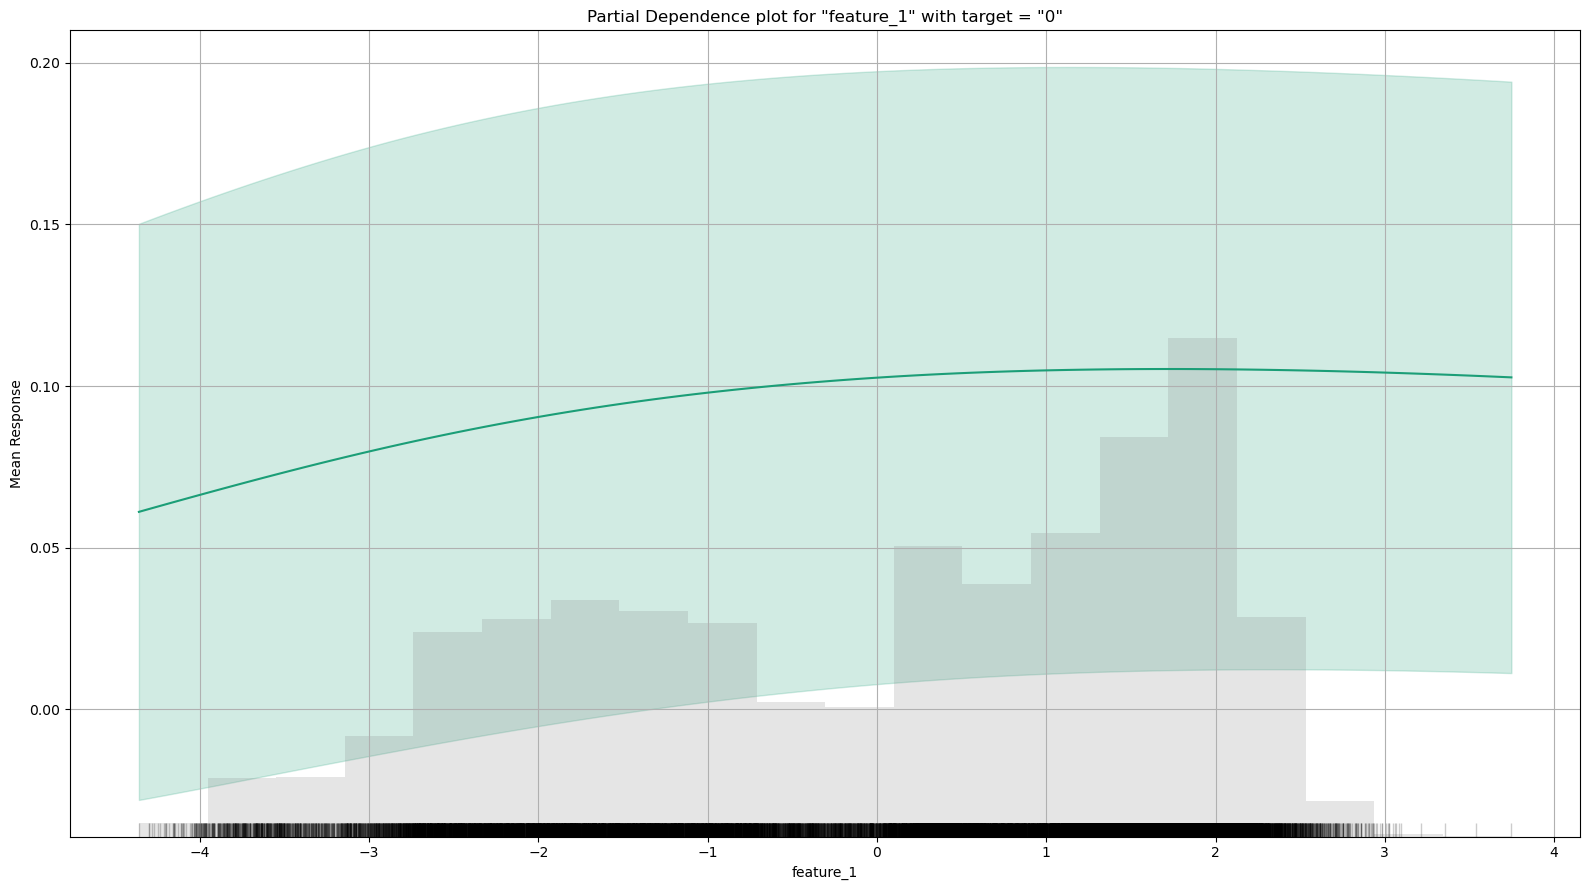

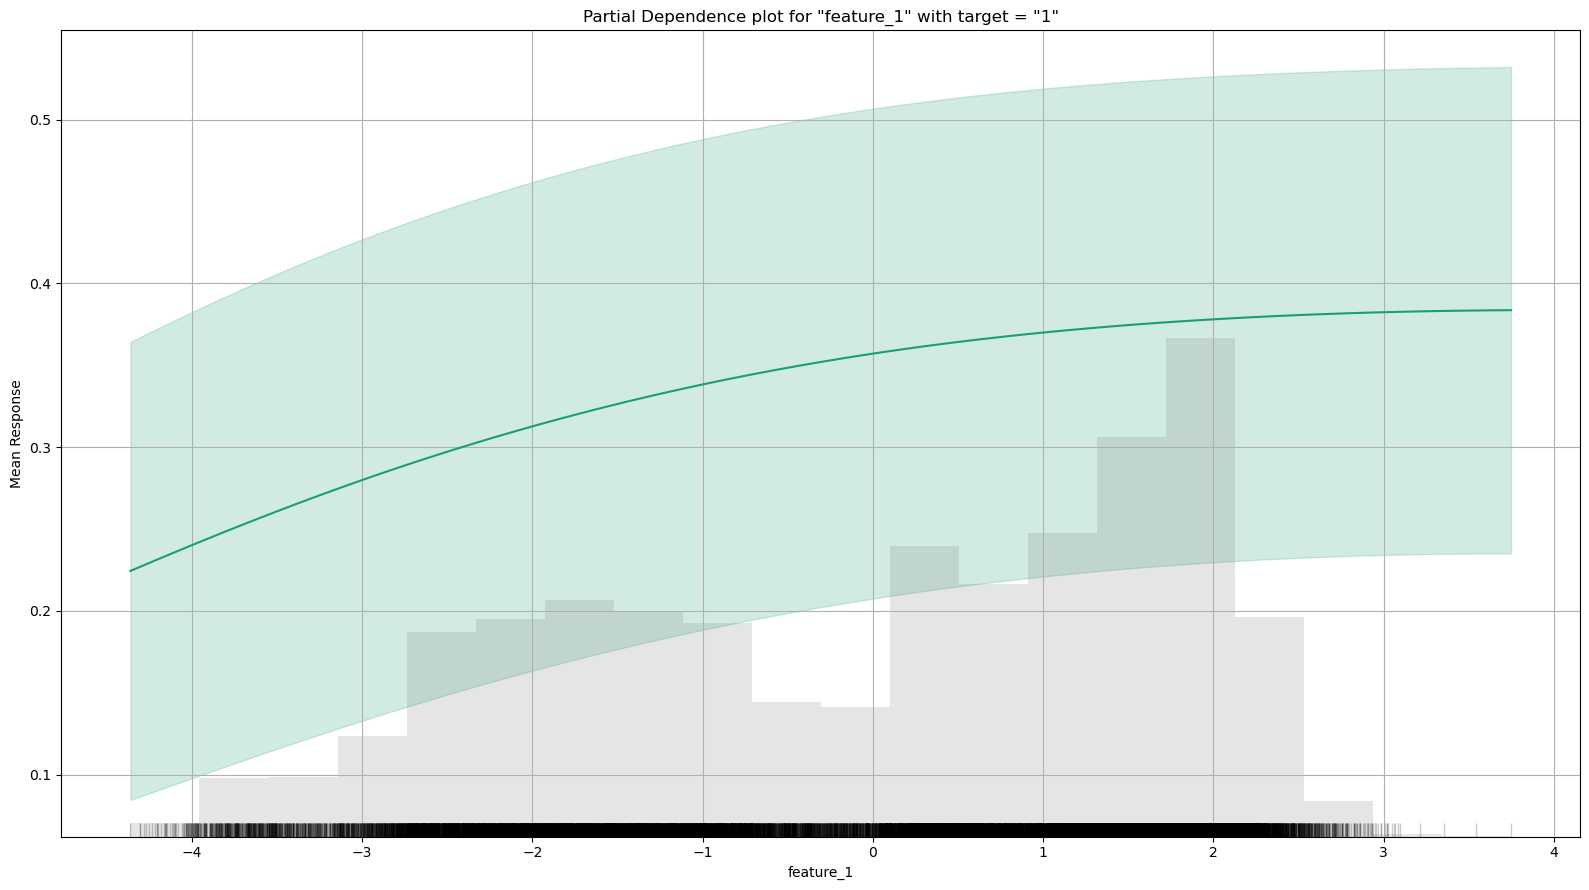

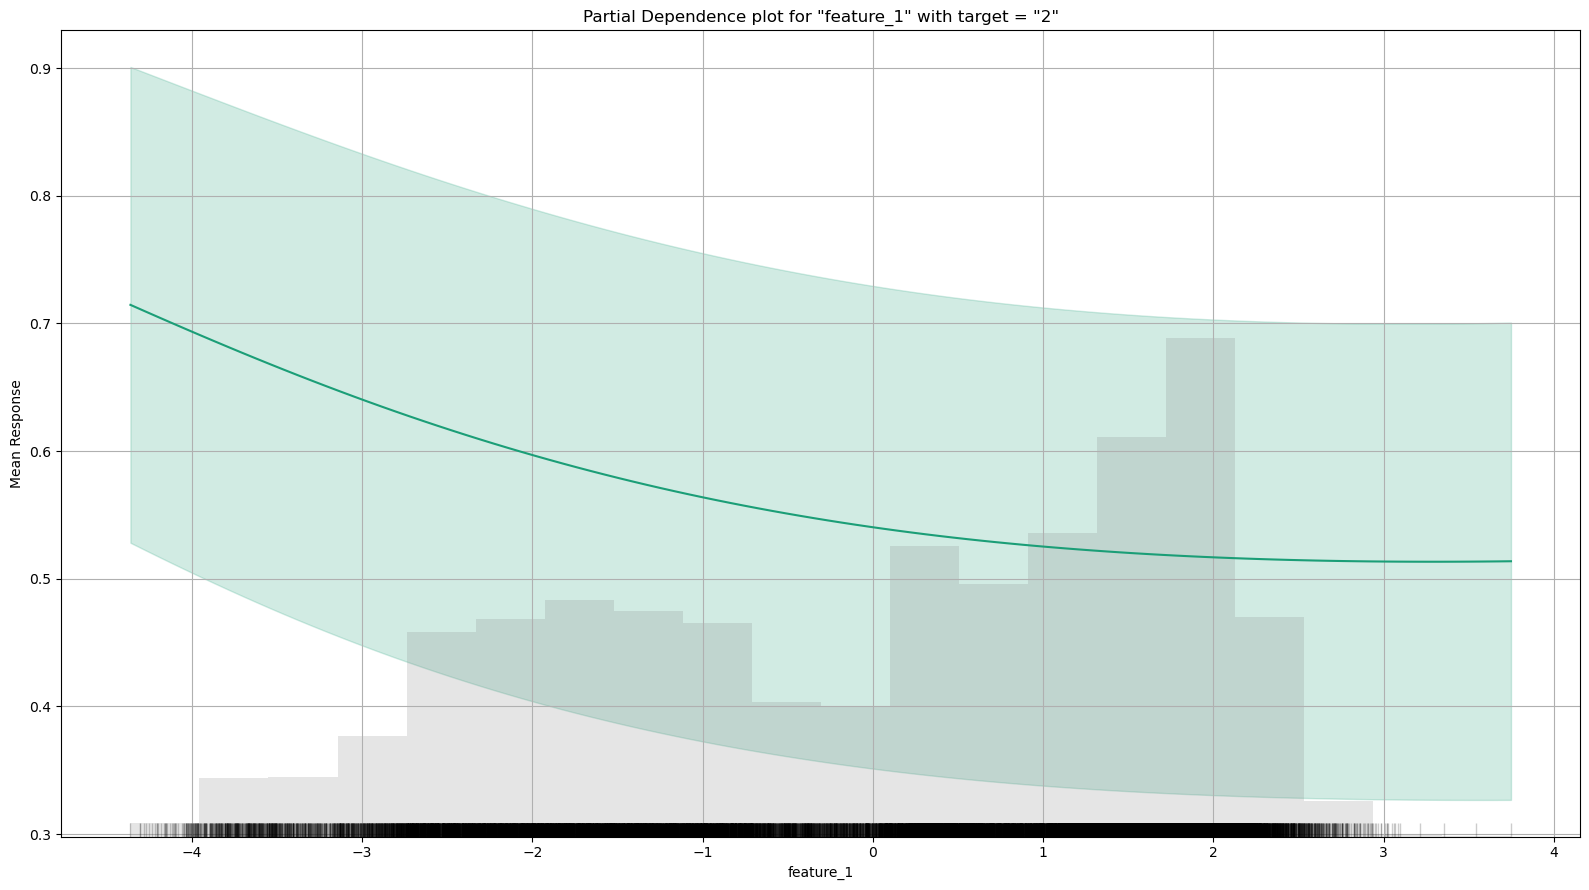

In [42]:
# Assuming 'best_model' is the best model from the AutoML leaderboard
best_model = aml.leader

# Use model.explain() to get the model's architecture and explanations on the training data
best_model.explain(train_h2o)

# Optionally, you can also explain the model on the test data
best_model.explain(test_h2o)